In [ ]:
#                                                                                  ORLEN

In [1]:
#Importowano biblioteki robocze
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Ładuje dane finansowe
data = pd.read_excel("C:/Users/kmate/Desktop/Praca licencjacka/dane/Europa/ORLEN_dataset.xlsx")

#Stworozno zmienne opisujące Rok oraz Kwartał ze zmiennej, którą nie da się manipulować w oryginalnym formacie
data['Rok'] = data['Kwartał'].str[-4:].astype(int)  # Extract last 4 characters as year
data['Q'] = data['Kwartał'].str[1:2].astype(int)  # Extract 2nd character as quarter

import datetime


#Zmieniono zmienną opisującą kwartał na datę
def quarter_end_date(row):
    year = row['Rok']
    quarter = row['Q']
    month = 3 * quarter
    
    if month == 12:
        quarter_end = datetime.date(year, month, 31)
    else:
        next_month = month + 1
        next_month_start = datetime.date(year, next_month, 1)
        quarter_end = next_month_start - datetime.timedelta(days=1)
    
    return quarter_end
    
data["Date"] = data[["Rok", "Q"]].apply(quarter_end_date, axis=1) 
data = data.set_index('Date')
data = data.fillna(0)

#Następnie sprawdzono informacje o typie danych
#Jeżeli typ danych okaże sie sprzeczny co do tego jaki jest pożądany należy zastosować transformacje
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 2013-03-31 to 2023-12-31
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Indeks                             44 non-null     int64  
 1   Kwartał                            44 non-null     object 
 2   Przychody ogółem                   44 non-null     float64
 3   Zysk brutto ze sprzedaży           44 non-null     float64
 4   Zysk z działalności operacyjnej    44 non-null     float64
 5   EBITDA                             44 non-null     float64
 6   Przychody finansowe                44 non-null     float64
 7   Wydatki finansowe                  44 non-null     float64
 8   Zysk brutto                        44 non-null     float64
 9   Aktywa trwałe                      44 non-null     float64
 10  Aktywa obrotowe                    44 non-null     float64
 11  Kapitał własny ogółem              44 non-null  

In [2]:
#Statystyki opisowe
describe = data.corr(numeric_only=True)
describe

Indeks  Przychody ogółem  \
Indeks                             1.000000          0.798863   
Przychody ogółem                   0.798863          1.000000   
Zysk brutto ze sprzedaży           0.793768          0.892864   
Zysk z działalności operacyjnej    0.625289          0.868630   
EBITDA                             0.689205          0.916512   
Przychody finansowe                0.646813          0.802361   
Wydatki finansowe                 -0.641803         -0.667556   
Zysk brutto                        0.657276          0.890725   
Aktywa trwałe                      0.842885          0.944293   
Aktywa obrotowe                    0.792614          0.957076   
Kapitał własny ogółem              0.817370          0.955617   
Kapitał własny spółki dominującej  0.820125          0.955121   
Zobowiązania długoterminowe        0.883954          0.928121   
Długoterminowe kredyty i pożyczki  0.887611          0.836913   
Zobowiązania krótkoterminowe       0.808297          0.952284   
Pożyczki krótkoterminowe           0.702928          0.834572   
Rok                                0.996116          0.801644   
Q                                  0.088045          0.003779   

                                   Zysk brutto ze sprzedaży  \
Indeks                                             0.793768   
Przychody ogółem                                   0.892864   
Zysk brutto ze sprzedaży                           1.000000   
Zysk z działalności operacyjnej                    0.815250   
EBITDA                                             0.846645   
Przychody finansowe                                0.631325   
Wydatki finansowe                                 -0.618118   
Zysk brutto                                        0.830204   
Aktywa trwałe                                      0.843046   
Aktywa obrotowe                                    0.883139   
Kapitał własny ogółem                              0.852238   
Kapitał własny spółki dominującej                  0.853265   
Zobowiązania długoterminowe                        0.840798   
Długoterminowe kredyty i pożyczki                  0.790182   
Zobowiązania krótkoterminowe                       0.901315   
Pożyczki krótkoterminowe                           0.769682   
Rok                                                0.799392   
Q                                                 -0.028617   

                                   Zysk z działalności operacyjnej    EBITDA  \
Indeks                                                    0.625289  0.689205   
Przychody ogółem                                          0.868630  0.916512   
Zysk brutto ze sprzedaży                                  0.815250  0.846645   
Zysk z działalności operacyjnej                           1.000000  0.991176   
EBITDA                                                    0.991176  1.000000   
Przychody finansowe                                       0.664008  0.709964   
Wydatki finansowe                                        -0.556433 -0.591540   
Zysk brutto                                               0.987450  0.986590   
Aktywa trwałe                                             0.743462  0.816776   
Aktywa obrotowe                                           0.815847  0.862029   
Kapitał własny ogółem                                     0.764741  0.832159   
Kapitał własny spółki dominującej                         0.765188  0.832522   
Zobowiązania długoterminowe                               0.713354  0.786181   
Długoterminowe kredyty i pożyczki                         0.593503  0.665874   
Zobowiązania krótkoterminowe                              0.811359  0.858259   
Pożyczki krótkoterminowe                                  0.802972  0.834470   
Rok                                                       0.613819  0.679846   
Q                                                         0.157345  0.136284   

                                   Przychody finansowe  Wydatki finansowe  \
Indek

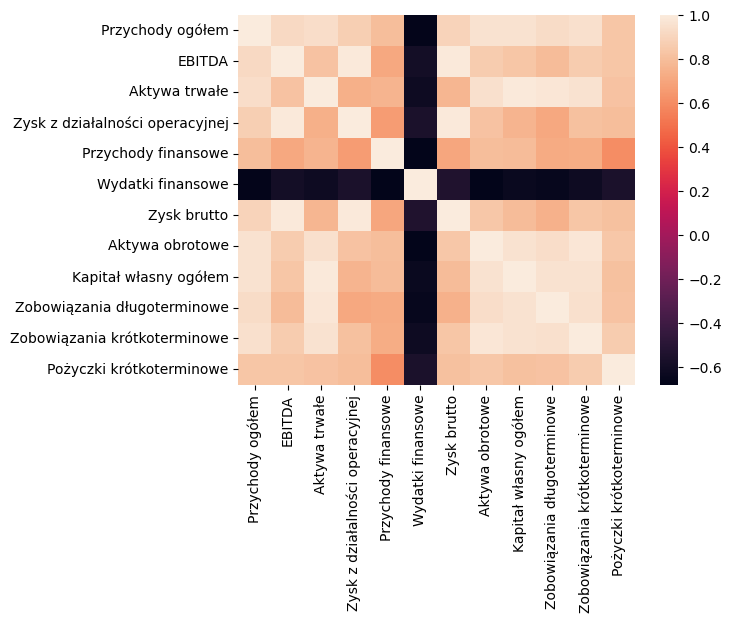

In [3]:
import pandas as pd
corr = data[["Przychody ogółem", "EBITDA", "Aktywa trwałe", "Zysk z działalności operacyjnej", "Przychody finansowe", "Wydatki finansowe",
                  "Zysk brutto", "Aktywa obrotowe", "Kapitał własny ogółem", "Zobowiązania długoterminowe", "Zobowiązania krótkoterminowe", "Pożyczki krótkoterminowe"]]

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


matrix = corr.corr().round(2)
s = sns.heatmap(matrix)
plt.show()



<Figure size 700x1200 with 0 Axes>

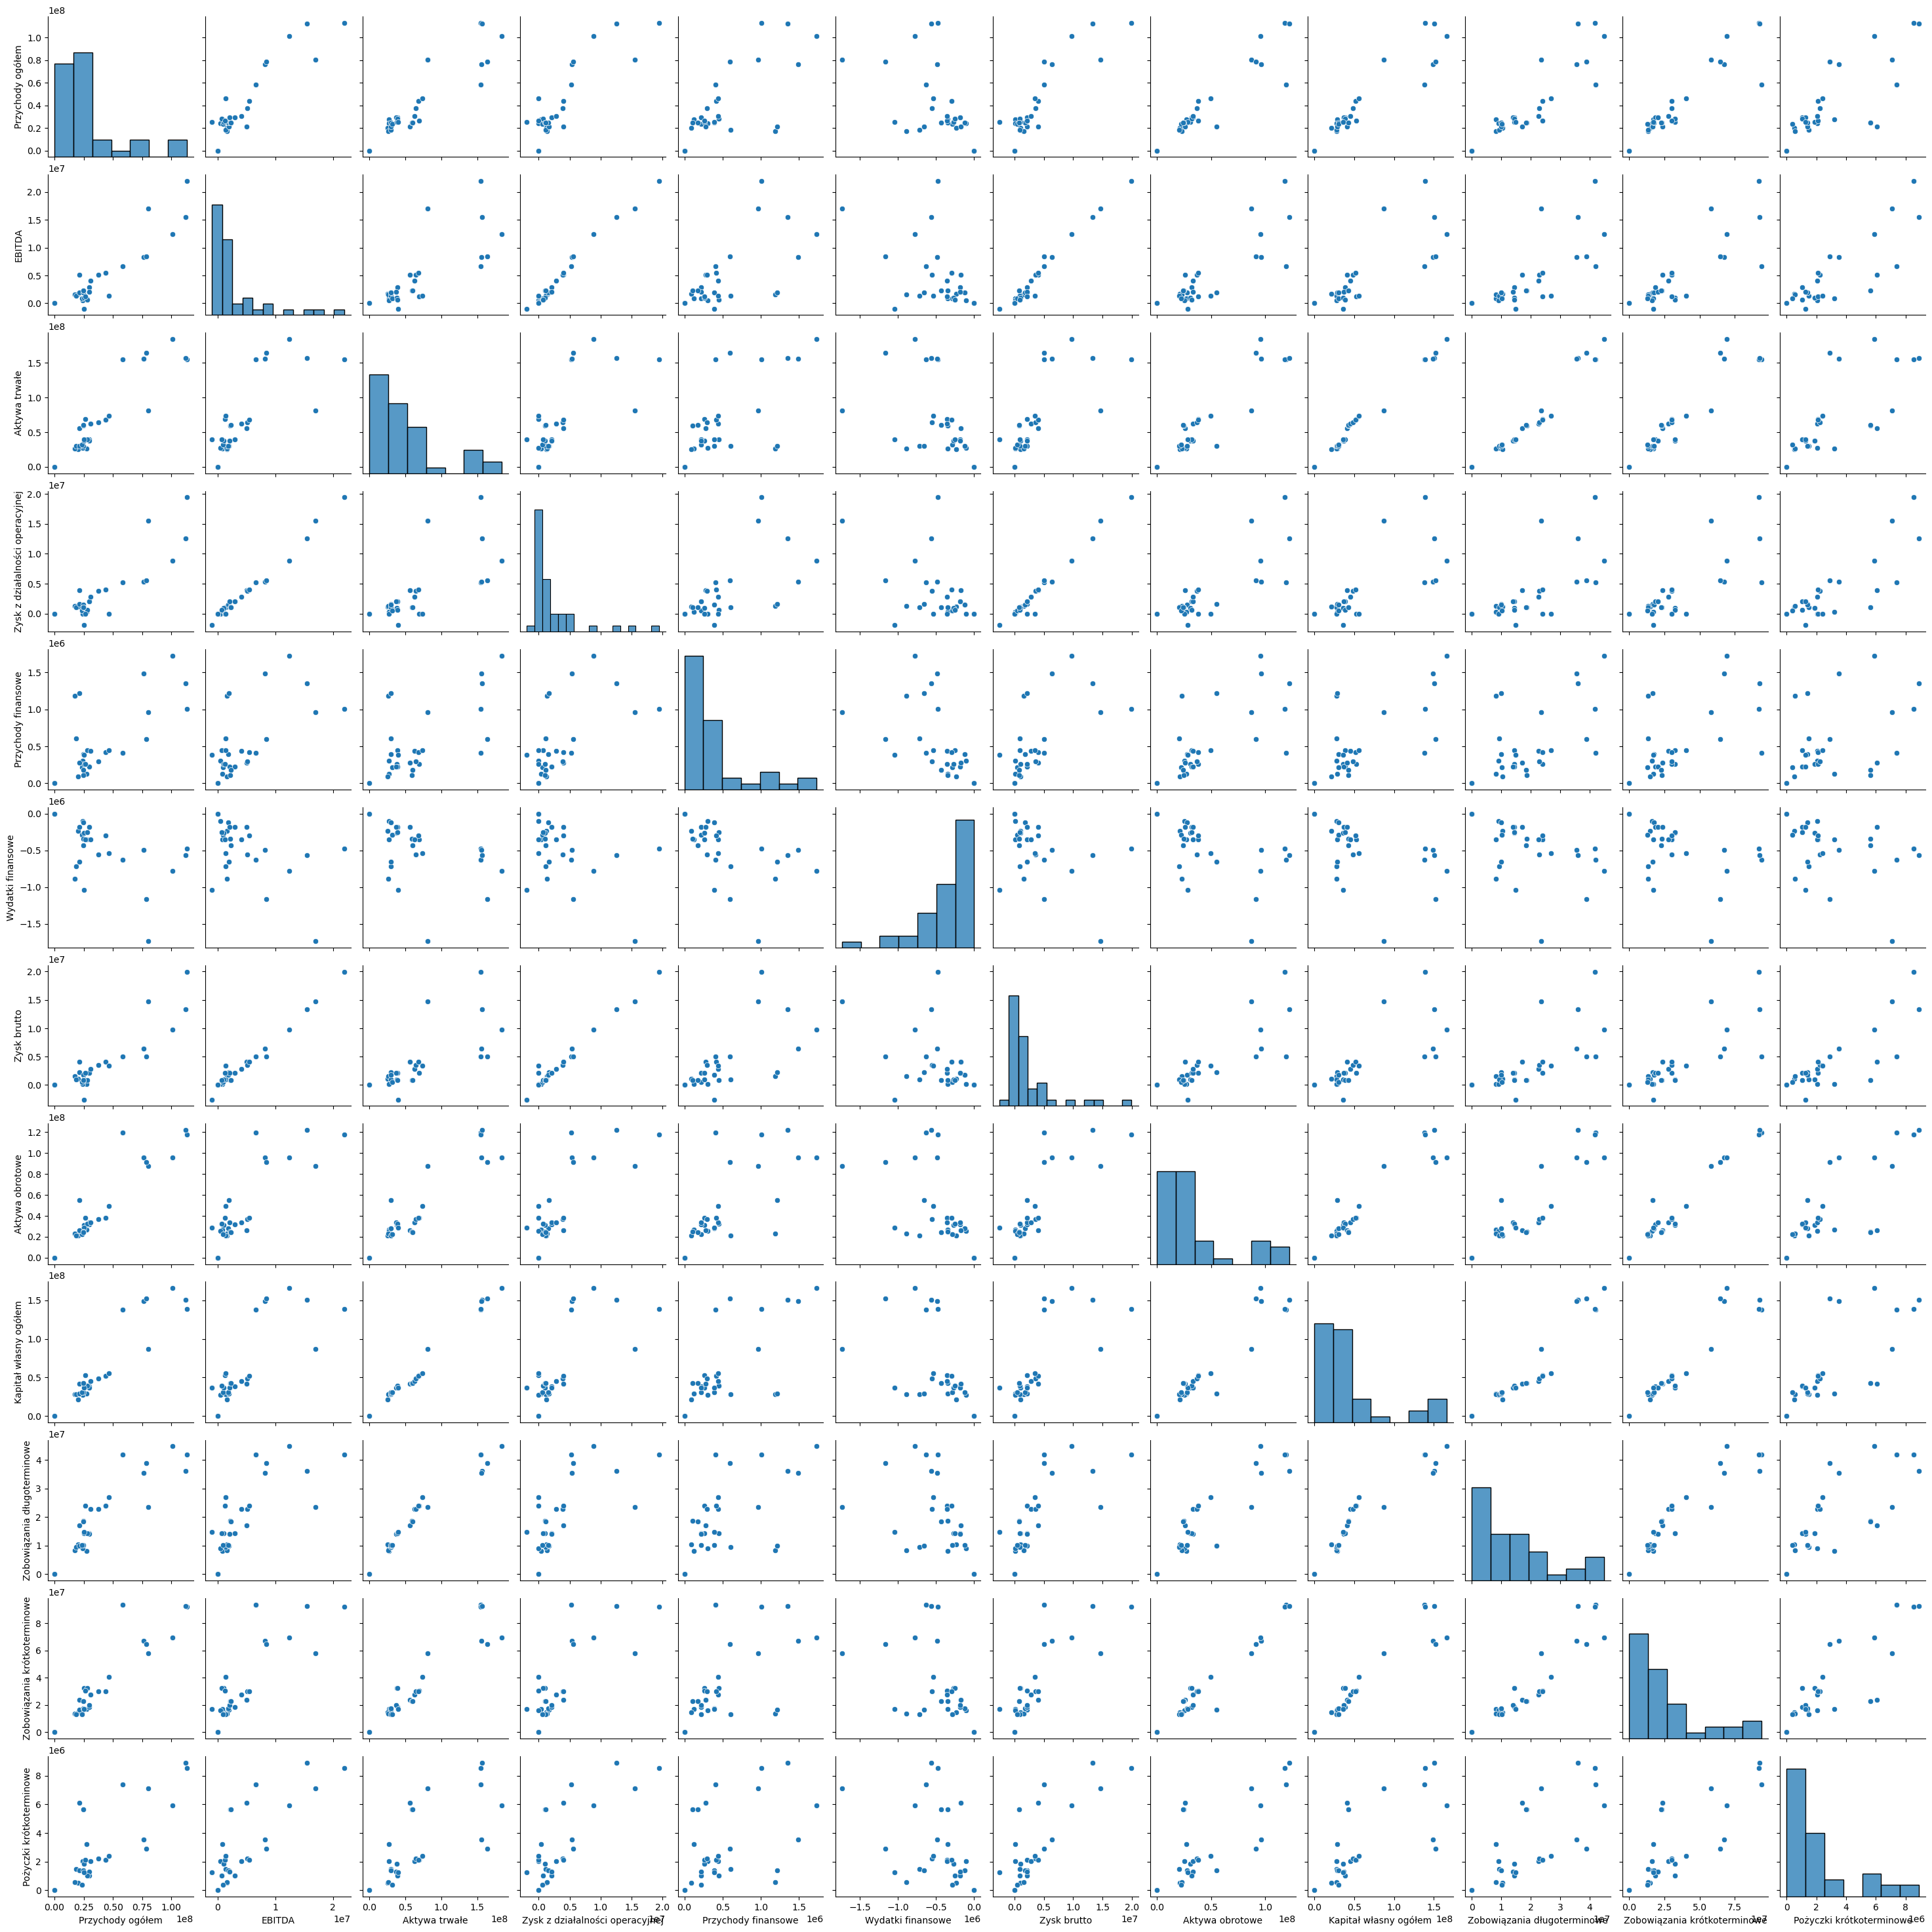

In [4]:
#Żadna ze zmiennych nie posiada wartości pustych. Jest to spowodowane tym, że jeżeli były jakieś braki danych w zbiorze
#Zdecydowałem je zastąpić średnią dla danego okresu, lub zostawić 0 jeżeli żaden z kwartałów nie miał danych

import warnings
warnings.filterwarnings("ignore")

#Zobaczmy sobie wykresy trzech dowolnych zmiennych wexmy na przykład Przychody ogółem, EBITDA oraz Aktywa trwałe. Sprawdźmy czy ich histogramy będą 
#przypominały rozkład normalny.

fig = plt.figure(figsize=(7,12))
pp = sns.pairplot(data[["Przychody ogółem", "EBITDA", "Aktywa trwałe", "Zysk z działalności operacyjnej", "Przychody finansowe", "Wydatki finansowe",
                  "Zysk brutto", "Aktywa obrotowe", "Kapitał własny ogółem", "Zobowiązania długoterminowe", "Zobowiązania krótkoterminowe", "Pożyczki krótkoterminowe"]])
#pp.savefig(f"pp_Orlen.png")

In [5]:
def replace_outliers_with_mean(df, columns=None, threshold=3):
    """
    Identify outliers in the DataFrame using Z-score and replace them with the mean.

    Parameters:
    df : pandas DataFrame
        Input DataFrame.
    columns : list or None, optional
        List of columns to check for outliers. If None, all numeric columns will be checked. Default is None.
    threshold : float, optional
        Z-score threshold for identifying outliers. Default is 3.

    Returns:
    cleaned_df : pandas DataFrame
        DataFrame with outliers replaced by the mean.
    """
    # Select columns to check for outliers
    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns.tolist()

    
    cleaned_df = df.copy()

    
    for column in columns:
        
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())

        
        outlier_indices = z_scores > threshold

        
        cleaned_df.loc[outlier_indices, column] = df[column].mean()

    return cleaned_df


data_ = replace_outliers_with_mean(data)

In [9]:
#Widać, że rozkłady tych zmiennych nie przypominają rozkłady Gaussowskie. Upewnijmy sie jeszcze wykonując test na tych zbiorach
#W celu sprawdzenia pochodzenia próby skorzystamy z testu Shapiro-Wilka z biblioteki scipy
data = data_

def ShaprioWilk(column):
    import scipy.stats as stats
    
    statistic, p_value = stats.shapiro(data[column].to_numpy())
    
    print("Statistic: ", statistic)
    print("P value: ", p_value)
    
    alpha = 0.05
    if p_value > alpha:
        return print(f"The data follow a normal distribution (p-value = {p_value:.4f})")
    else:
        return print(f"The data does not follows a normal distribution (p-value = {p_value:.4f})")




columns = list(data.columns)
columns.remove("Kwartał") #Dane jakosciowe
columns.remove("Indeks") #Nieistotne


columns.remove("Zysk brutto ze sprzedaży")
#columns.remove("Wynik finansowy (zysk / strata)")
columns.remove("Długoterminowe kredyty i pożyczki")
columns.remove("Rok")
columns.remove("Q")
for i in list(columns):
    print()
    print(i)
    print("-------------")
    ShaprioWilk(i)

    
#Zgodnie z wynikiem test próby nie pochodzą z rozkładu normalnego (Gaussa)

#Dla części kolumn policzenie testu było niemozliwe, sprawdźmy dlaczego i poprawmy dane tak, aby nie było żadnego problemu w dalszych krokach analizy


Przychody ogółem
-------------
Statistic:  0.7945395708084106
P value:  2.22571543417871e-06
The data does not follows a normal distribution (p-value = 0.0000)

Zysk z działalności operacyjnej
-------------
Statistic:  0.7255760431289673
P value:  9.875275708282061e-08
The data does not follows a normal distribution (p-value = 0.0000)

EBITDA
-------------
Statistic:  0.6991562843322754
P value:  3.403114945399466e-08
The data does not follows a normal distribution (p-value = 0.0000)

Przychody finansowe
-------------
Statistic:  0.7818461656570435
P value:  1.2027134062009281e-06
The data does not follows a normal distribution (p-value = 0.0000)

Wydatki finansowe
-------------
Statistic:  0.8626244068145752
P value:  9.306311403634027e-05
The data does not follows a normal distribution (p-value = 0.0001)

Zysk brutto
-------------
Statistic:  0.7107502818107605
P value:  5.3907861286006664e-08
The data does not follows a normal distribution (p-value = 0.0000)

Aktywa trwałe
--------

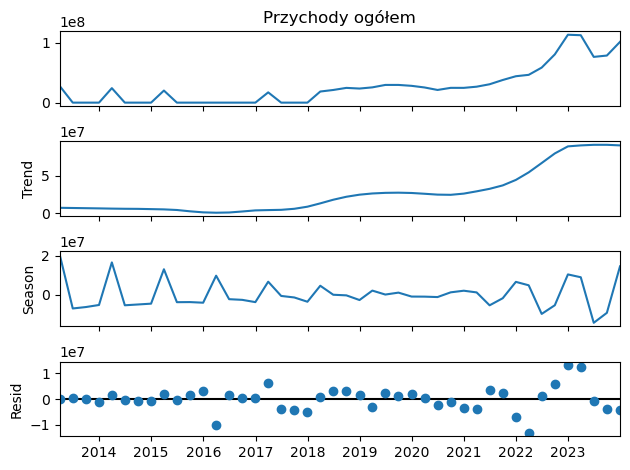

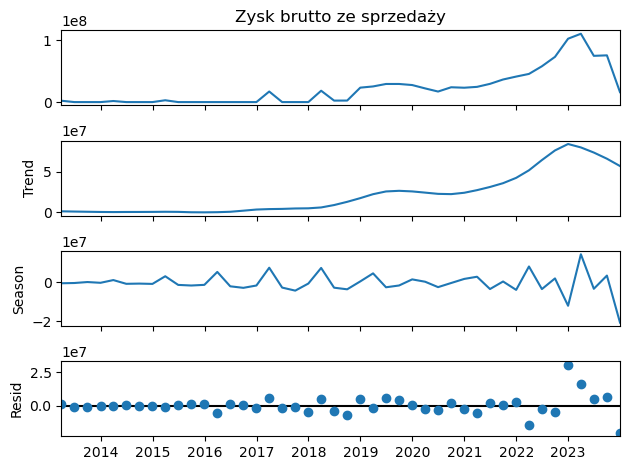

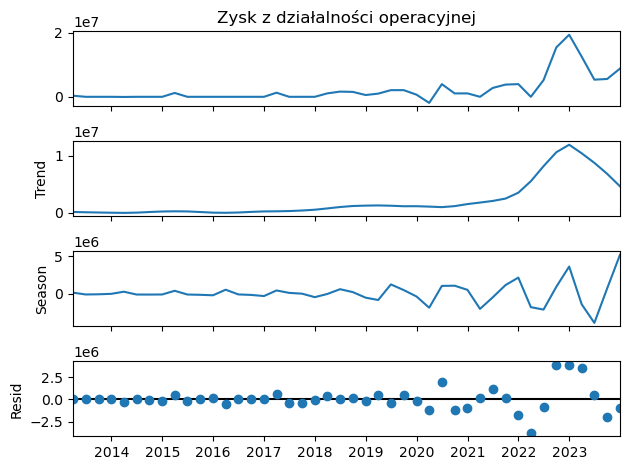

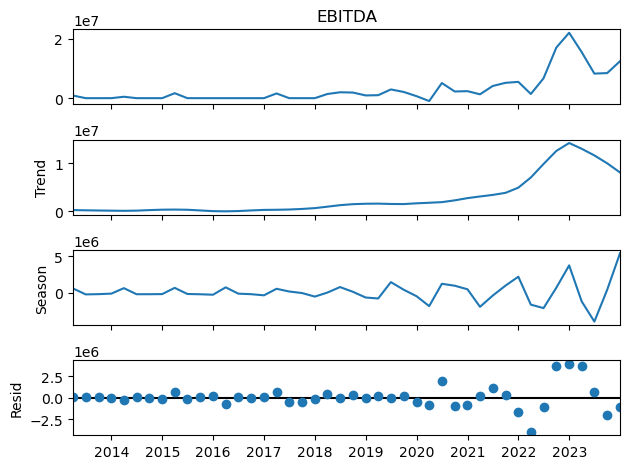

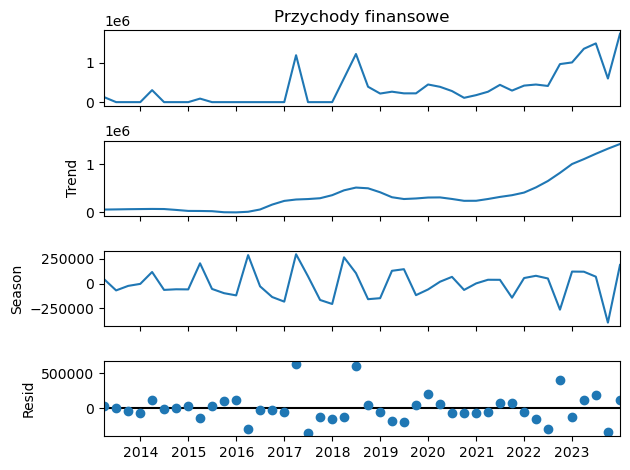

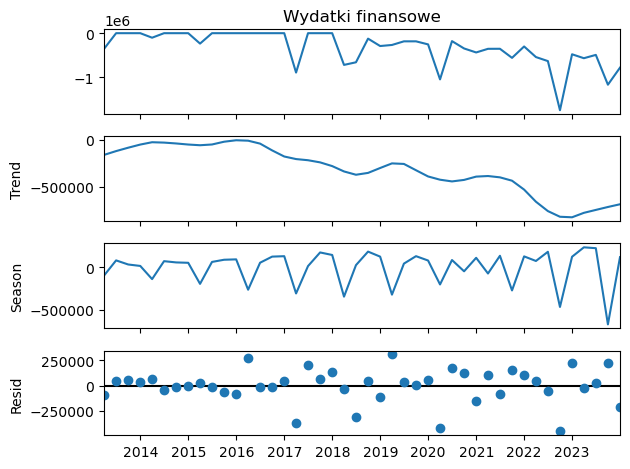

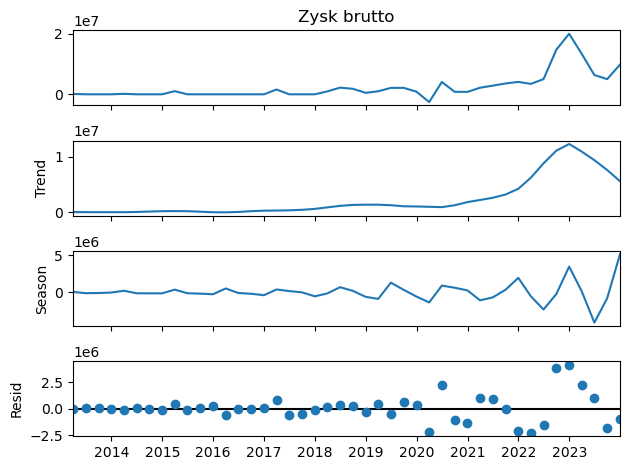

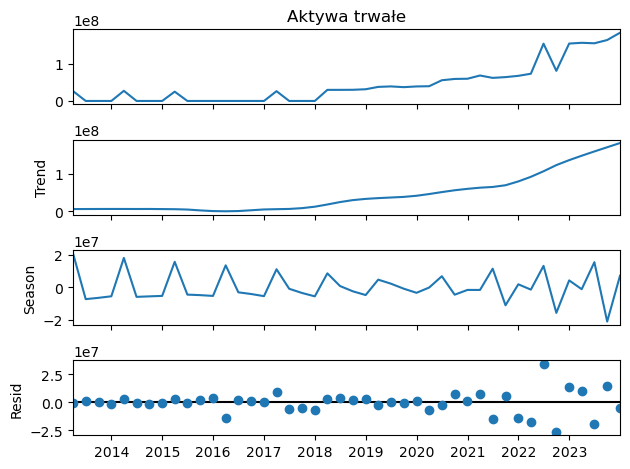

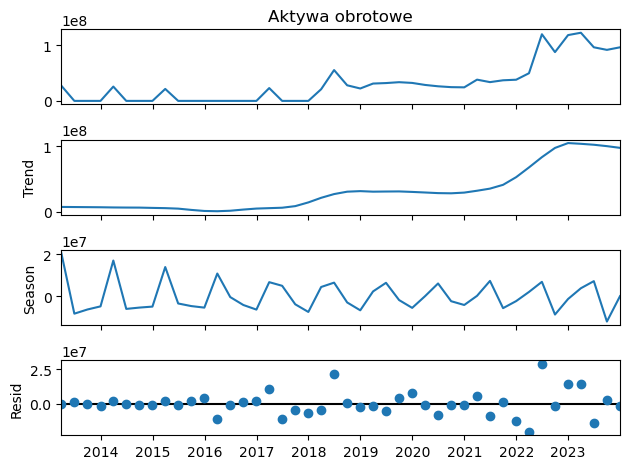

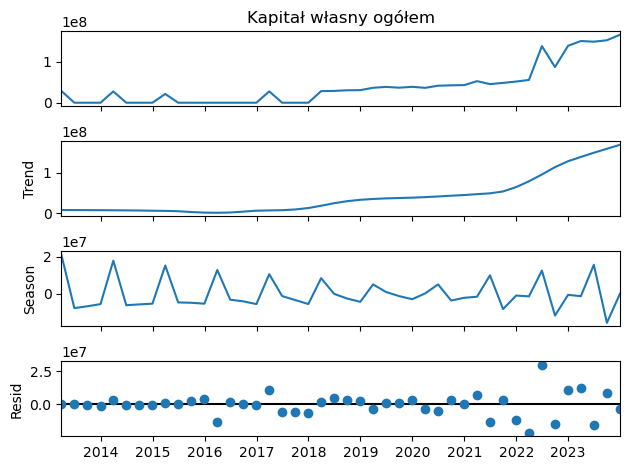

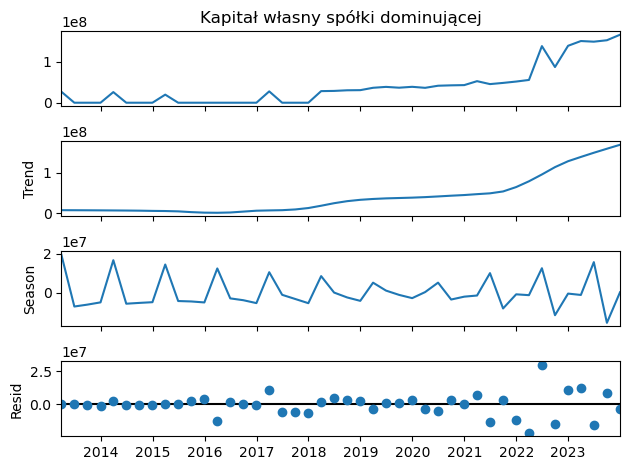

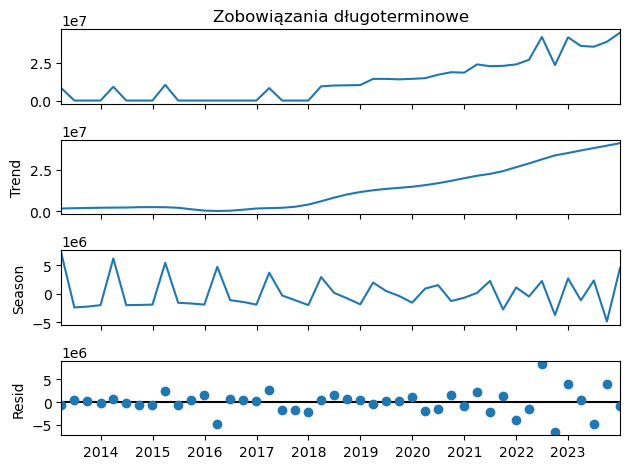

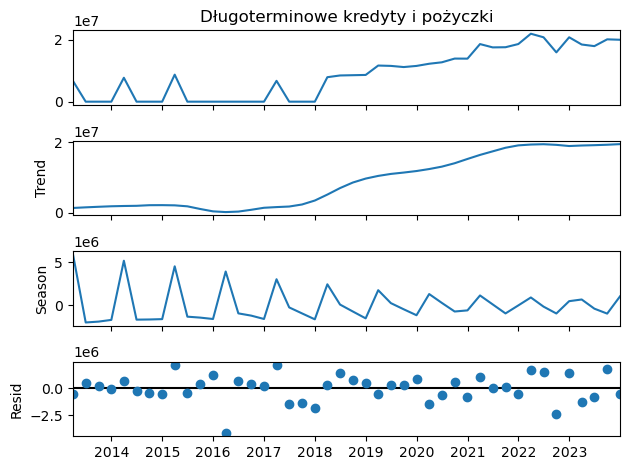

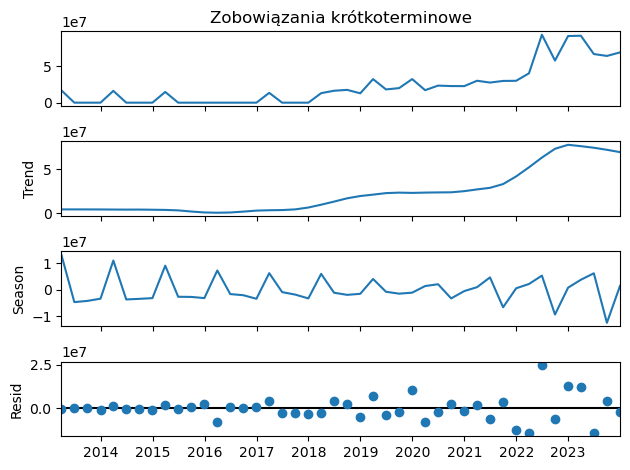

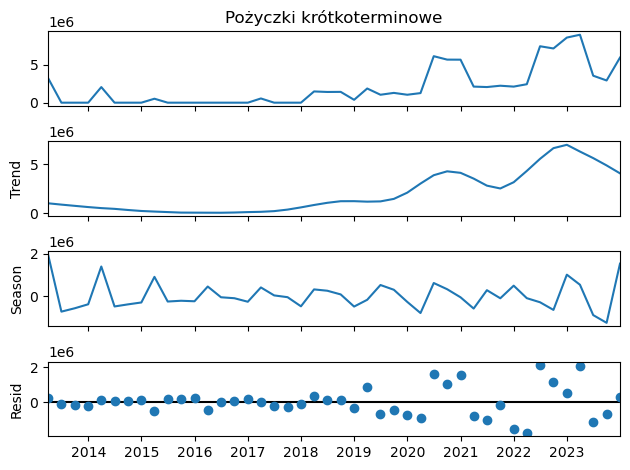

In [6]:
#Rozłózmy wszystkie szeregi na części pierwsze aby sprawdzić czy wystepuje sezonowość
temporary_ = data.copy()
temporary_ = data.drop(columns=["Indeks","Kwartał","Rok","Q"])

for i in list(temporary_.columns):
    
    from statsmodels.tsa.seasonal import STL
    
    season = data[f"{i}"]
    res = STL(endog=season, period=4).fit()
    res = res.plot()
    res.savefig(f"{i}_Orlen.png")
    
res.show()

In [19]:
#Ostatecznie po usunięciu zbędnych i wadliwych zmiennych zostało nam ich 12. Jest to wystarczająca liczba aby spróbować wytrenować
# czy dopasować model do tego szeregu. Sprawdźmy teraz jak wygladają te szeregi, czy są stacjonarne, czy wystepuje autokorelacja.
#W pierwszym kroku sprawidzmy działanie regresji liniowej. Następnie wypróbujemy model SARIMAX.
#Po dopasowaniu klasycznych metod ekonometrycznych sprawdzimy efektywność modeli uczenia maszynowego (Random Forest, XGB), a juz na sam koniec zobaczymy
#jak z prognozami radzą sobie sieci neuronowe.

#Z racji, że mam dostęp do wielu zmiennych pozwole sobie na możliwość edycji powyższych planów i czasa

In [ ]:
#Autoregresja

In [10]:
#Sprawdzam stacjonarnosć każdej ze zmiennych

import pandas as pd
from statsmodels.tsa.stattools import adfuller


def adf_test(timeseries):
    # Perform Dickey-Fuller test
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    if result[1] > 0.05:
        print("Time series is not stationary")
    else:
        print("Time series is stationary")


for i in list(columns):
    print()
    print(i)
    print("-------------")
    adf_test(data[i])



#Żaden z szeregów nie jest stacjonarny według testu ADF, potwierdźmy to testem KPSS


Przychody ogółem
-------------
ADF Statistic: 1.9200174618469505
p-value: 0.9985595525677834
Critical Values:
	1%: -3.6055648906249997
	5%: -2.937069375
	10%: -2.606985625
Time series is not stationary

Zysk z działalności operacyjnej
-------------
ADF Statistic: 2.9220378258484794
p-value: 1.0
Critical Values:
	1%: -3.6461350877925254
	5%: -2.954126991123355
	10%: -2.6159676124885216
Time series is not stationary

EBITDA
-------------
ADF Statistic: 0.6165638108372294
p-value: 0.9880168620387789
Critical Values:
	1%: -3.639224104416853
	5%: -2.9512301791166293
	10%: -2.614446989619377
Time series is not stationary

Przychody finansowe
-------------
ADF Statistic: -3.3826571032185053
p-value: 0.011564490417299228
Critical Values:
	1%: -3.5925042342183704
	5%: -2.931549768951162
	10%: -2.60406594375338
Time series is stationary

Wydatki finansowe
-------------
ADF Statistic: -4.1041014563942895
p-value: 0.0009535156206639997
Critical Values:
	1%: -3.5925042342183704
	5%: -2.93154976895

In [12]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    # Perform KPSS test
    result = kpss(timeseries)
    print('KPSS Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[3].items():
        print(f'\t{key}: {value}')
    if result[1] > 0.05:
        print("Time series is stationary")
    else:
        print("Time series is not stationary")


for i in list(columns):
    print()
    print(i)
    print("-------------")
    kpss_test(data[i])


#Obydwa testy wykazały brak stacjoanrności zmiennych, zróżnicujmy je i sprawdzmy założenie jeszcze raz


Przychody ogółem
-------------
KPSS Statistic: 0.7441857099335462
p-value: 0.01
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Time series is not stationary

Zysk z działalności operacyjnej
-------------
KPSS Statistic: 0.8472505600816517
p-value: 0.01
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Time series is not stationary

EBITDA
-------------
KPSS Statistic: 0.7389288592982296
p-value: 0.01000646733652458
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Time series is not stationary

Przychody finansowe
-------------
KPSS Statistic: 0.7014192639776661
p-value: 0.013416430547484901
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Time series is not stationary

Wydatki finansowe
-------------
KPSS Statistic: 0.9937270770863483
p-value: 0.01
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Time series is not stationary

Zysk brutto
-------------
KPSS Statistic: 0.7106995905299759
p-value: 0.012572764497

In [13]:
#Zróżnicowany dataframe
import warnings
warnings.filterwarnings("ignore")

mol = data.drop(columns=["Kwartał", "Indeks", "Rok", "Q"])
mol_diff = mol.diff()
mol_diff = mol_diff.dropna()

#Sprawdzmy stacjonarnosc

#ADF i KPSS
for i in list(columns):
    print()
    print(i)
    print("-------------")
    adf_test(mol_diff[i])
    kpss_test(mol_diff[i])



#Po róznicowaniu wszystkie szeregi wykazują stacjoanrnosć będąc badanym zarówno testem ADF jak i KPSS,
#Teraz przejdę do badania stopnia autokorelacji


Przychody ogółem
-------------
ADF Statistic: -5.650623385198139
p-value: 9.879842365720826e-07
Critical Values:
	1%: -3.60098336718852
	5%: -2.9351348158036012
	10%: -2.6059629803688282
Time series is stationary
KPSS Statistic: 0.40438956316757807
p-value: 0.0752631193243198
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Time series is stationary

Zysk z działalności operacyjnej
-------------
ADF Statistic: 1.9155001521819468
p-value: 0.9985525526077796
Critical Values:
	1%: -3.653519805908203
	5%: -2.9572185644531253
	10%: -2.6175881640625
Time series is not stationary
KPSS Statistic: 0.31735634401374546
p-value: 0.1
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Time series is stationary

EBITDA
-------------
ADF Statistic: -0.786945315819737
p-value: 0.8229267376331719
Critical Values:
	1%: -3.639224104416853
	5%: -2.9512301791166293
	10%: -2.614446989619377
Time series is not stationary
KPSS Statistic: 0.4563802529891331
p-value: 0.05285333922882

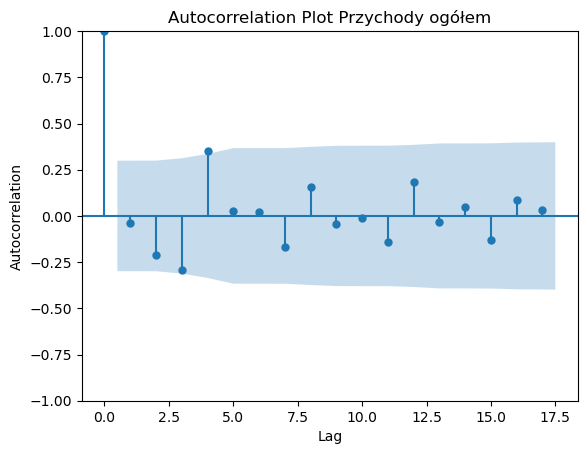

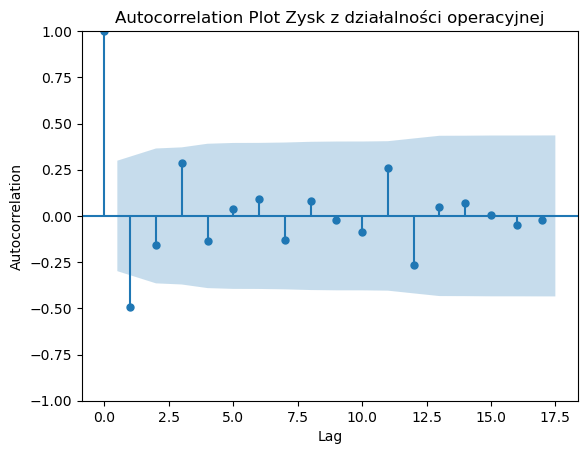

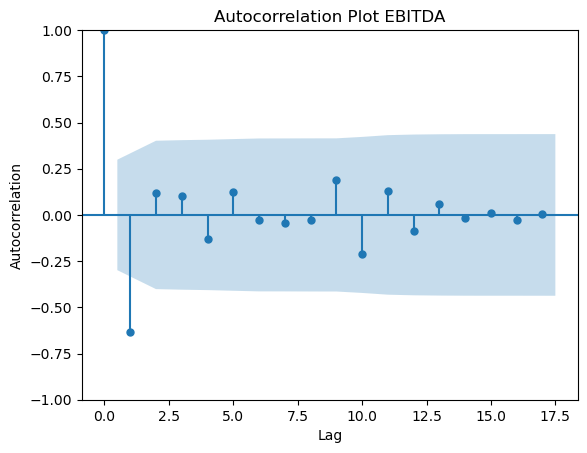

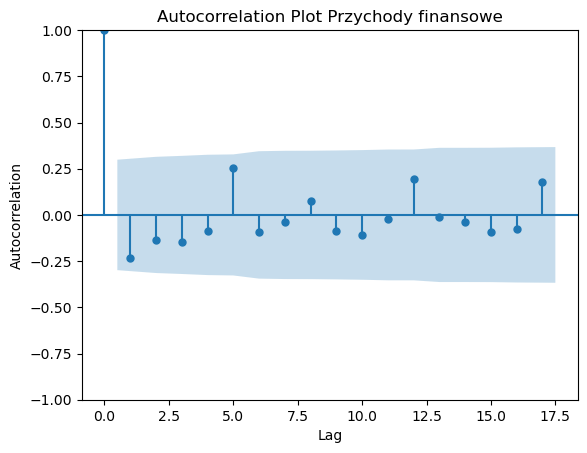

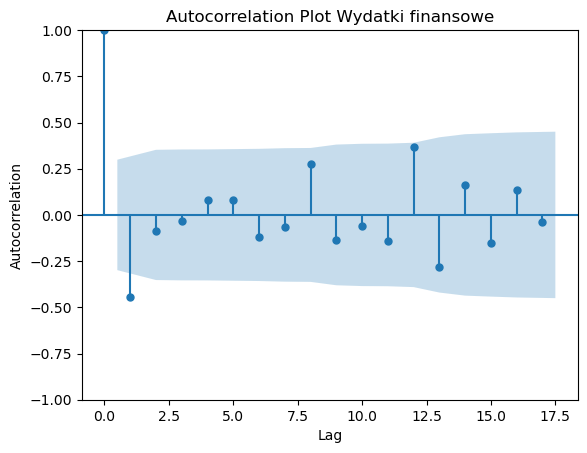

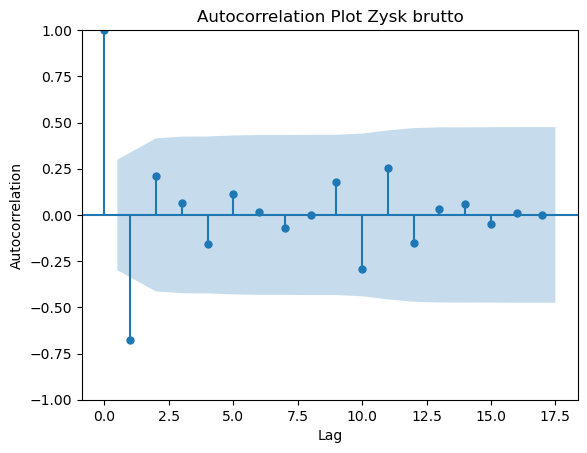

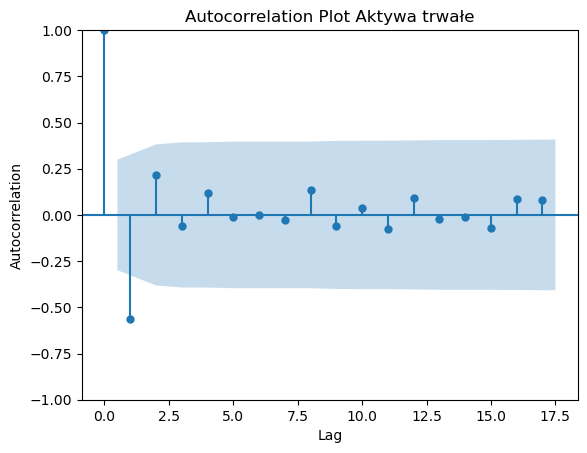

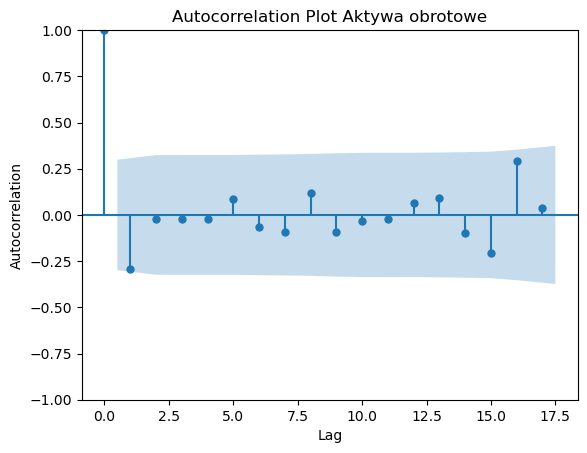

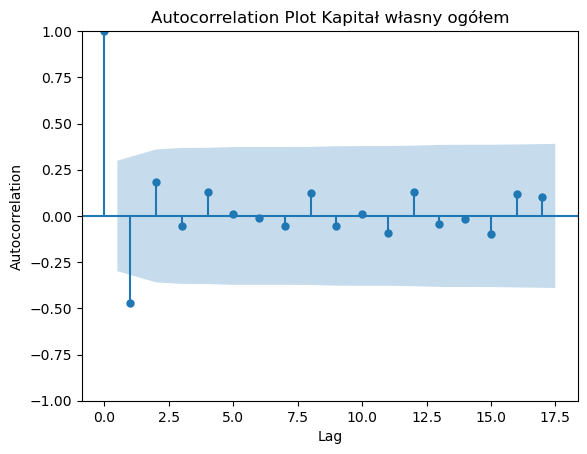

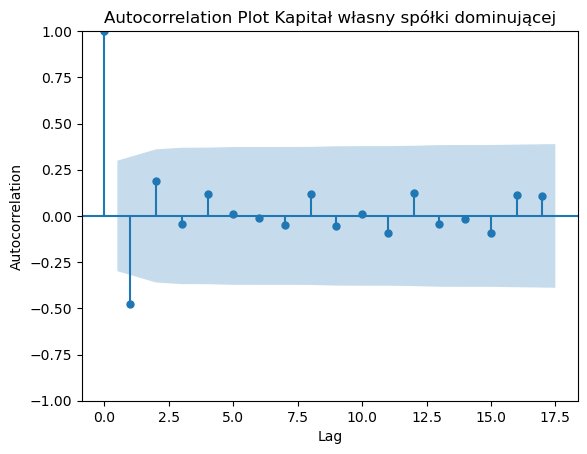

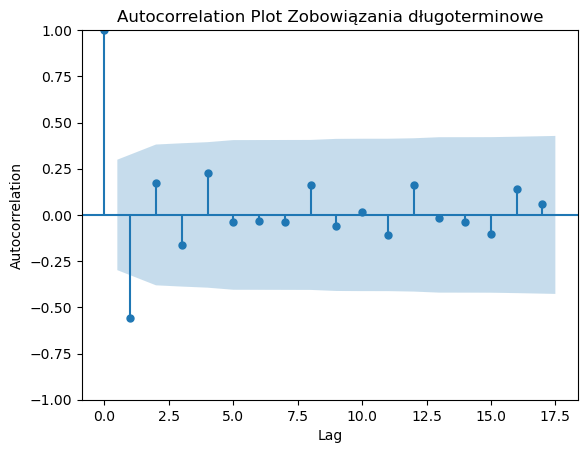

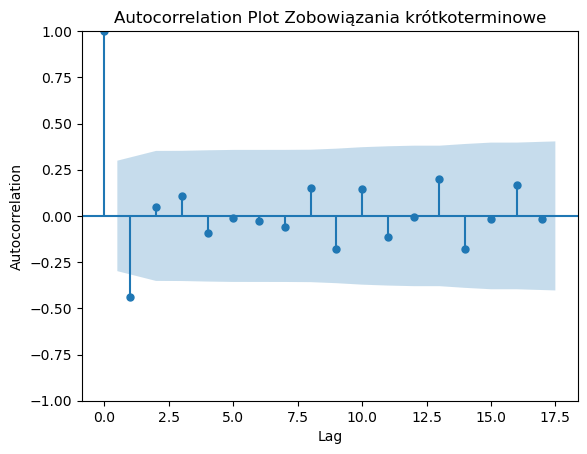

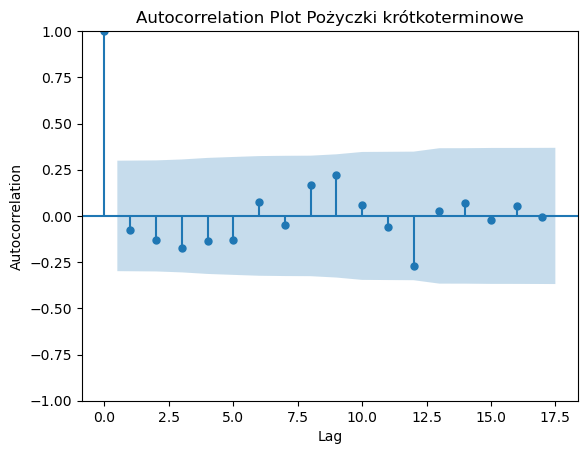

In [14]:
#Sprawdzam autokorelacje każdej ze zmiennych

import warnings
warnings.filterwarnings("ignore")

#ACF
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf


for i in list(columns):
    acf = plot_acf(mol_diff[i])
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.title(f'Autocorrelation Plot {i}')
    acf.savefig(f"{i}_acf_Orlen.png")

    
plt.show()



#Zróbmy liste opóźnien dla każdej ze zmiennych:

#Przychody ogółem: 1,3,5,7,9,11,13,15,17
#Zysk z działalności operacyjnej: 1,3,5,7,9,11,13,15,17
#EBITDA: 1,3,5,7,9,11,13,15,17
#Przychody finansowe: 1,2,3
#Wydatki finansowe: 1,2,3,7,11
#Zysk brutto: 1,3,5
#Aktywa trwałe: 1,5,8
#Aktywa obrotowe: 1,5
#Kapitał własny ogółem: 1,2,3,4,5
#Zobowiązania długoterminowe: 1,2
#Zobowiązania krótkoterminowe:1
#Pożyczki krótkoterminowe: 1,2,4,5

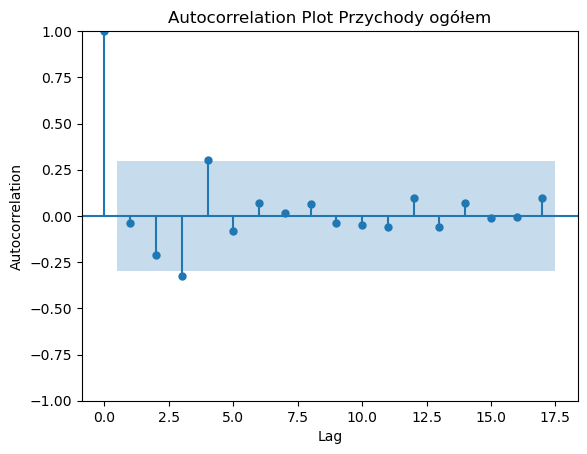

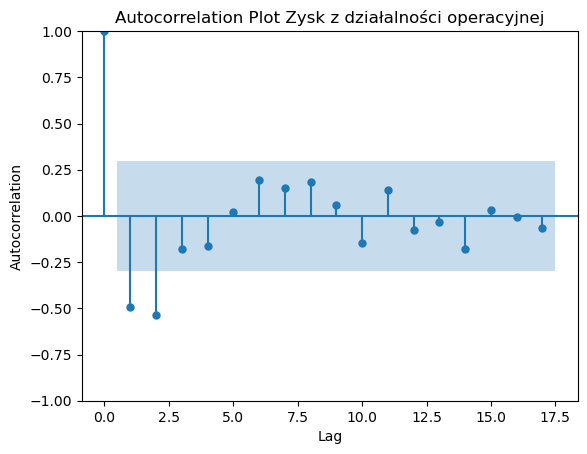

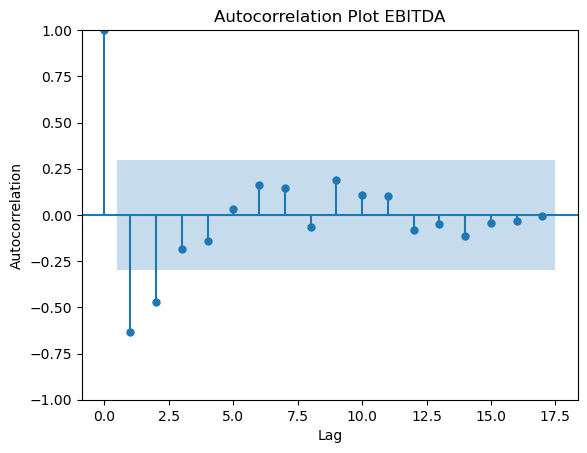

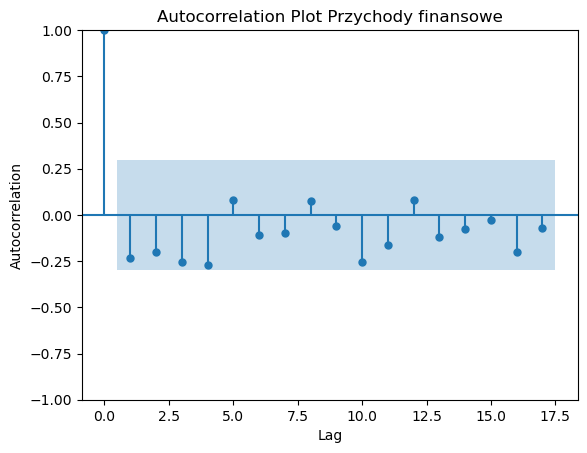

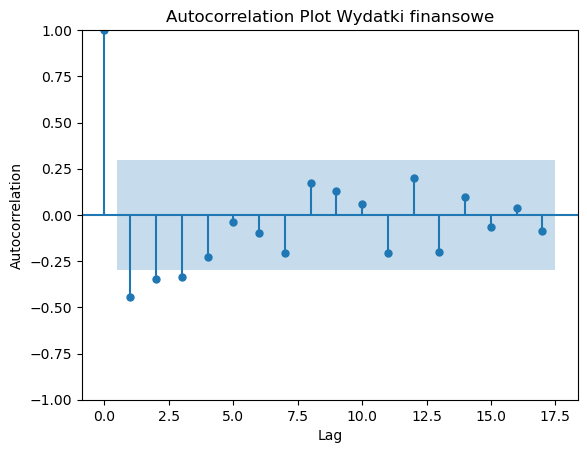

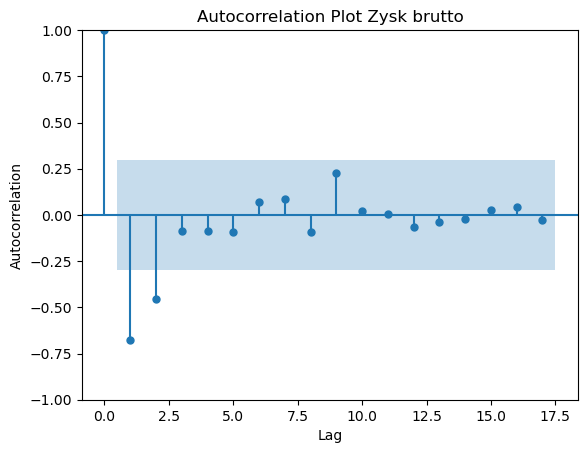

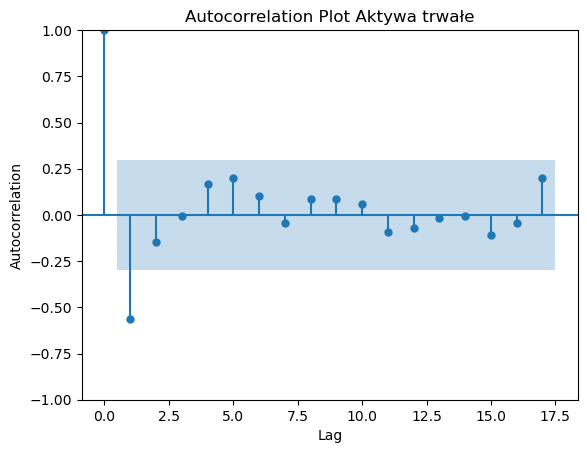

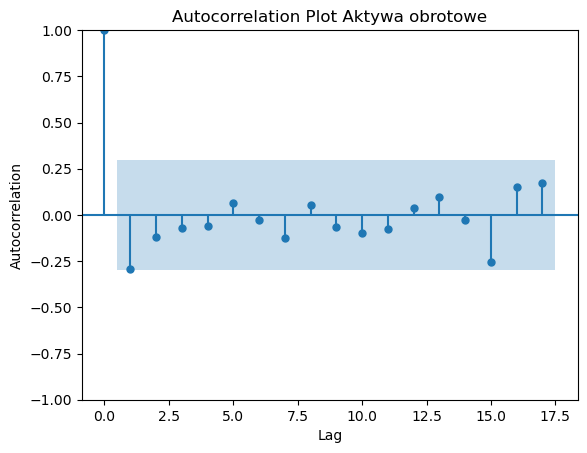

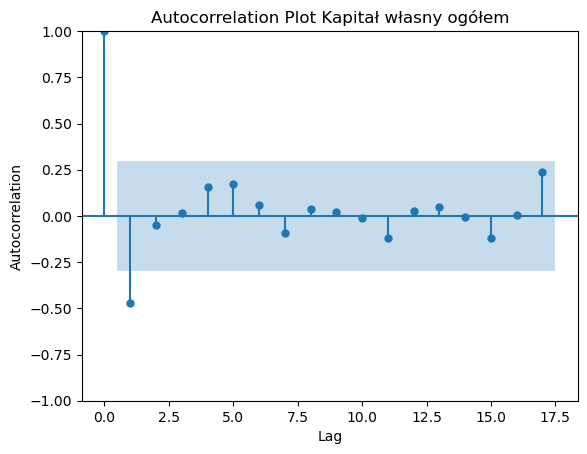

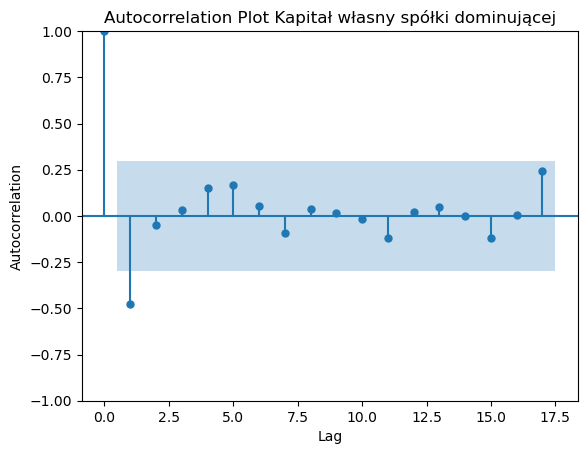

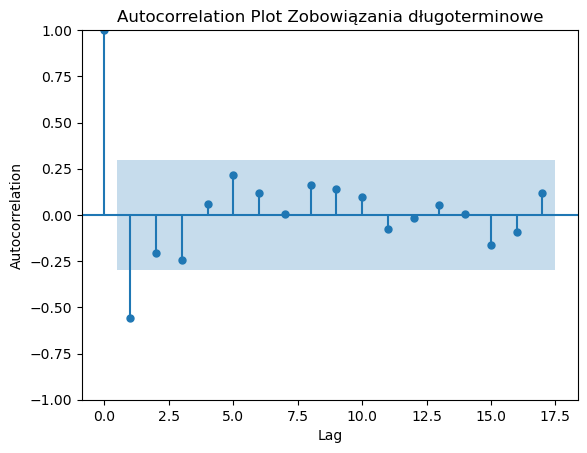

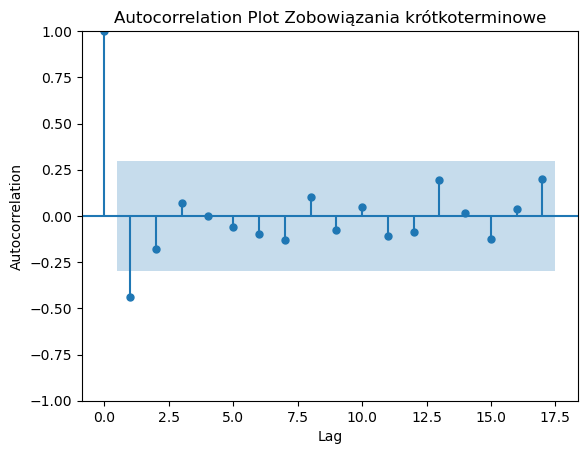

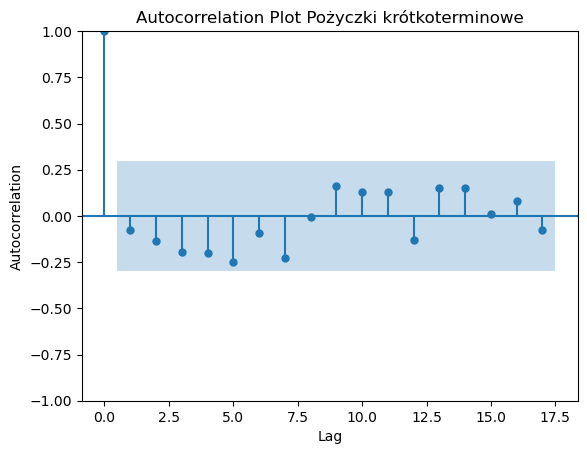

In [15]:
import warnings
warnings.filterwarnings("ignore")


#PACF
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf


for i in list(columns):
    pacf = plot_pacf(mol_diff[i])
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.title(f'Autocorrelation Plot {i}')
    pacf.savefig(f"{i}_pacf_Orlen.png")


    
plt.show()

#Zróbmy liste opóźnien dla każdej ze zmiennych:

#Przychody ogółem: 1,3,4,5,6,9
#Zysk z działalności operacyjnej: 1,3,5
#EBITDA: 1,3
#Przychody finansowe: 1,2,3,5
#Wydatki finansowe: 1,2,3,4
#Zysk brutto: 1,3,4
#Aktywa trwałe: 1
#Aktywa obrotowe: 1
#Kapitał własny ogółem: 1,2
#Zobowiązania długoterminowe: 1,2
#Zobowiązania krótkoterminowe:1
#Pożyczki krótkoterminowe: 1,2,3,5

In [16]:
#VAR

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tools.eval_measures import rmse


#Dziele zbiór danych za część treningową i testową

train = mol_diff[:36]
test = mol_diff[37:]

#Dopasujmy model VAR i wybierzmy ten, który ma najlepszy AIC 

model = VAR(train)
results = model.fit(maxlags=3)

#Sprawdzam podsumowanie
print(results.summary())

results.plot()


#Jak widać w trakcie dopasowywanie modelu VAR otrzymujemy błąd, któy mówi, że piąta tablica nie jest dodatnio okreslona.
#W skrócie wielkość naszych danych jest niewystarczająca do dopasowania modelu.

LinAlgError: 6-th leading minor of the array is not positive definite

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 2013-06-30 to 2019-06-30
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Przychody ogółem                   25 non-null     float64
 1   EBITDA                             25 non-null     float64
 2   Przychody finansowe                25 non-null     float64
 3   Wydatki finansowe                  25 non-null     float64
 4   Zysk brutto                        25 non-null     float64
 5   Aktywa trwałe                      25 non-null     float64
 6   Aktywa obrotowe                    25 non-null     float64
 7   Kapitał własny ogółem              25 non-null     float64
 8   Kapitał własny spółki dominującej  25 non-null     float64
 9   Zobowiązania długoterminowe        25 non-null     float64
 10  Zobowiązania krótkoterminowe       25 non-null     float64
 11  Pożyczki krótkoterminowe           25 non-null  

Przychody ogółem


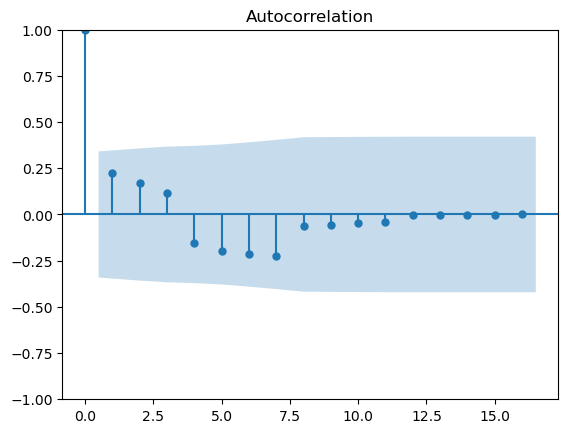

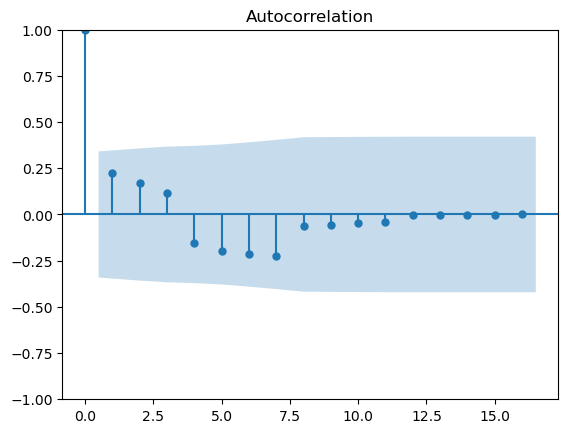

Zysk brutto ze sprzedaży


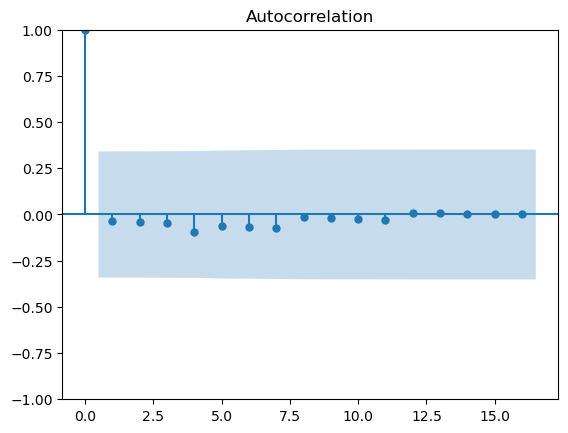

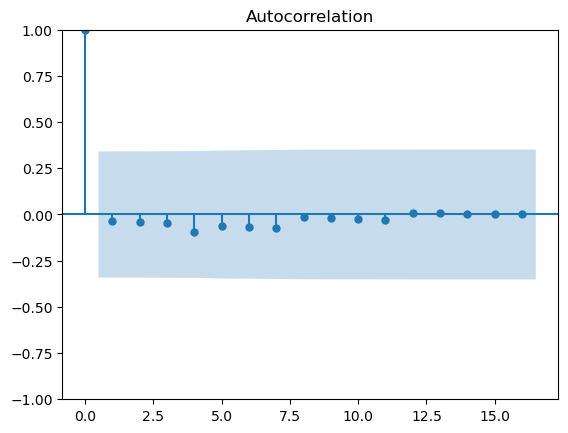

Zysk z działalności operacyjnej


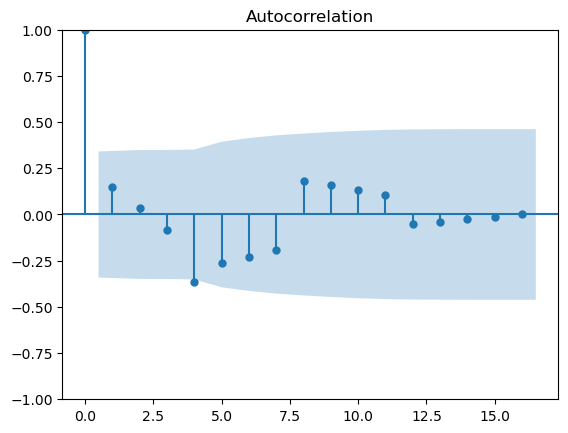

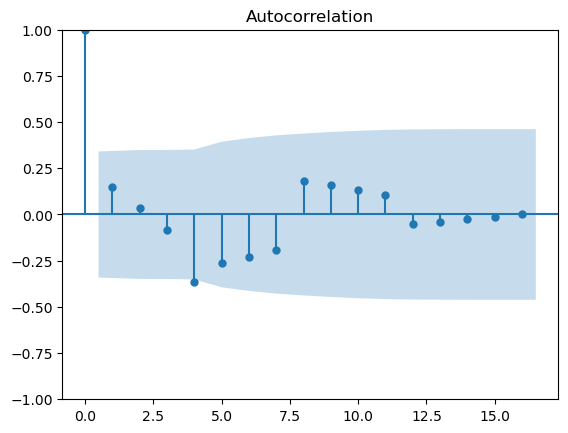

EBITDA


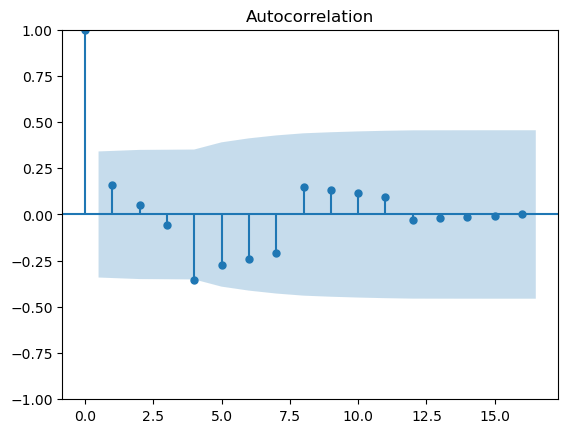

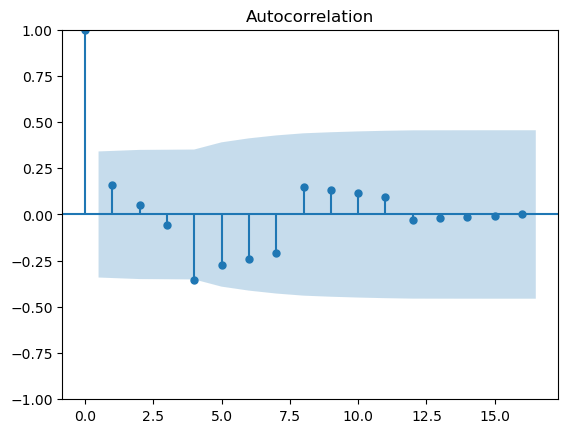

Przychody finansowe


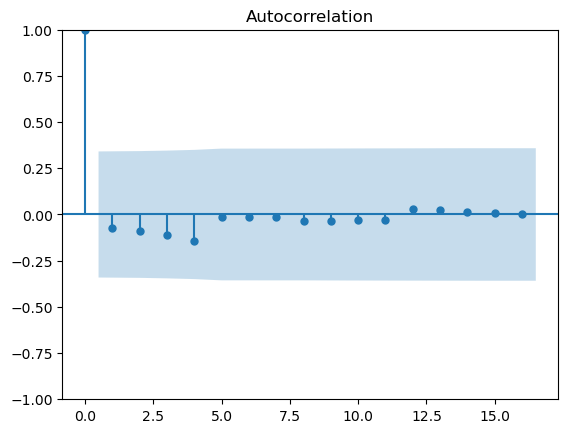

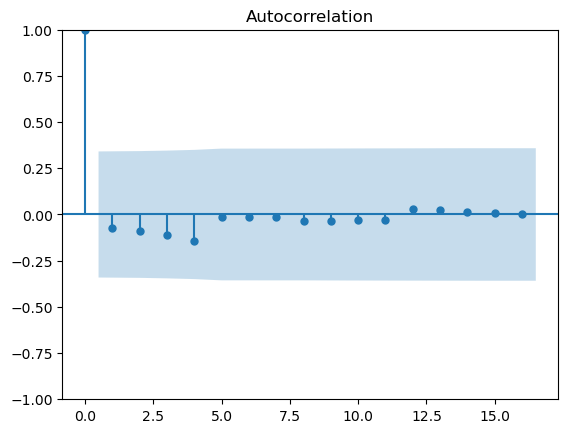

Wydatki finansowe


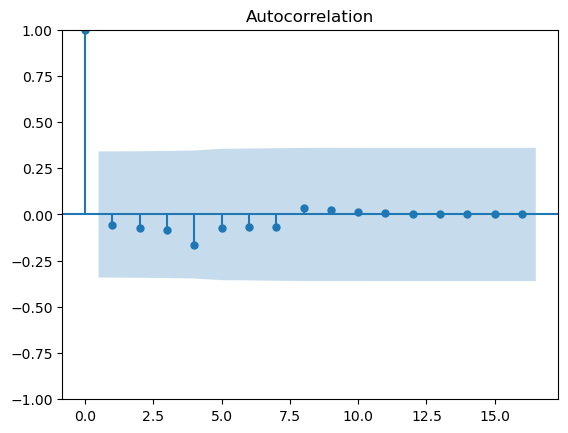

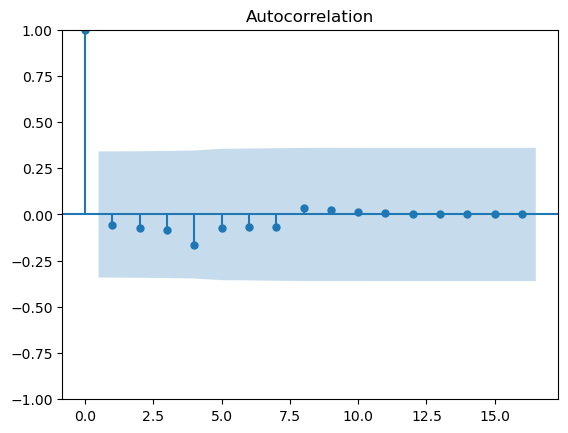

Zysk brutto


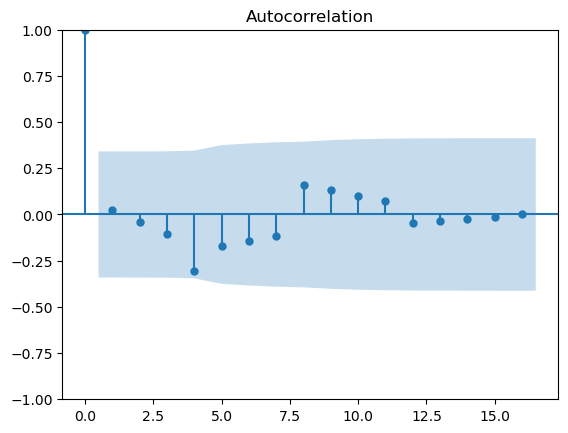

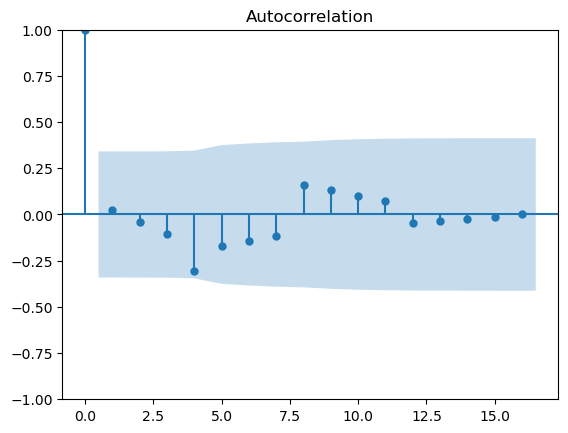

Aktywa trwałe


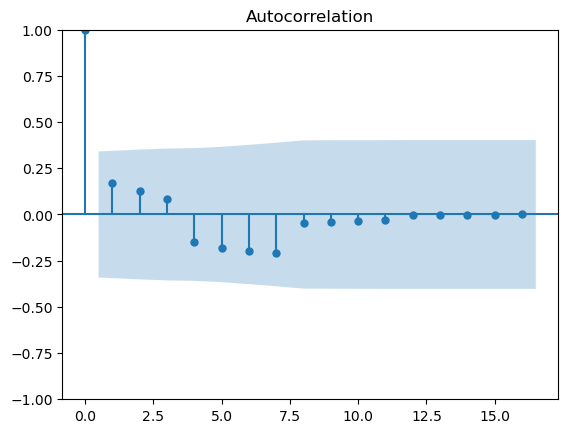

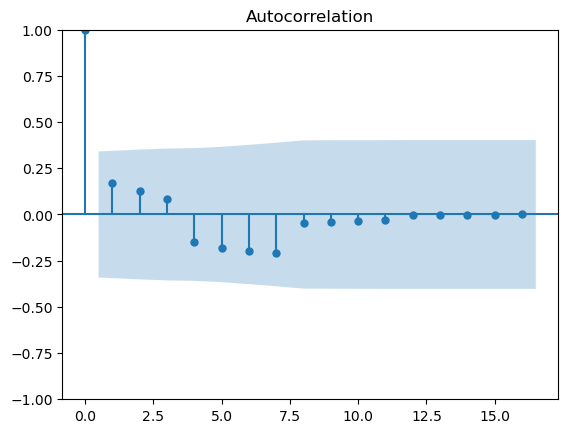

Aktywa obrotowe


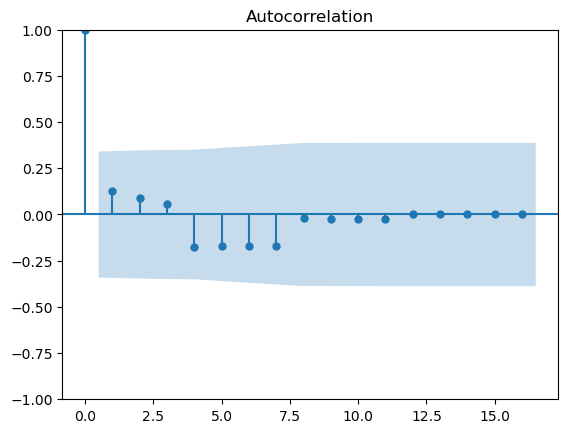

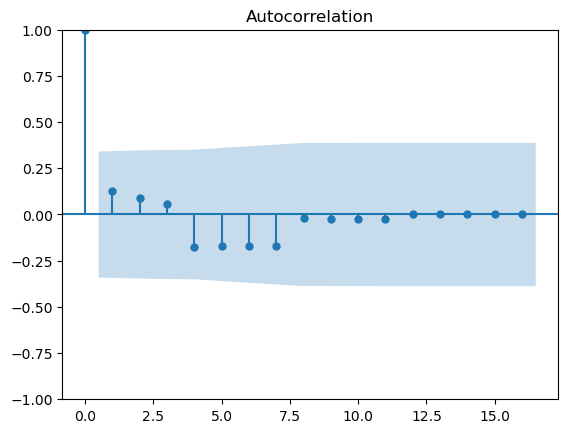

Kapitał własny ogółem


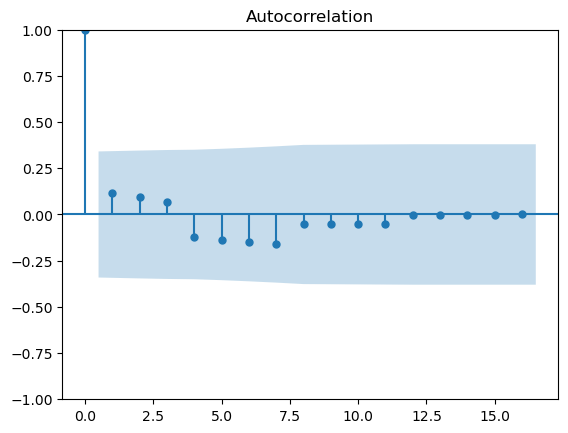

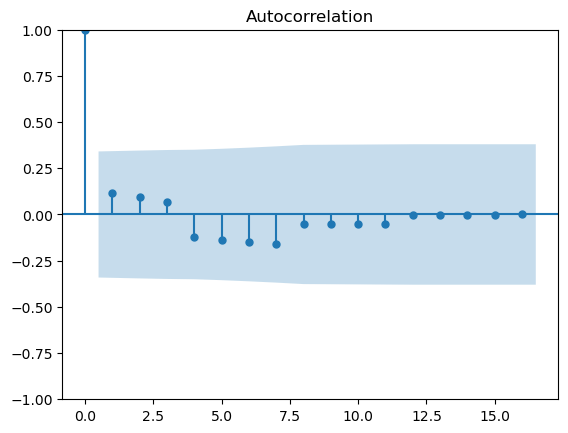

Kapitał własny spółki dominującej


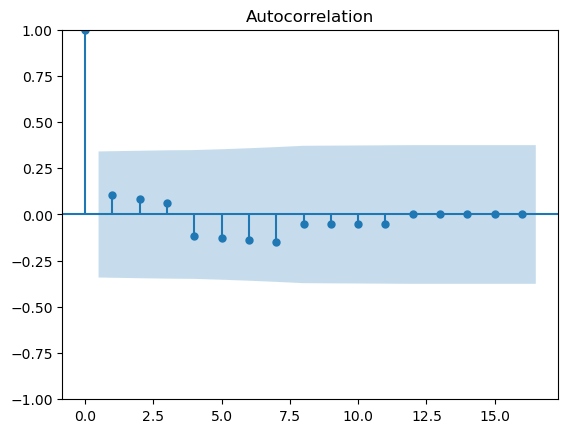

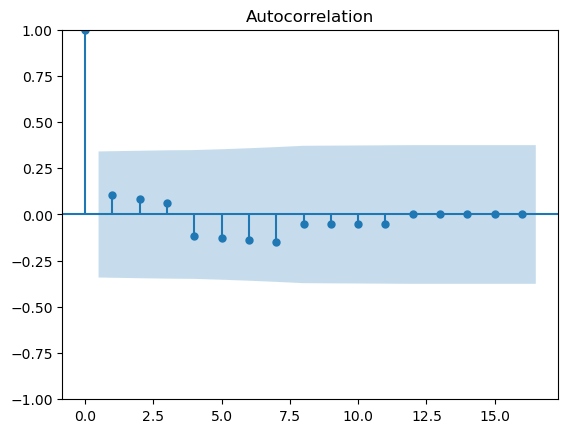

Zobowiązania długoterminowe


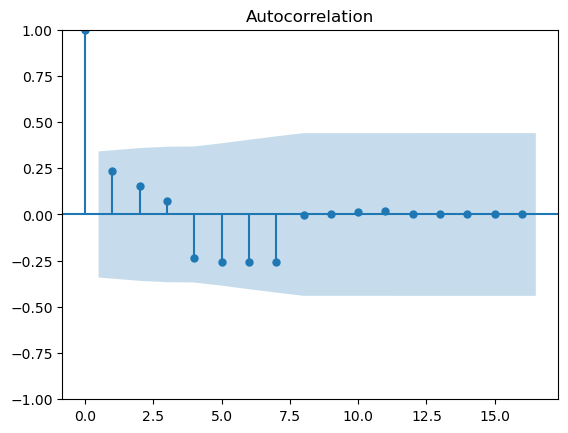

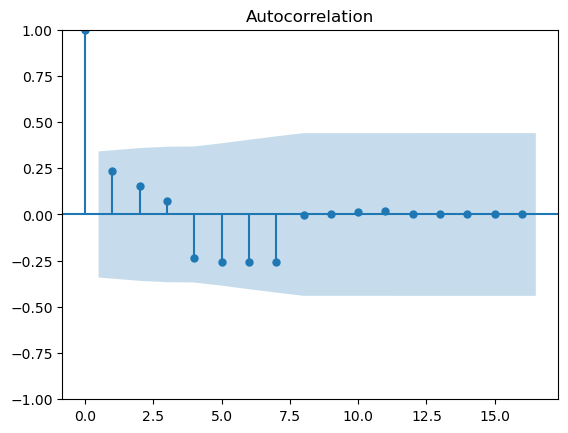

Długoterminowe kredyty i pożyczki


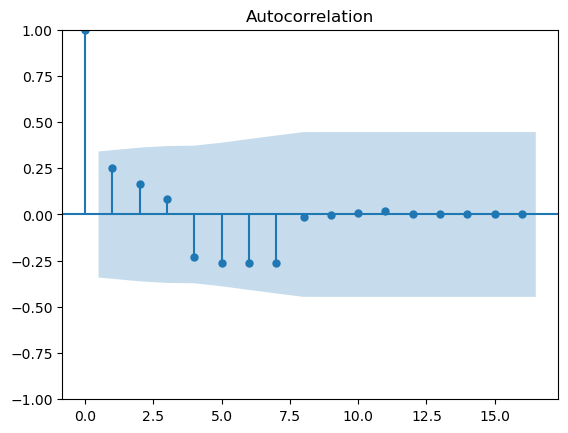

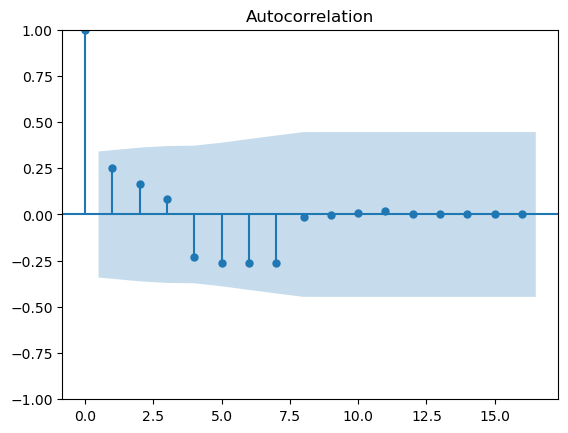

Zobowiązania krótkoterminowe


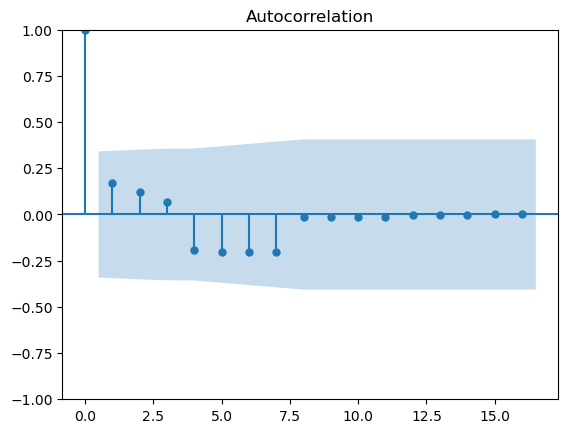

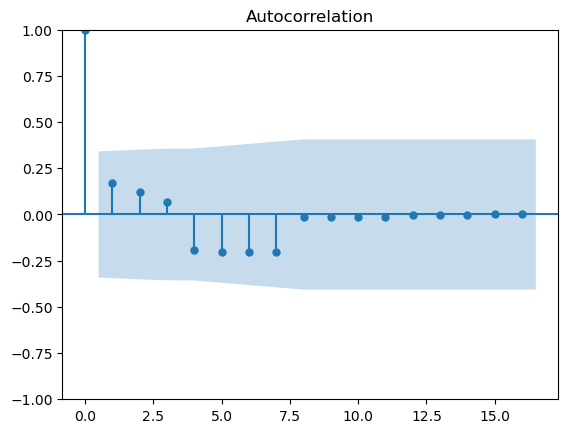

Pożyczki krótkoterminowe


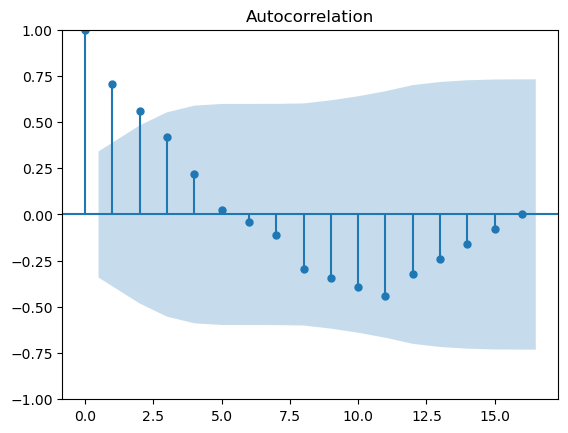

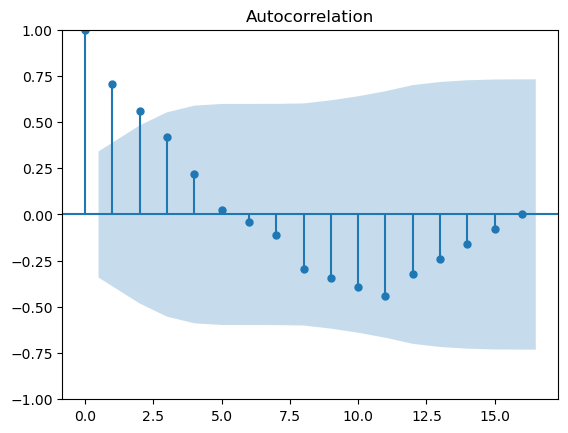

In [17]:
#Sprawdzmy czy reszty modelu wykazują autokroelacje

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


for i in list(results.resid.columns):
# Plot ACF and PACF of residuals
    print(f"{i}")
    plot_acf(results.resid[f"{i}"])
    plot_acf(results.resid[f"{i}"])
    plt.show()


#Na podstawie poniższych wykresów mozna stwierdzić, że nie występuje autokorelacja reszt, a zatem wszystkie zleżności liniowe zostały wyjąsnione

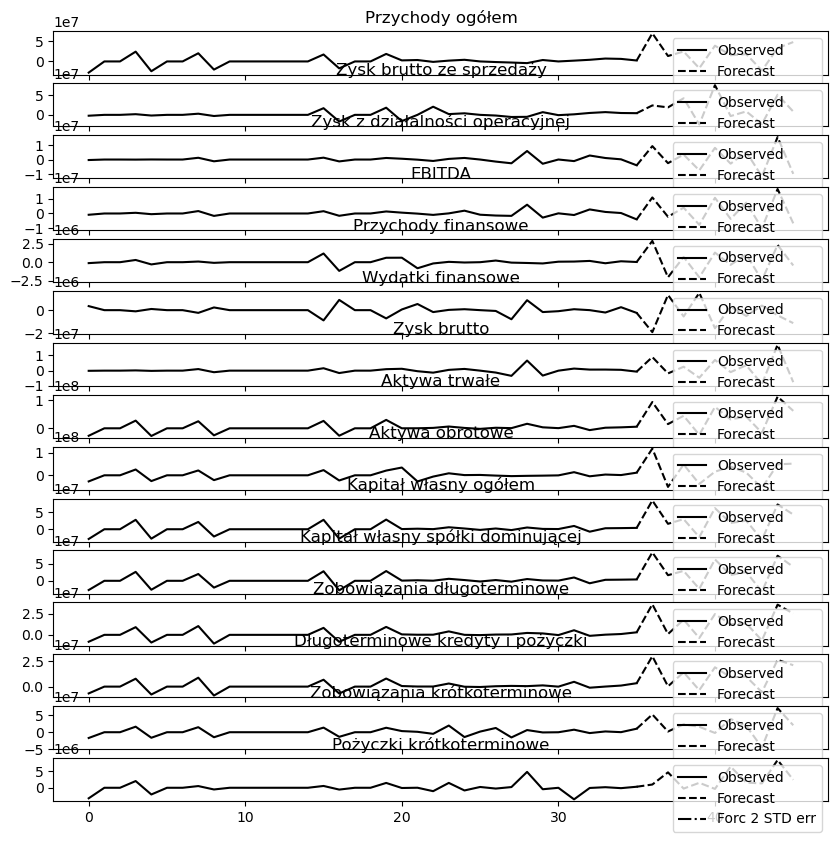

In [18]:
#Prognozy in sample

lag_order = results.k_ar
forc = results.forecast(train.values[-lag_order:], 5)
results.plot_forecast(10)

columns = list(train.columns)
index = [62,63,64,65,66]

forecast = pd.DataFrame(data = forc)
forecast.columns = train.columns
forecast.index = index
test_5 = test[:5]


In [19]:
# Make predictions on the test data
forecast = results.forecast(results.endog, steps=len(test))

# Convert the forecast array to a DataFrame for easier manipulation
forecast_df = pd.DataFrame(forecast, index=test.index, columns=test.columns)

# Calculate residuals
residuals = test - forecast_df

# Calculate RMSE for each variable
rmse_values = rmse(test, residuals, axis=0)

# Calculate PMSE for each variable
pmse_values = (residuals ** 2).mean()

# Print RMSE and PMSE for each variable
print("RMSE:")
print(rmse_values)
print("\nPMSE:")
print(pmse_values)


#Oceniając model na podstawie błędów prognoz można stwierdzić, że model słabo stawia prognozy,
#ponieważ odchylenia wartości rzeczywistych od modelowych są bardzo duże


RMSE:
[35619010.96887531 38987334.28338458  6204780.35640979  7469549.00480719
  1792650.84210337  1324473.09831216  5192736.14541682 55330847.13081702
 60645929.65286461 46465114.72146375 45767459.19955748 20024242.89798117
 16015593.58414495 29056484.91501711  3342974.99909107]

PMSE:
Przychody ogółem                     8.387586e+14
Zysk brutto ze sprzedaży             5.023876e+15
Zysk z działalności operacyjnej      5.003348e+13
EBITDA                               6.361000e+13
Przychody finansowe                  3.293270e+12
Wydatki finansowe                    1.693751e+12
Zysk brutto                          4.794279e+13
Aktywa trwałe                        6.389100e+15
Aktywa obrotowe                      5.476964e+15
Kapitał własny ogółem                3.974151e+15
Kapitał własny spółki dominującej    3.881546e+15
Zobowiązania długoterminowe          7.276869e+14
Długoterminowe kredyty i pożyczki    3.110337e+14
Zobowiązania krótkoterminowe         2.025070e+15
Pożyczki kró

In [34]:
#Random Forest

random_forest_mol = data
#Dostosowanie danych

random_forest_mol['Rok'] = random_forest_mol['Kwartał'].str[-4:]  # Extract last 4 characters as year
random_forest_mol['Q'] = random_forest_mol['Kwartał'].str[1:2]  # Extract 2nd character as quarter
random_forest_mol['Q'] = pd.to_numeric(random_forest_mol['Kwartał'], errors='coerce').fillna(0).astype(int)
#random_forest_mol = random_forest_mol["Rok"].astype(int)



random_forest_mol = random_forest_mol.drop(columns=["Zysk brutto ze sprzedaży", "Indeks", "Kwartał", "Długoterminowe kredyty i pożyczki", "Rok", "Q"])


random_forest_mol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 2013-03-31 to 2023-12-31
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Przychody ogółem                   44 non-null     float64
 1   Zysk z działalności operacyjnej    44 non-null     float64
 2   EBITDA                             44 non-null     float64
 3   Przychody finansowe                44 non-null     float64
 4   Wydatki finansowe                  44 non-null     float64
 5   Zysk brutto                        44 non-null     float64
 6   Aktywa trwałe                      44 non-null     float64
 7   Aktywa obrotowe                    44 non-null     float64
 8   Kapitał własny ogółem              44 non-null     float64
 9   Kapitał własny spółki dominującej  44 non-null     float64
 10  Zobowiązania długoterminowe        44 non-null     float64
 11  Zobowiązania krótkoterminowe       44 non-null  

In [21]:
#Ustalmy benchmark do którego będziemy mogli póxniej odnieść nasz model.
#Do tego wykorzystam model ARIMA, ponieważ mam już gotowe dane i sprawdzone założenia, pozostało je tylko dopasować
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

#Na podstawie wczesniej przeprowadzonych testów 

train_t = train["Przychody ogółem"]
model = SARIMAX(train_t, order=(3, 1, 0), seasonal_order=(1, 0, 0, 4))
results = model.fit()

# Wyświetlenie podsumowania modelu
print(results.summary())


                                     SARIMAX Results                                     
Dep. Variable:                  Przychody ogółem   No. Observations:                   36
Model:             SARIMAX(3, 1, 0)x(1, 0, 0, 4)   Log Likelihood                -607.799
Date:                           Mon, 27 May 2024   AIC                           1225.598
Time:                                   20:31:56   BIC                           1233.375
Sample:                               06-30-2013   HQIC                          1228.282
                                    - 03-31-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8545      0.071    -12.103      0.000      -0.993      -0.716
ar.L2         -0.7703      0.080     -9.609

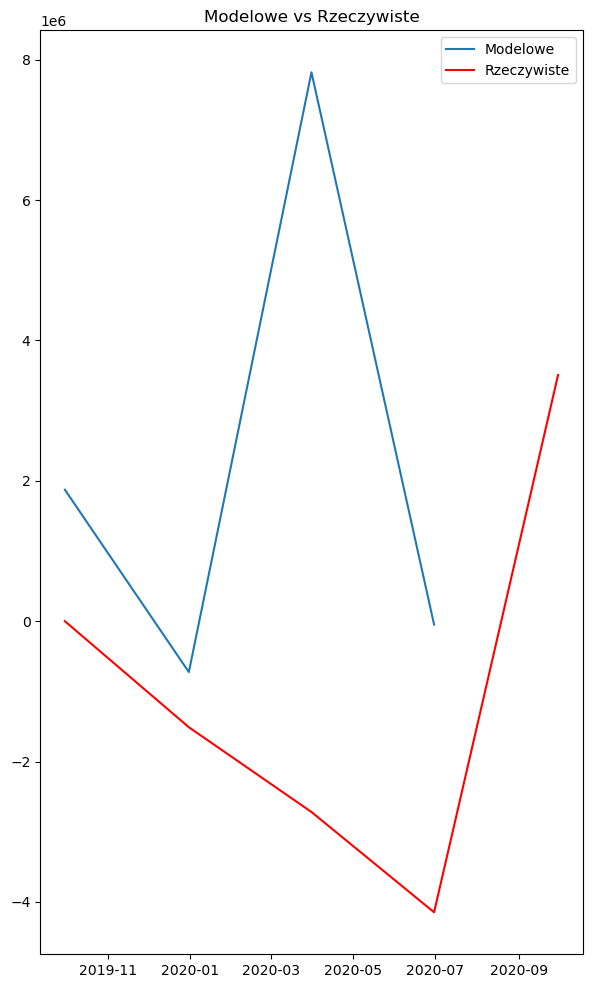

In [14]:
forecast_results = results.forecast(steps=5)
forecast_result = pd.DataFrame(forecast_results, index=test[:5].index)
test_t = test[:5]

fig = plt.figure(figsize=(7,12))
plt.plot(forecast_result, label="Modelowe")
plt.plot(test_t["Przychody ogółem"], c='r', label="Rzeczywiste")
plt.title("Modelowe vs Rzeczywiste")
plt.legend()
plt.show()

                                     SARIMAX Results                                      
Dep. Variable:                   Przychody ogółem   No. Observations:                   36
Model:             SARIMAX(3, 0, 3)x(1, 0, [], 4)   Log Likelihood                -620.866
Date:                            Mon, 27 May 2024   AIC                           1257.733
Time:                                    20:31:59   BIC                           1270.401
Sample:                                06-30-2013   HQIC                          1262.154
                                     - 03-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2524      0.275      0.918      0.359      -0.286       0.791
ar.L2         -0.4390      0.240   

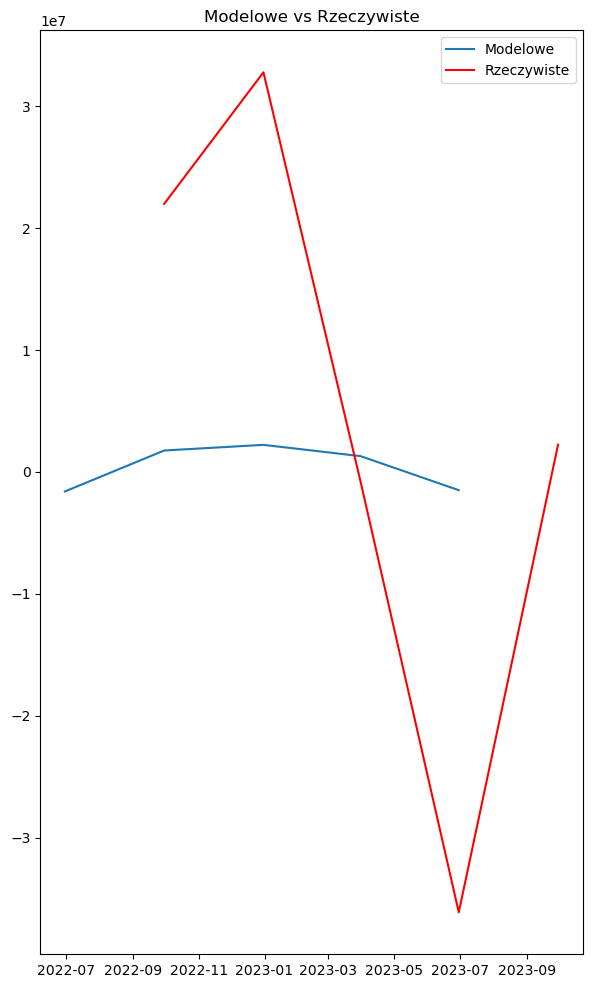

Błąd średniokwadratowy (MSE):  587972047750227.2
MAPE:  170.01 %
                                     SARIMAX Results                                      
Dep. Variable:           Zysk brutto ze sprzedaży   No. Observations:                   36
Model:             SARIMAX(3, 0, 3)x(1, 0, [], 4)   Log Likelihood                -617.186
Date:                            Mon, 27 May 2024   AIC                           1250.372
Time:                                    20:32:00   BIC                           1263.041
Sample:                                06-30-2013   HQIC                          1254.794
                                     - 03-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0763      1.413     -0.762      

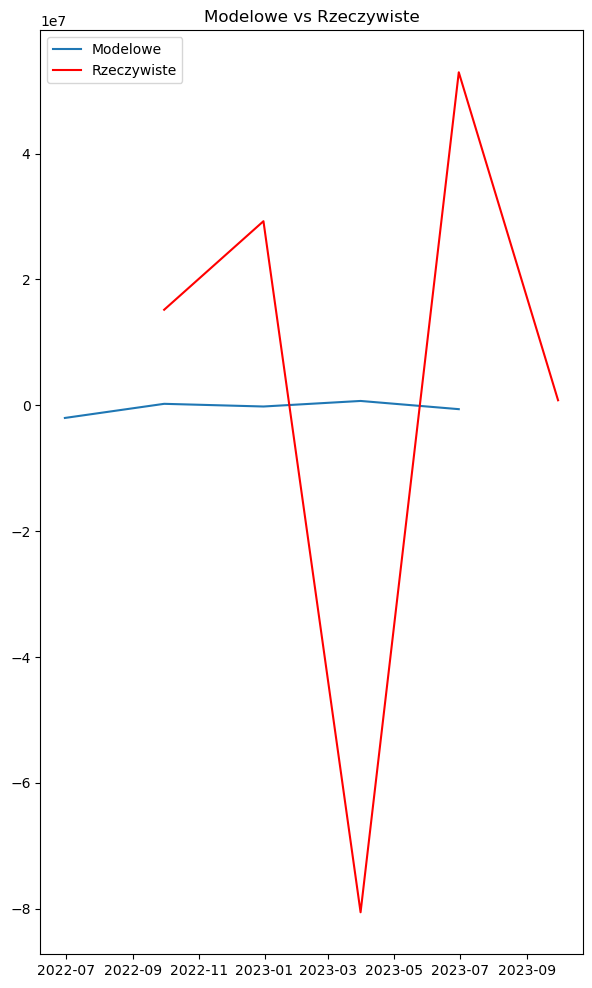

Błąd średniokwadratowy (MSE):  2066380548008790.0
MAPE:  117.35 %
                                      SARIMAX Results                                      
Dep. Variable:     Zysk z działalności operacyjnej   No. Observations:                   36
Model:              SARIMAX(3, 0, 3)x(1, 0, [], 4)   Log Likelihood                -548.204
Date:                             Mon, 27 May 2024   AIC                           1112.407
Time:                                     20:32:00   BIC                           1125.076
Sample:                                 06-30-2013   HQIC                          1116.829
                                      - 03-31-2022                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5022      0.525     -0.

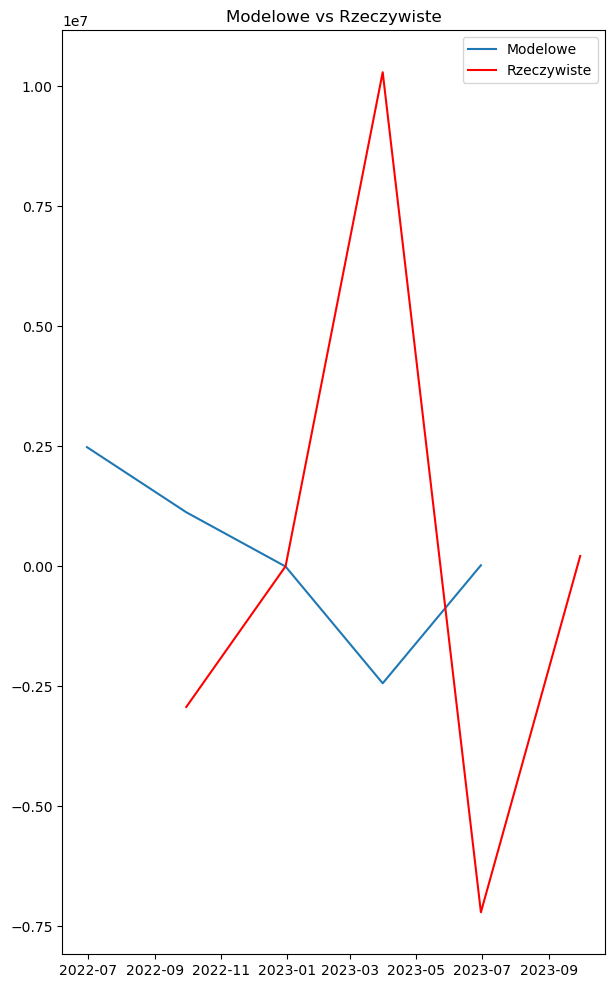

Błąd średniokwadratowy (MSE):  31844520172092.1
MAPE:  inf %
                                     SARIMAX Results                                      
Dep. Variable:                             EBITDA   No. Observations:                   36
Model:             SARIMAX(3, 0, 3)x(1, 0, [], 4)   Log Likelihood                -550.671
Date:                            Mon, 27 May 2024   AIC                           1117.342
Time:                                    20:32:01   BIC                           1130.010
Sample:                                06-30-2013   HQIC                          1121.763
                                     - 03-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6102      0.281     -2.173      0.03

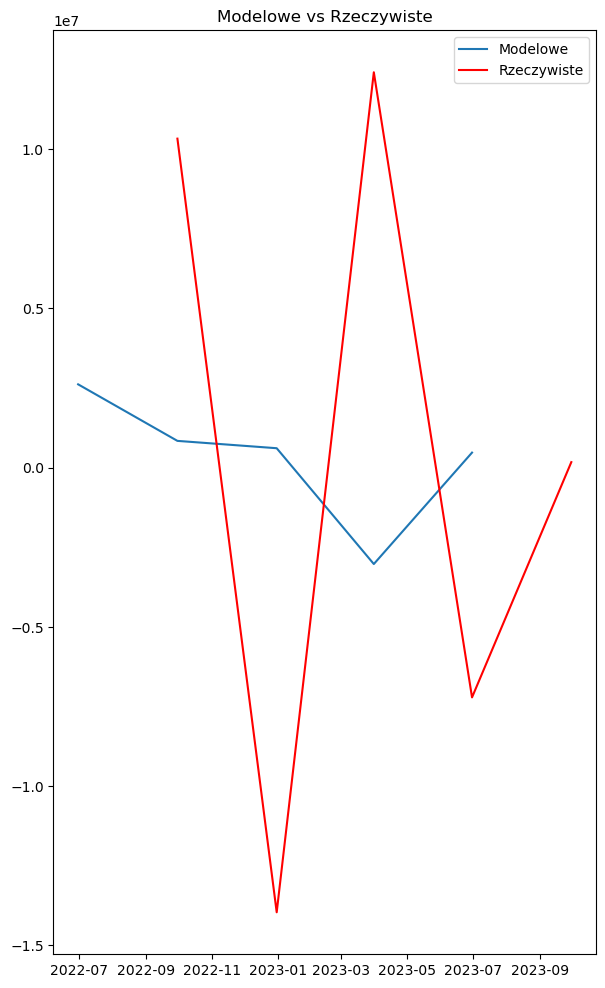

Błąd średniokwadratowy (MSE):  87090994852034.75
MAPE:  100.98 %
                                     SARIMAX Results                                      
Dep. Variable:                Przychody finansowe   No. Observations:                   36
Model:             SARIMAX(3, 0, 3)x(1, 0, [], 4)   Log Likelihood                -502.569
Date:                            Mon, 27 May 2024   AIC                           1021.138
Time:                                    20:32:02   BIC                           1033.806
Sample:                                06-30-2013   HQIC                          1025.560
                                     - 03-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2164     11.453      0.019      

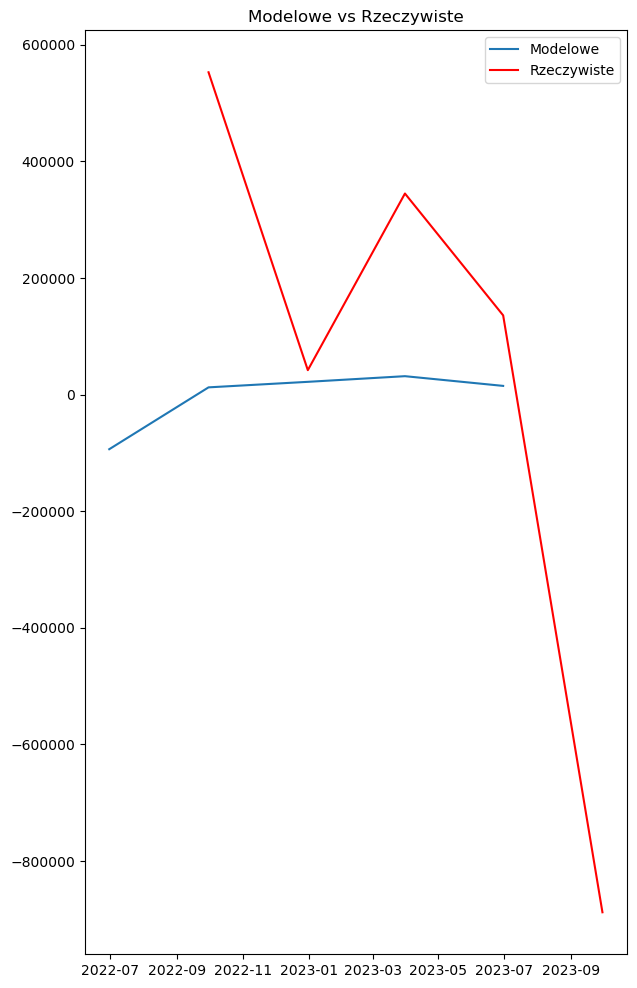

Błąd średniokwadratowy (MSE):  269928375611.69366
MAPE:  91.85 %
                                     SARIMAX Results                                      
Dep. Variable:                  Wydatki finansowe   No. Observations:                   36
Model:             SARIMAX(3, 0, 3)x(1, 0, [], 4)   Log Likelihood                -497.616
Date:                            Mon, 27 May 2024   AIC                           1011.232
Time:                                    20:32:02   BIC                           1023.900
Sample:                                06-30-2013   HQIC                          1015.654
                                     - 03-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7257      0.783     -0.927      

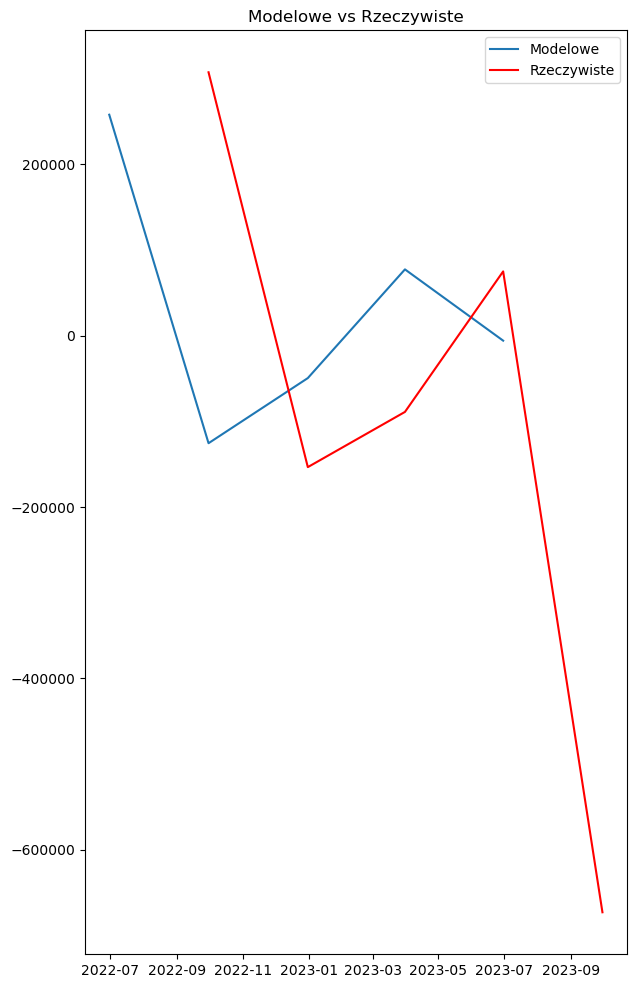

Błąd średniokwadratowy (MSE):  89985095196.264
MAPE:  36.19 %
                                     SARIMAX Results                                      
Dep. Variable:                        Zysk brutto   No. Observations:                   36
Model:             SARIMAX(3, 0, 3)x(1, 0, [], 4)   Log Likelihood                -553.360
Date:                            Mon, 27 May 2024   AIC                           1122.720
Time:                                    20:32:03   BIC                           1135.388
Sample:                                06-30-2013   HQIC                          1127.141
                                     - 03-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1776      3.215     -0.055      0.9

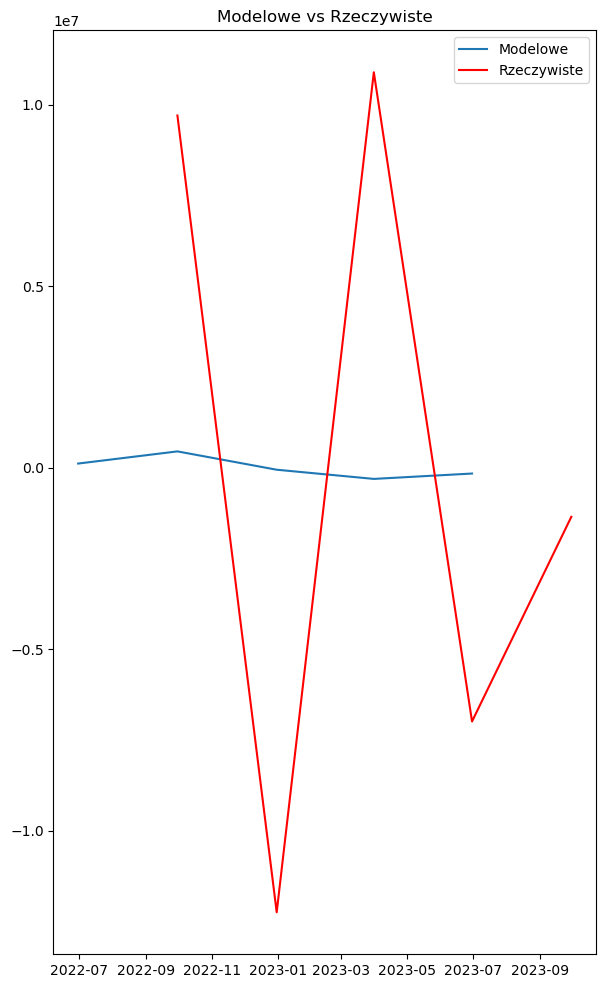

Błąd średniokwadratowy (MSE):  83851320236561.4
MAPE:  97.34 %
                                     SARIMAX Results                                      
Dep. Variable:                      Aktywa trwałe   No. Observations:                   36
Model:             SARIMAX(3, 0, 3)x(1, 0, [], 4)   Log Likelihood                -629.988
Date:                            Mon, 27 May 2024   AIC                           1275.977
Time:                                    20:32:04   BIC                           1288.645
Sample:                                06-30-2013   HQIC                          1280.398
                                     - 03-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0409      0.613     -0.067      0.

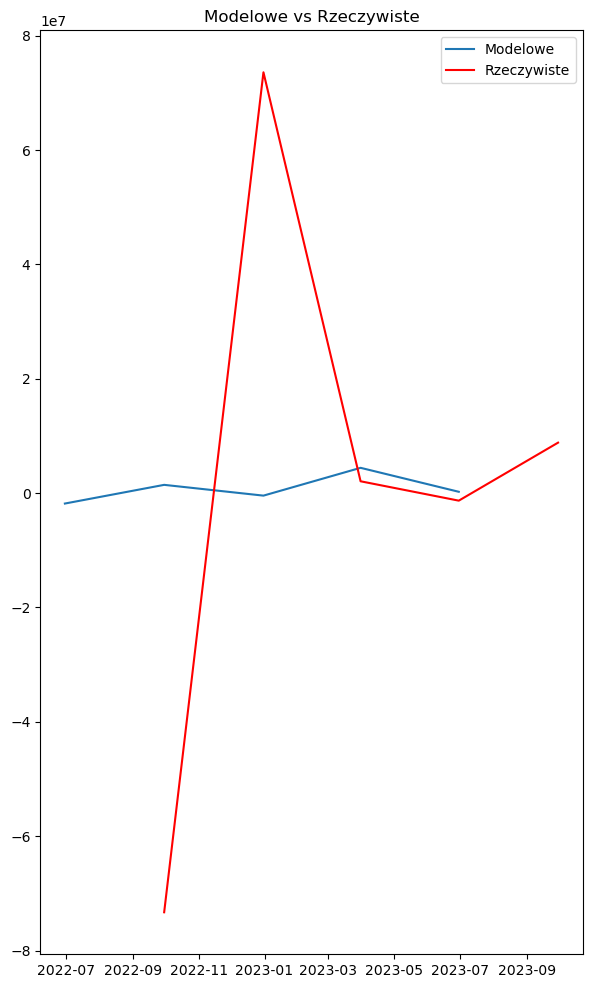

Błąd średniokwadratowy (MSE):  2086036787334312.0
MAPE:  169.7 %
                                     SARIMAX Results                                      
Dep. Variable:                    Aktywa obrotowe   No. Observations:                   36
Model:             SARIMAX(3, 0, 3)x(1, 0, [], 4)   Log Likelihood                -636.160
Date:                            Mon, 27 May 2024   AIC                           1288.320
Time:                                    20:32:04   BIC                           1300.988
Sample:                                06-30-2013   HQIC                          1292.741
                                     - 03-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8657      0.615      1.407      

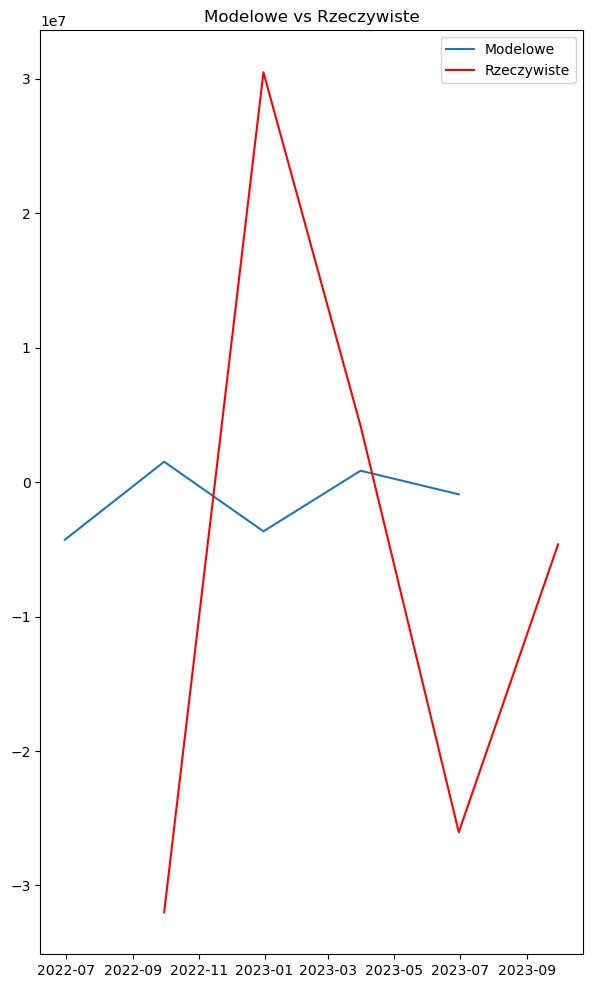

Błąd średniokwadratowy (MSE):  481212287788960.0
MAPE:  110.54 %
                                     SARIMAX Results                                      
Dep. Variable:              Kapitał własny ogółem   No. Observations:                   36
Model:             SARIMAX(3, 0, 3)x(1, 0, [], 4)   Log Likelihood                -627.182
Date:                            Mon, 27 May 2024   AIC                           1270.365
Time:                                    20:32:05   BIC                           1283.033
Sample:                                06-30-2013   HQIC                          1274.786
                                     - 03-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0490      0.622     -0.079      

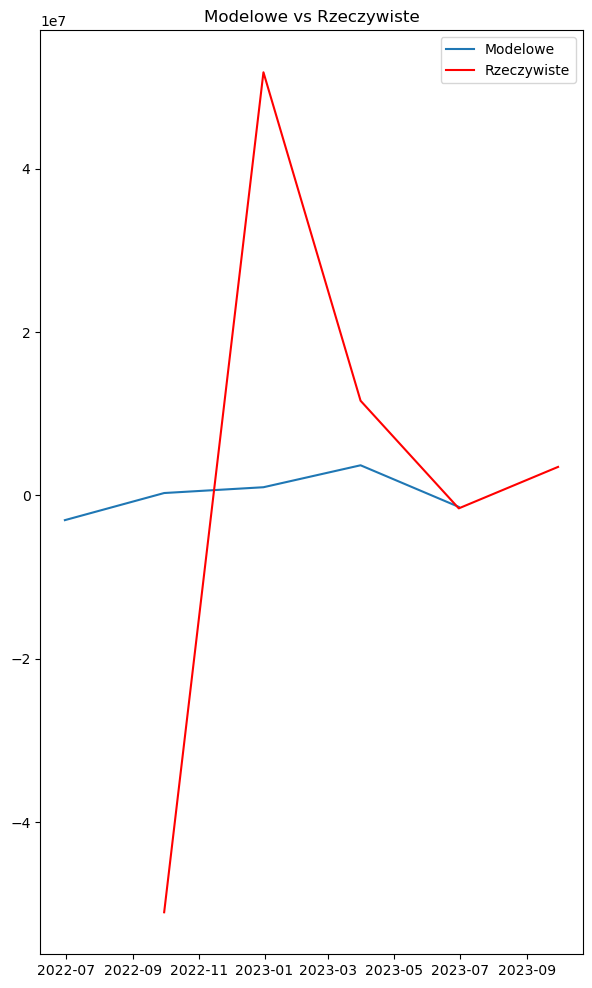

Błąd średniokwadratowy (MSE):  1024005130535214.0
MAPE:  151.85 %
                                       SARIMAX Results                                       
Dep. Variable:     Kapitał własny spółki dominującej   No. Observations:                   36
Model:                SARIMAX(3, 0, 3)x(1, 0, [], 4)   Log Likelihood                -626.456
Date:                               Mon, 27 May 2024   AIC                           1268.912
Time:                                       20:32:06   BIC                           1281.580
Sample:                                   06-30-2013   HQIC                          1273.333
                                        - 03-31-2022                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0468   

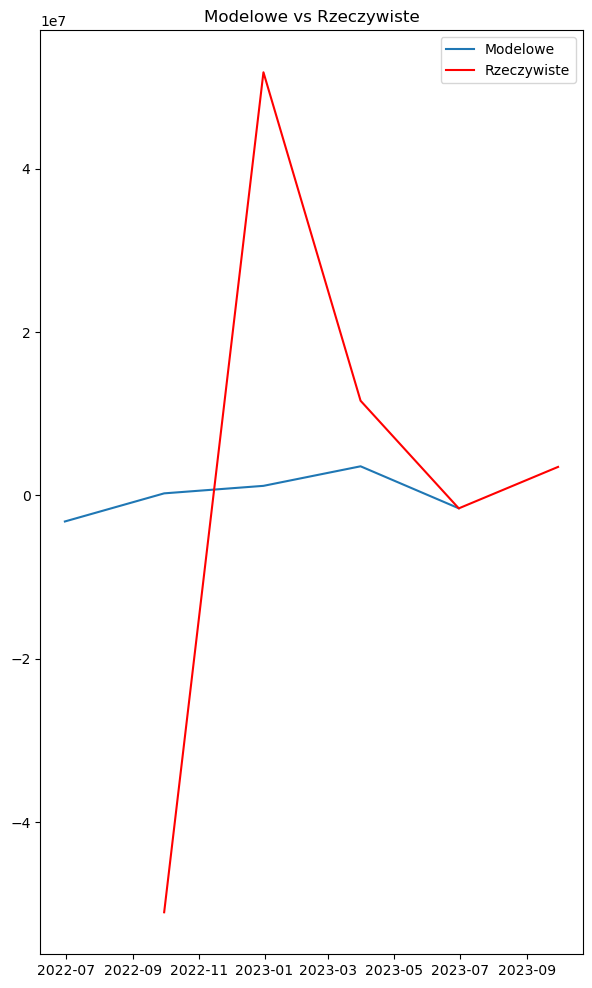

Błąd średniokwadratowy (MSE):  1021074453824858.6
MAPE:  150.93 %
                                     SARIMAX Results                                      
Dep. Variable:        Zobowiązania długoterminowe   No. Observations:                   36
Model:             SARIMAX(3, 0, 3)x(1, 0, [], 4)   Log Likelihood                -590.335
Date:                            Mon, 27 May 2024   AIC                           1196.670
Time:                                    20:32:06   BIC                           1209.338
Sample:                                06-30-2013   HQIC                          1201.092
                                     - 03-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1336      0.647     -0.207     

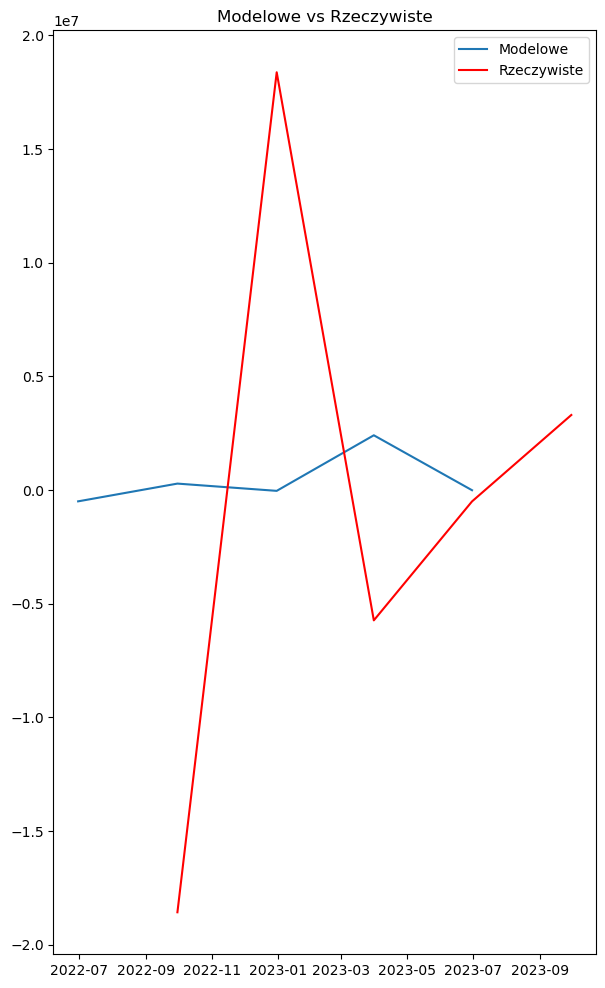

Błąd średniokwadratowy (MSE):  141193706803840.7
MAPE:  194.53 %
                                       SARIMAX Results                                       
Dep. Variable:     Długoterminowe kredyty i pożyczki   No. Observations:                   36
Model:                SARIMAX(3, 0, 3)x(1, 0, [], 4)   Log Likelihood                -583.700
Date:                               Mon, 27 May 2024   AIC                           1183.400
Time:                                       20:32:07   BIC                           1196.068
Sample:                                   06-30-2013   HQIC                          1187.822
                                        - 03-31-2022                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0965    

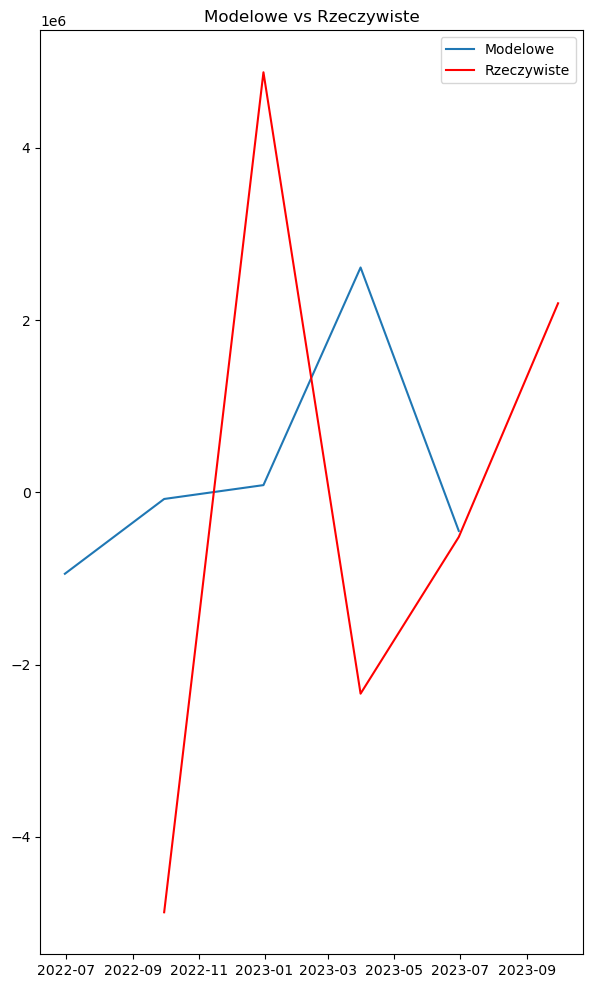

Błąd średniokwadratowy (MSE):  12523843677405.723
MAPE:  201.81 %
                                     SARIMAX Results                                      
Dep. Variable:       Zobowiązania krótkoterminowe   No. Observations:                   36
Model:             SARIMAX(3, 0, 3)x(1, 0, [], 4)   Log Likelihood                -618.027
Date:                            Mon, 27 May 2024   AIC                           1252.055
Time:                                    20:32:08   BIC                           1264.723
Sample:                                06-30-2013   HQIC                          1256.476
                                     - 03-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6100      0.802     -0.760     

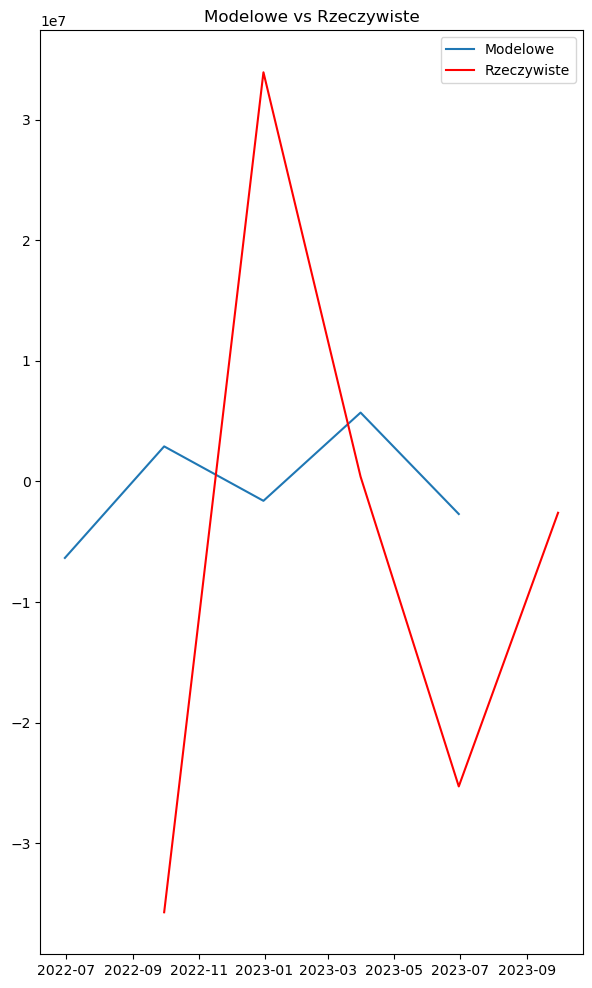

Błąd średniokwadratowy (MSE):  557818602341455.5
MAPE:  161.47 %
                                     SARIMAX Results                                      
Dep. Variable:           Pożyczki krótkoterminowe   No. Observations:                   36
Model:             SARIMAX(3, 0, 3)x(1, 0, [], 4)   Log Likelihood                -550.713
Date:                            Mon, 27 May 2024   AIC                           1117.425
Time:                                    20:32:08   BIC                           1130.094
Sample:                                06-30-2013   HQIC                          1121.847
                                     - 03-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6172      1.259     -0.490      

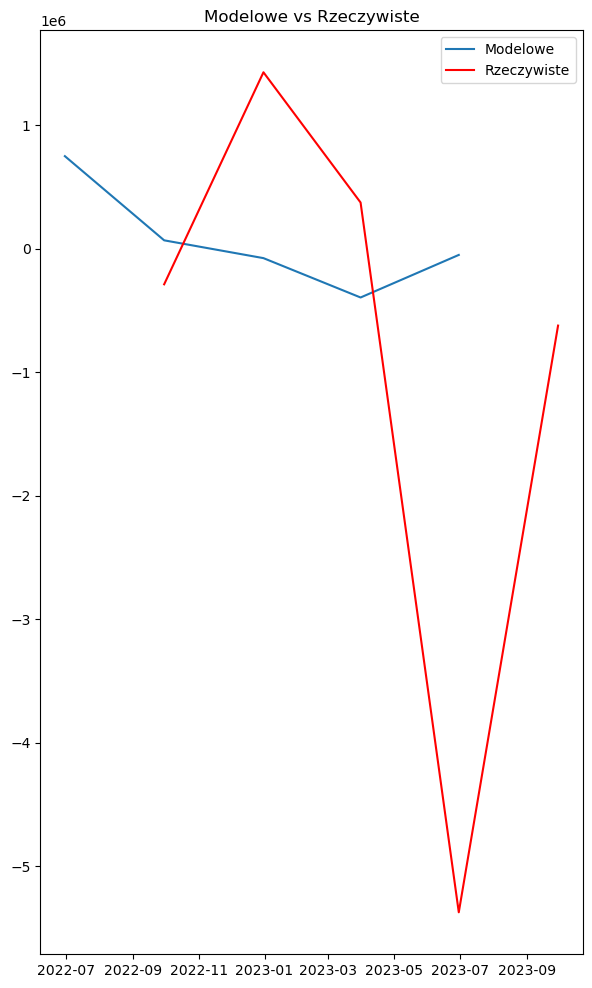

Błąd średniokwadratowy (MSE):  5641838954392.502
MAPE:  151.85 %


In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

for i in list(train.columns):
    train_t = train[f"{i}"]
    model = SARIMAX(train_t, order=(3, 0, 3), seasonal_order=(1, 0, 0, 4))
    results = model.fit()
    
    # Wyświetlenie podsumowania modelu
    print(results.summary())
    
    forecast_results = results.forecast(steps=5)
    test_t = test[:5]
    
    fig = plt.figure(figsize=(7,12))
    plt.plot(forecast_results, label="Modelowe")
    plt.plot(test_t[f"{i}"], c='r', label="Rzeczywiste")
    plt.title("Modelowe vs Rzeczywiste")
    plt.legend()
    plt.show()
    
    from sklearn.metrics import mean_squared_error
    
    mse = mean_squared_error(test_t[f"{i}"], forecast_results)
    print("Błąd średniokwadratowy (MSE): ", mse)
    
    
    import numpy as np
    
    def mean_absolute_percentage_error(y_true, y_pred):
        """
        Oblicza średnią bezwzględną błędu procentowego (MAPE).
    
        Parametry:
        y_true : array-like
            Rzeczywiste wartości.
        y_pred : array-like
            Prognozowane wartości.
    
        Zwraca:
        mape : float
            Wartość MAPE.
        """
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    
    
    
    mape = mean_absolute_percentage_error(test_t[f"{i}"], forecast_results)
    print("MAPE: ", round(mape,2),"%")

In [46]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_t["Przychody ogółem"], forecast_results)
print("Błąd średniokwadratowy (MSE): ", mse)


import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    """
    Oblicza średnią bezwzględną błędu procentowego (MAPE).

    Parametry:
    y_true : array-like
        Rzeczywiste wartości.
    y_pred : array-like
        Prognozowane wartości.

    Zwraca:
    mape : float
        Wartość MAPE.
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100




mape = mean_absolute_percentage_error(test_t["Przychody ogółem"], forecast_results)
print("MAPE: ", round(mape,2),"%")

Błąd średniokwadratowy (MSE):  37798603656738.82
MAPE:  inf %


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np



def RandomForest(i):
    # Extracting labels
    labels = np.array(random_forest_mol[f"{i}"])
    
    # Extracting features
    features = random_forest_mol.drop(f"{i}", axis=1)
    features_np = np.array(features)
    
    # Splitting data into training and testing sets
    train_l = labels[:60]
    test_l = labels[61:]
    
    train_f = features_np[:60]
    test_f = features_np[61:]
    
    # List of feature names
    f_list = list(features.columns)
    
    # Initialize RandomForestRegressor
    rf = RandomForestRegressor(n_estimators=1000, random_state=42)
    
    # Perform cross-validation
    scores = cross_val_score(rf, train_f, train_l, cv=5)
    
    # Fit the model
    rf.fit(train_f, train_l)
    
    # Print average accuracy obtained from cross-validation
    print("----------------------------------------")
    print(f'Random Forest for {i}')
    print("Cross-validation scores:", scores)
    print("Mean accuracy:", scores.mean())
    print("Standard deviation of accuracy:", scores.std())

vars = list(mol_diff.columns)

for i in vars:
    RandomForest(i)

KeyError: 'Przychody ogółem'

In [27]:
len(labels)*0.6

26.4

MAPE Przychody ogółem:  38.12 %


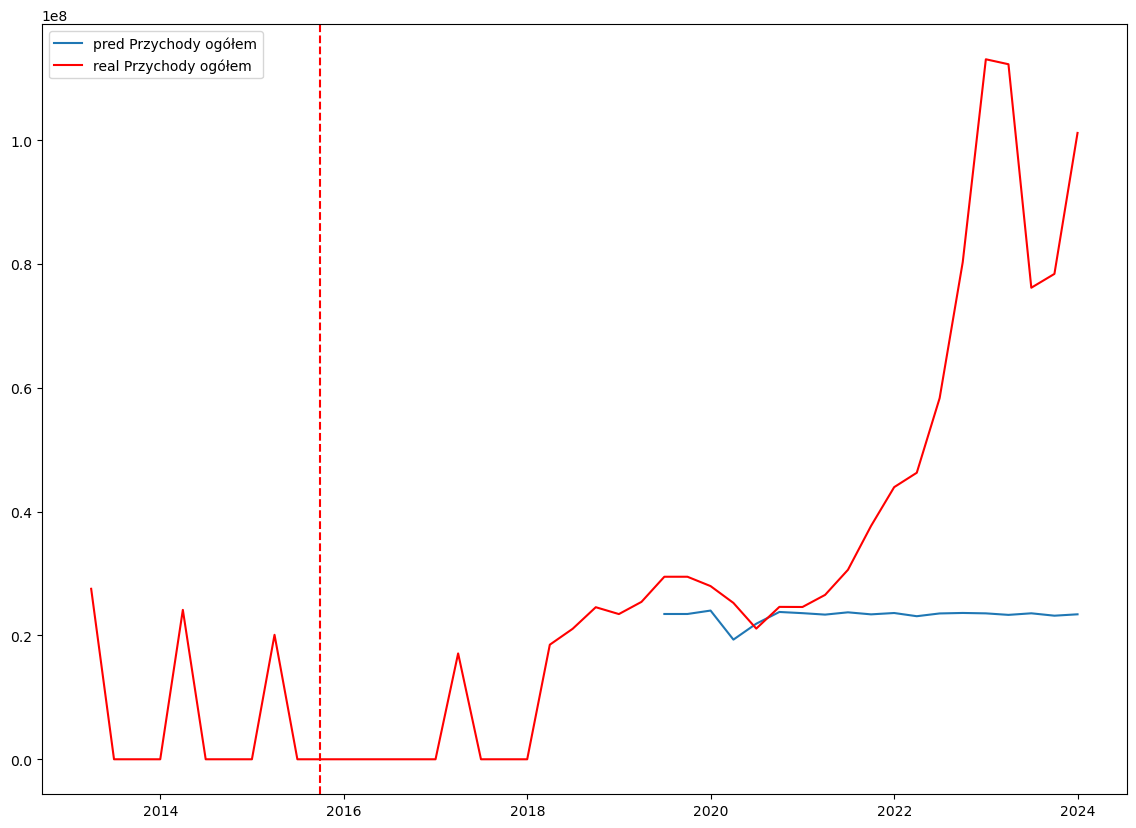

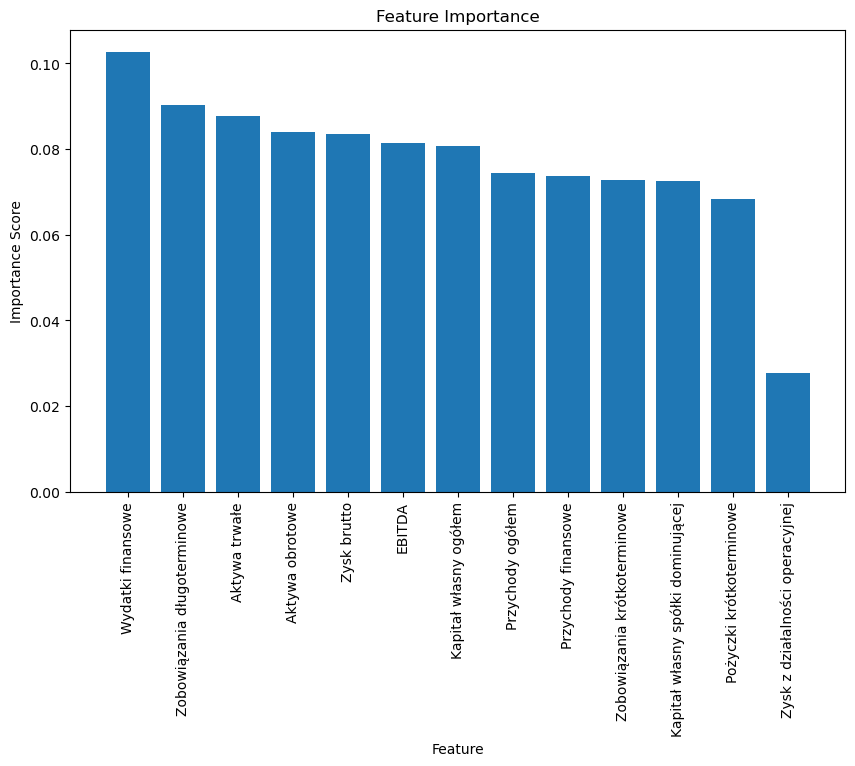

MAPE Zysk z działalności operacyjnej:  54.4 %


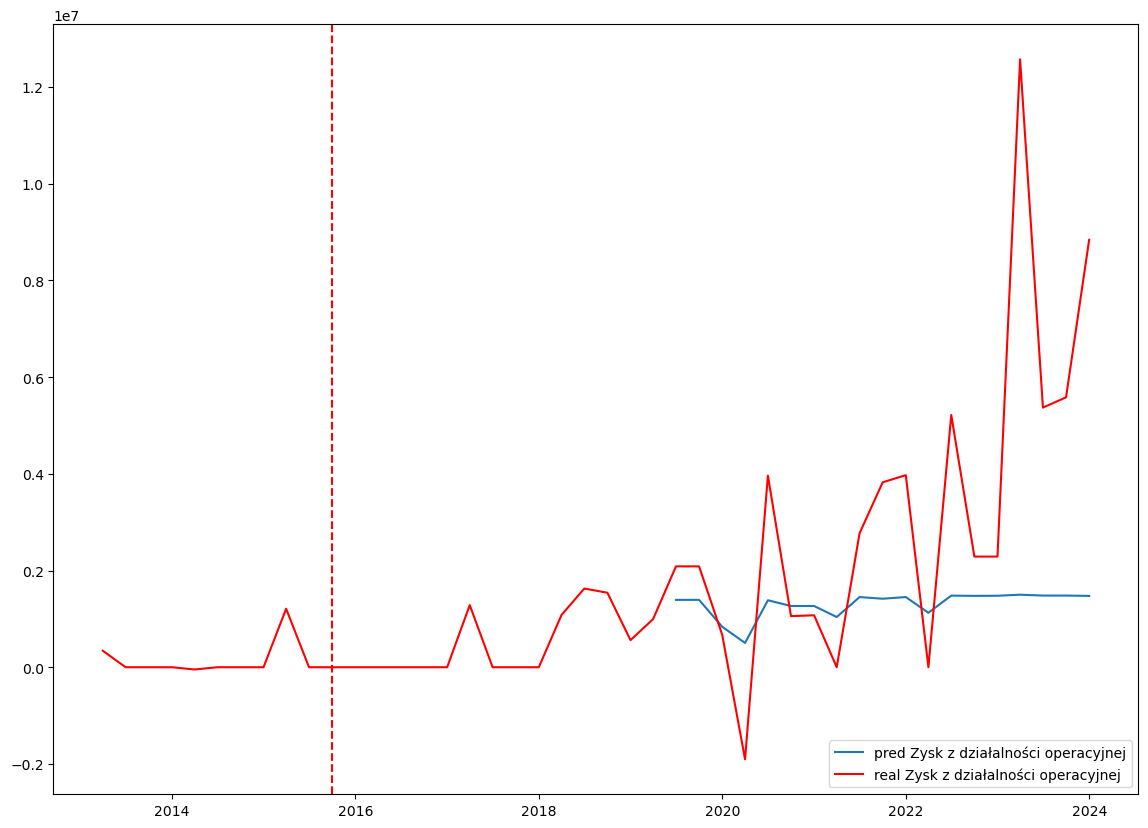

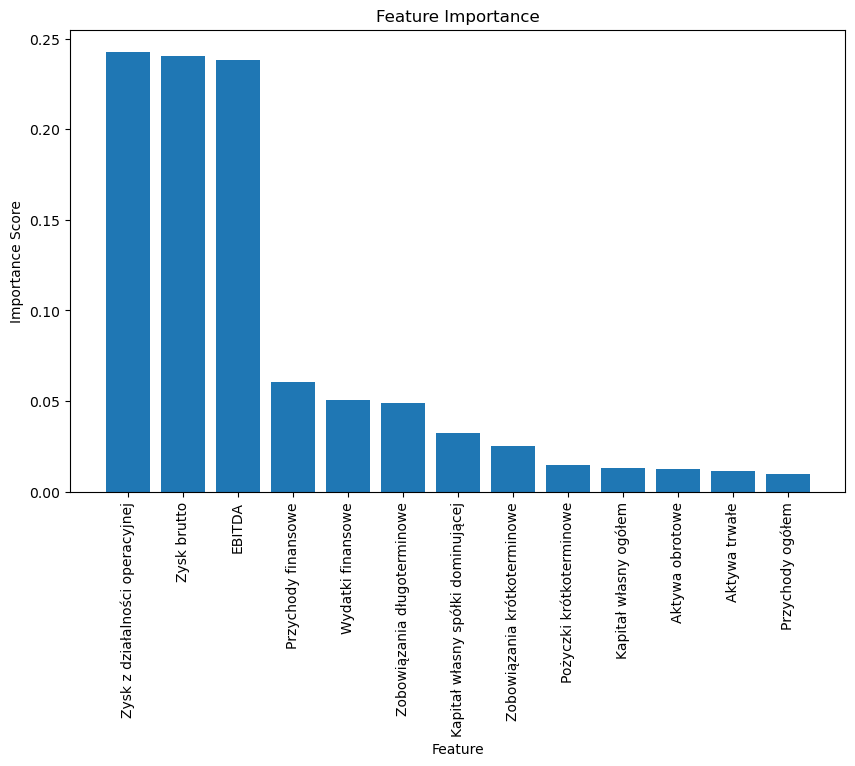

MAPE EBITDA:  62.25 %


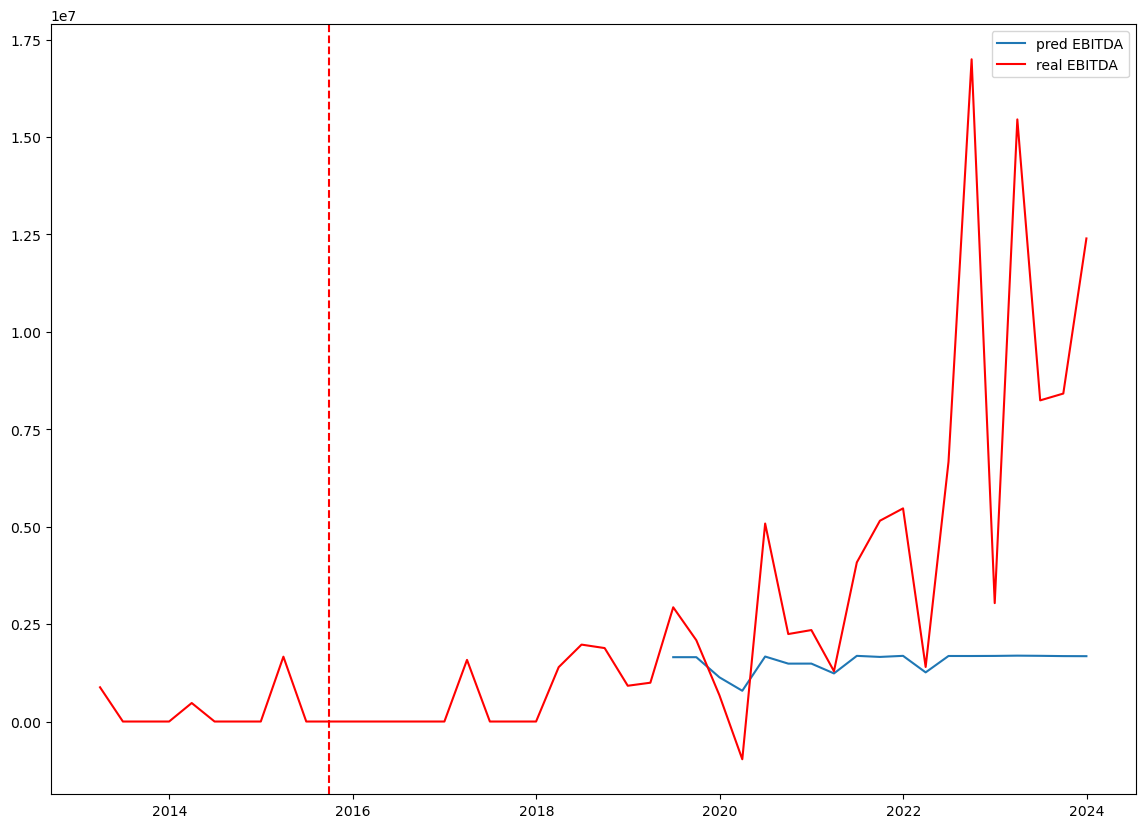

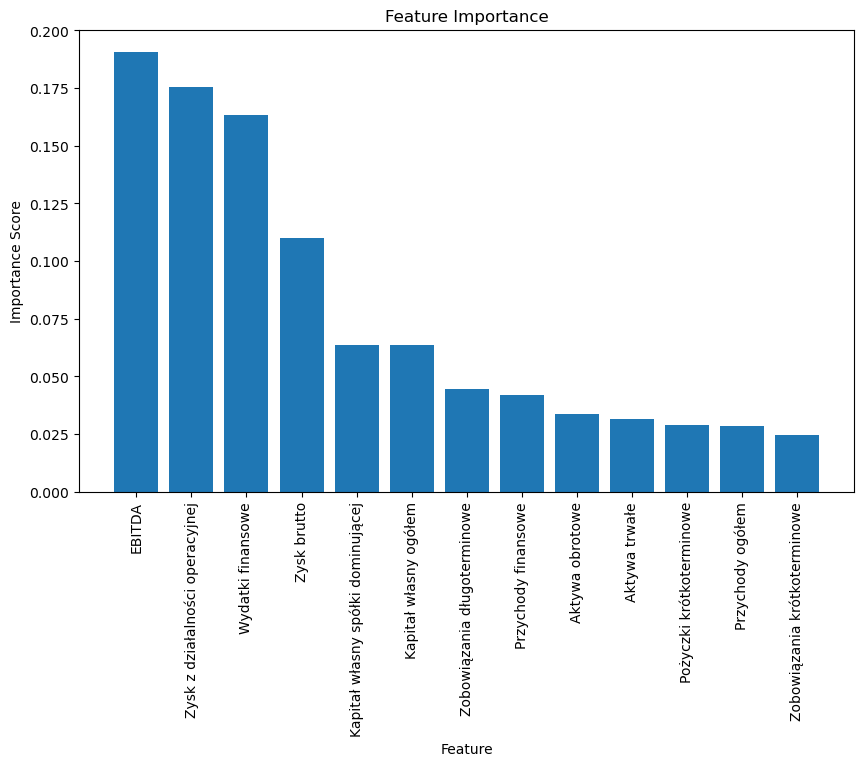

MAPE Przychody finansowe:  59.89 %


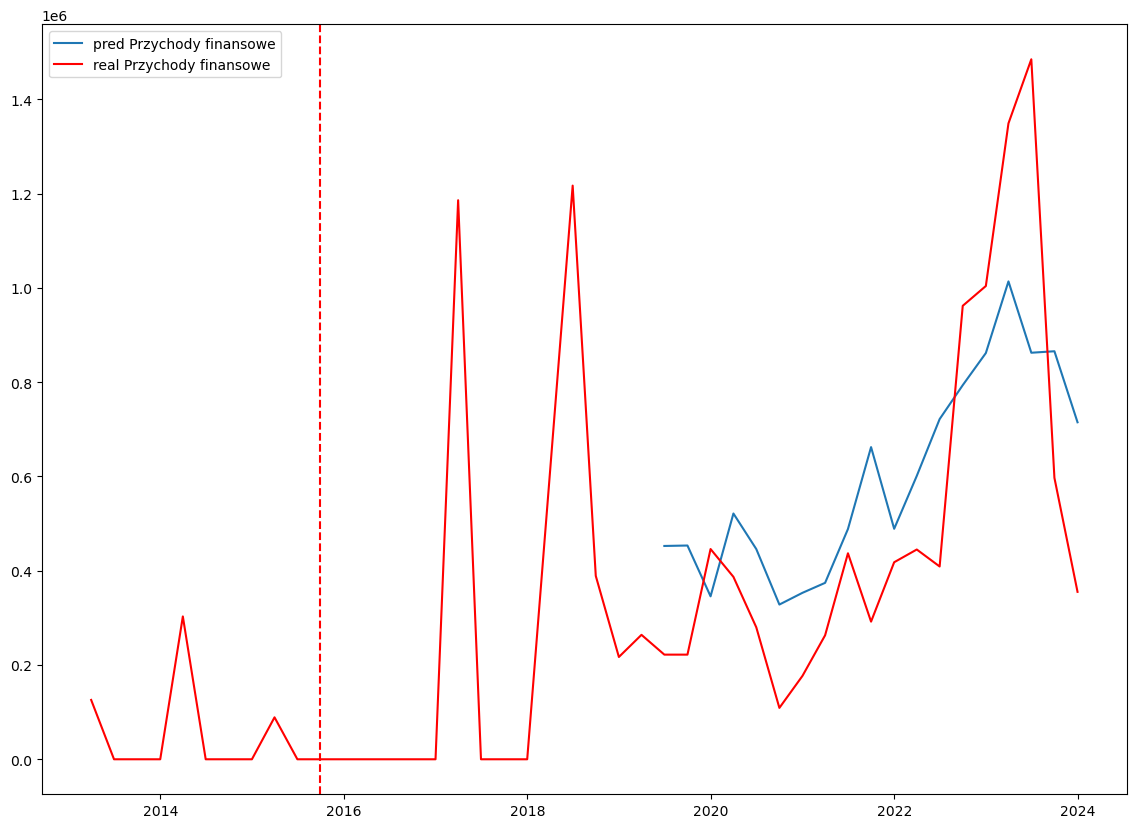

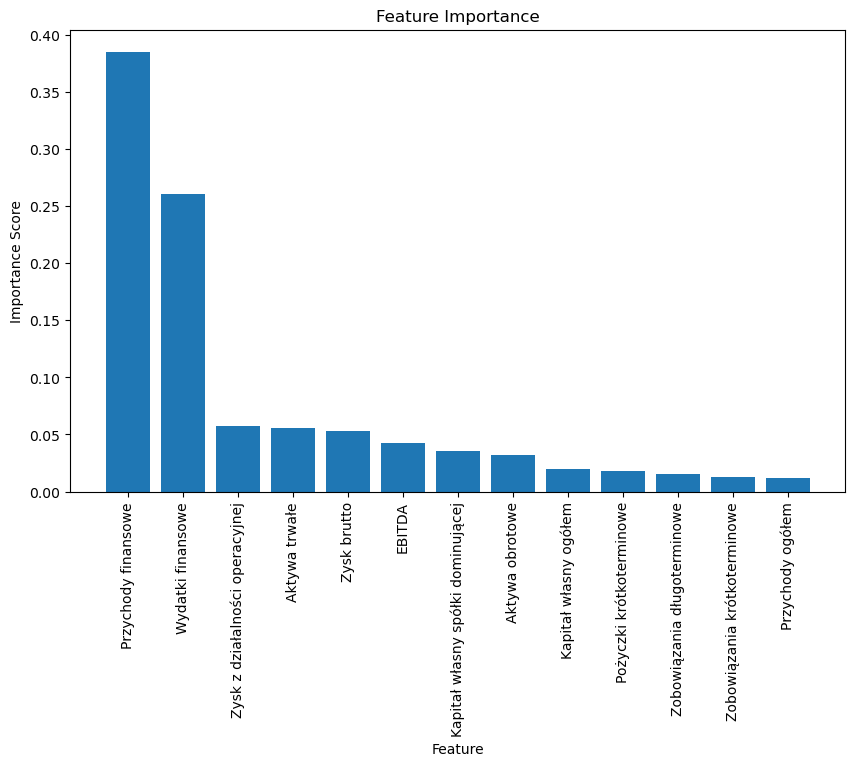

MAPE Wydatki finansowe:  28.55 %


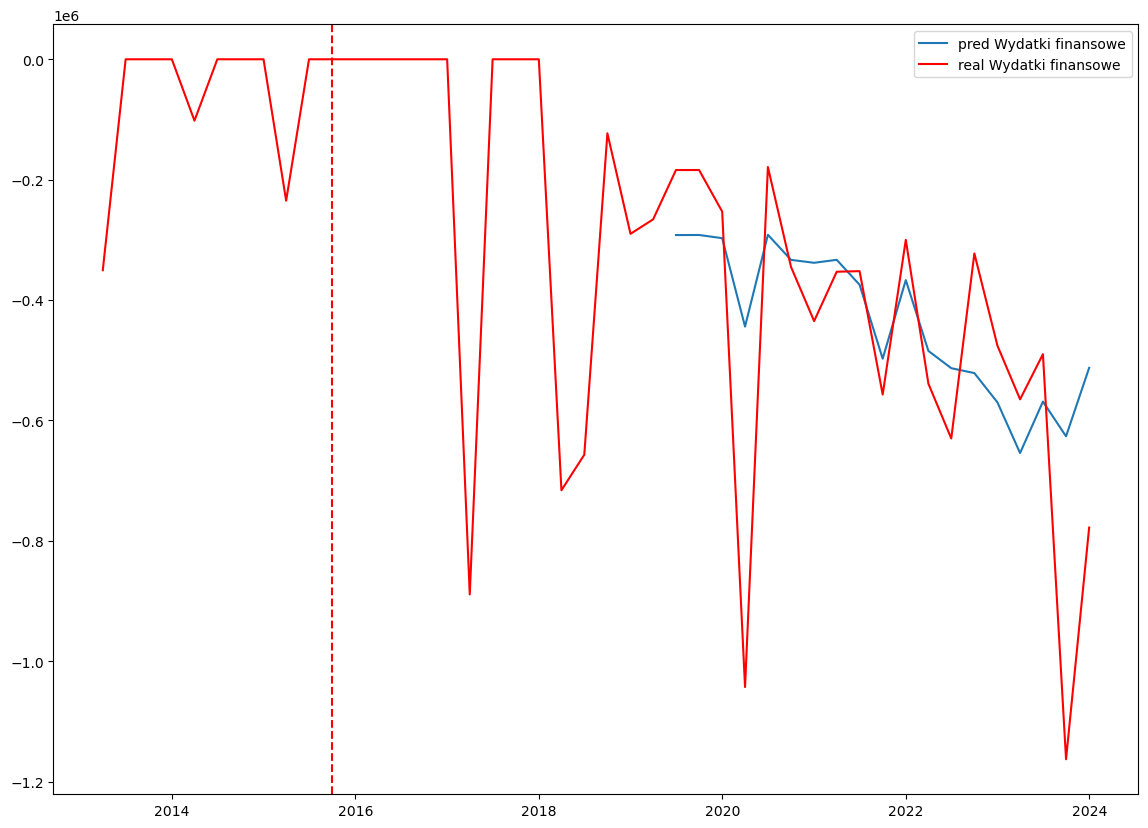

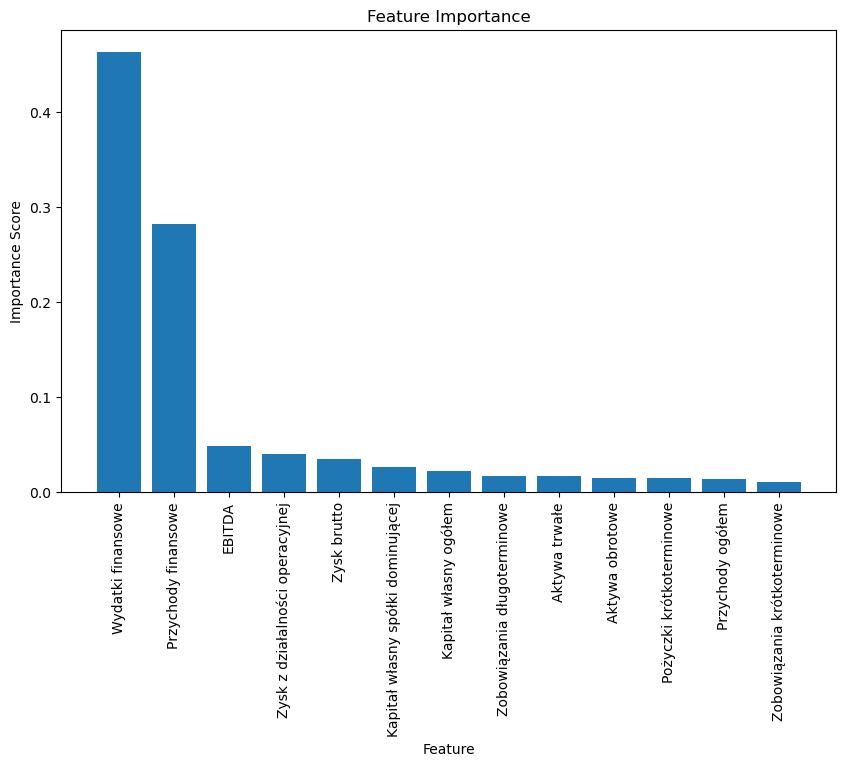

MAPE Zysk brutto:  55.85 %


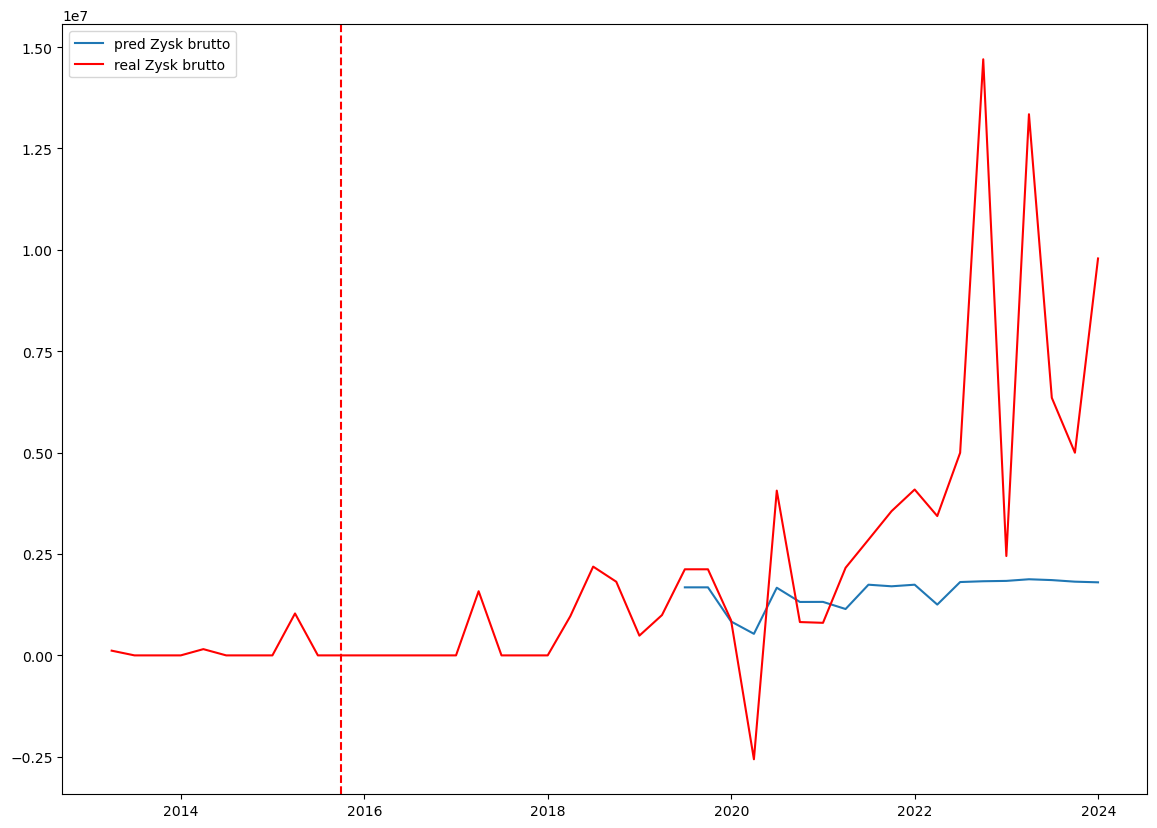

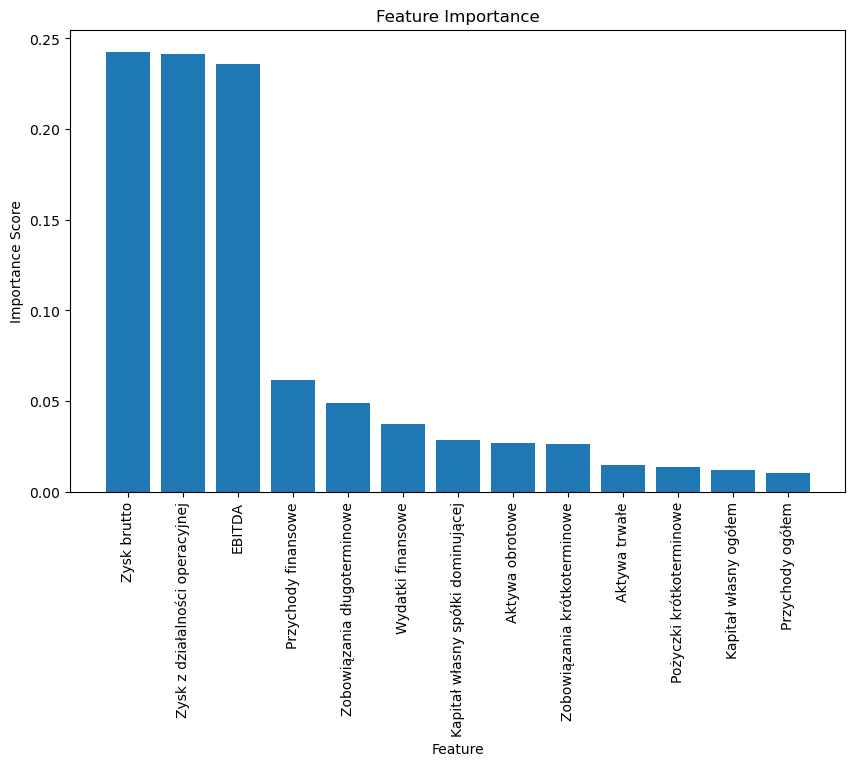

MAPE Aktywa trwałe:  55.15 %


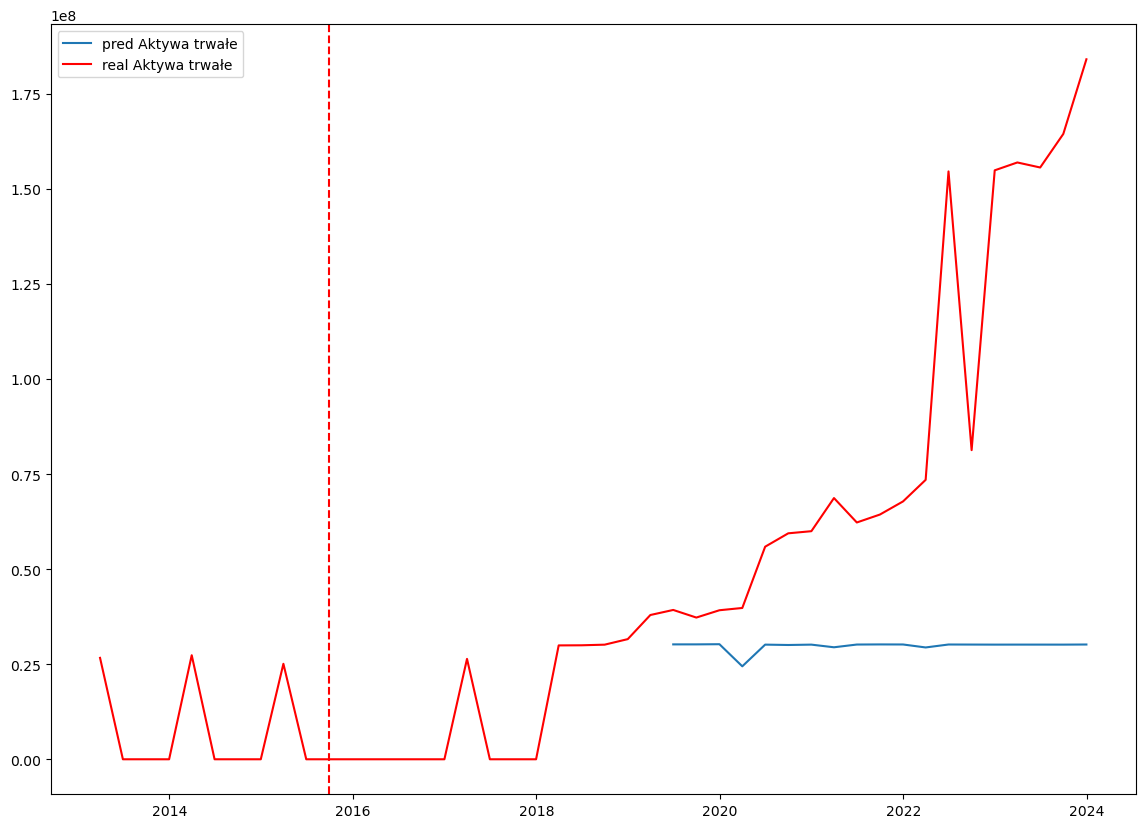

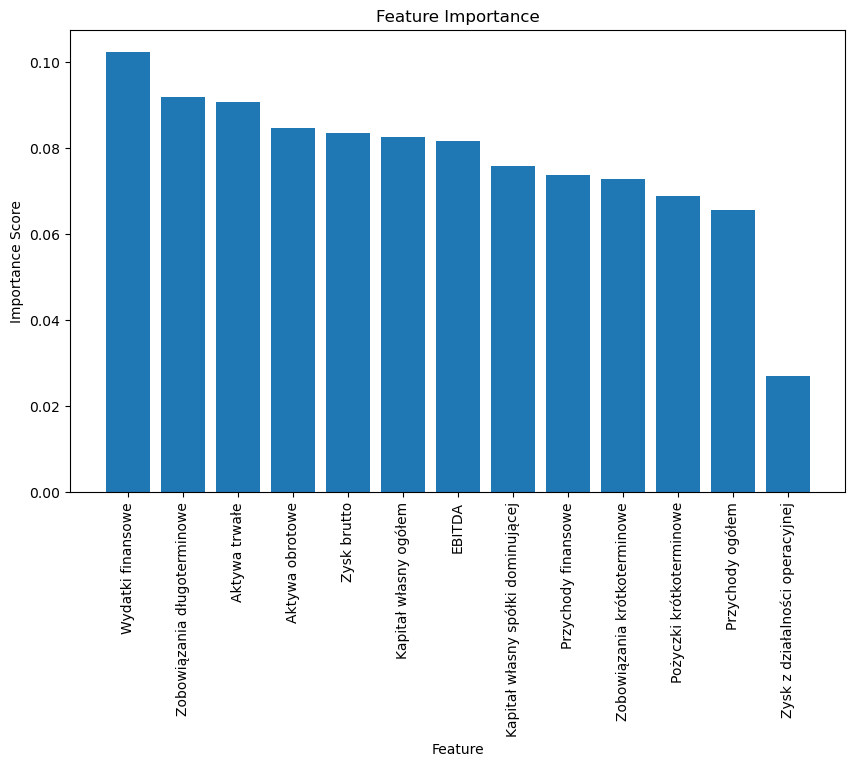

MAPE Aktywa obrotowe:  31.87 %


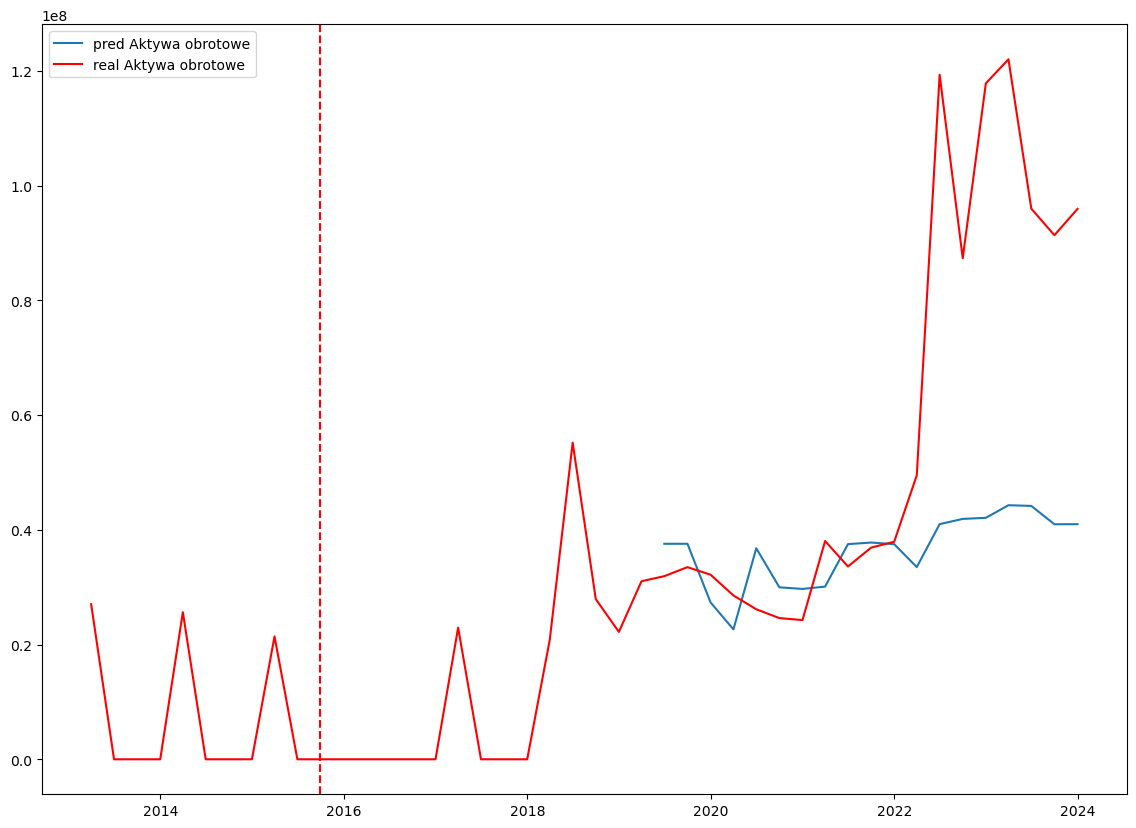

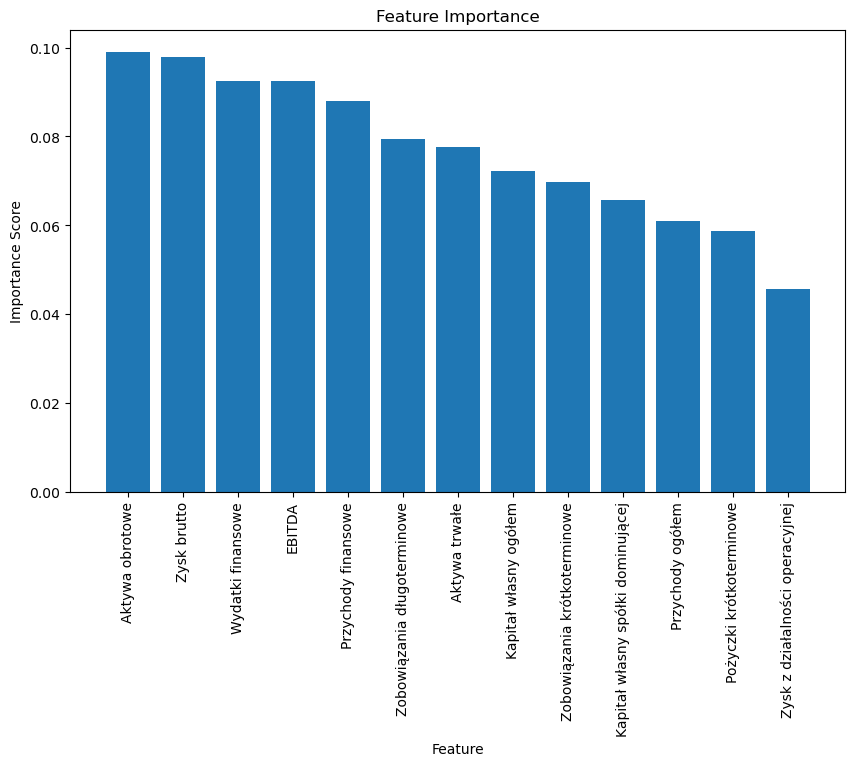

MAPE Kapitał własny ogółem:  49.36 %


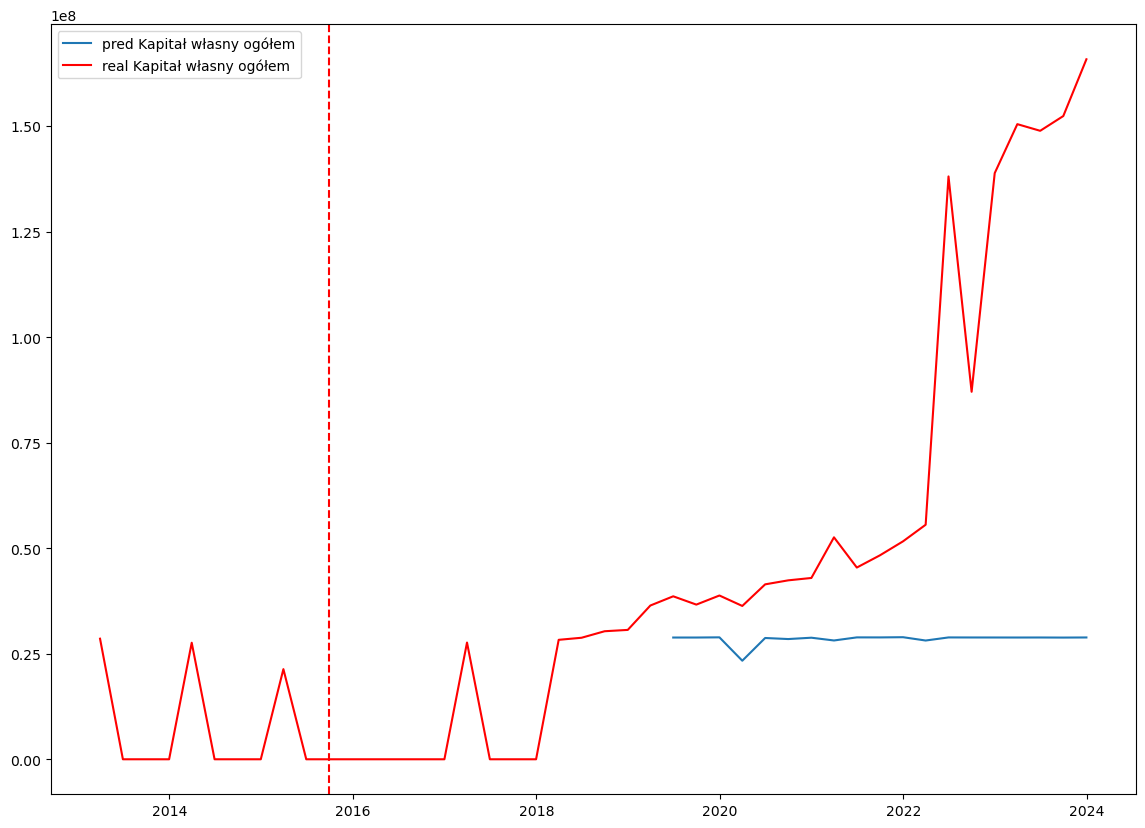

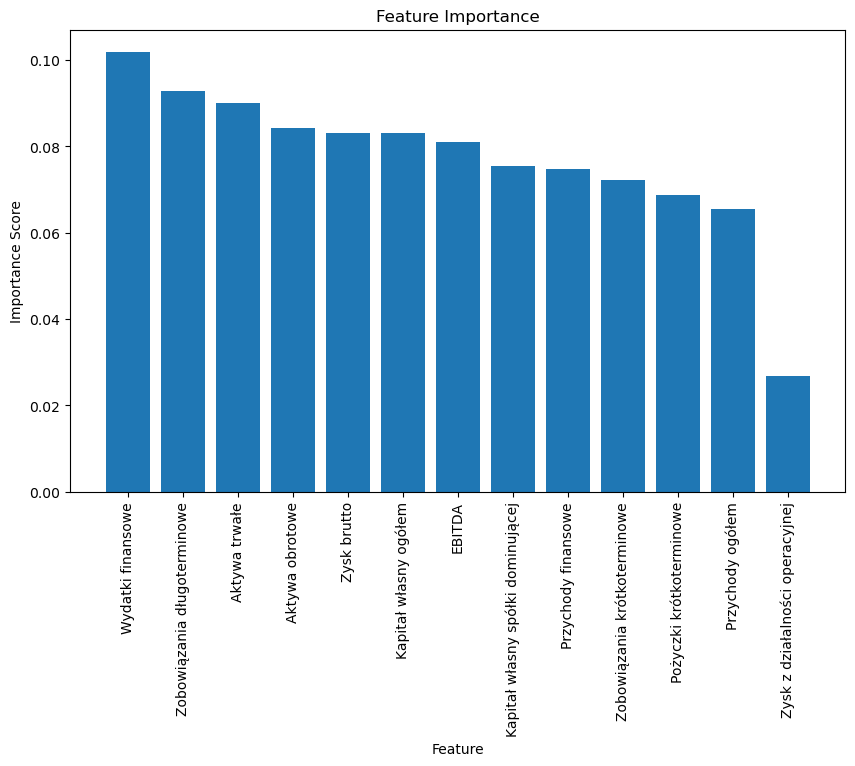

MAPE Kapitał własny spółki dominującej:  50.33 %


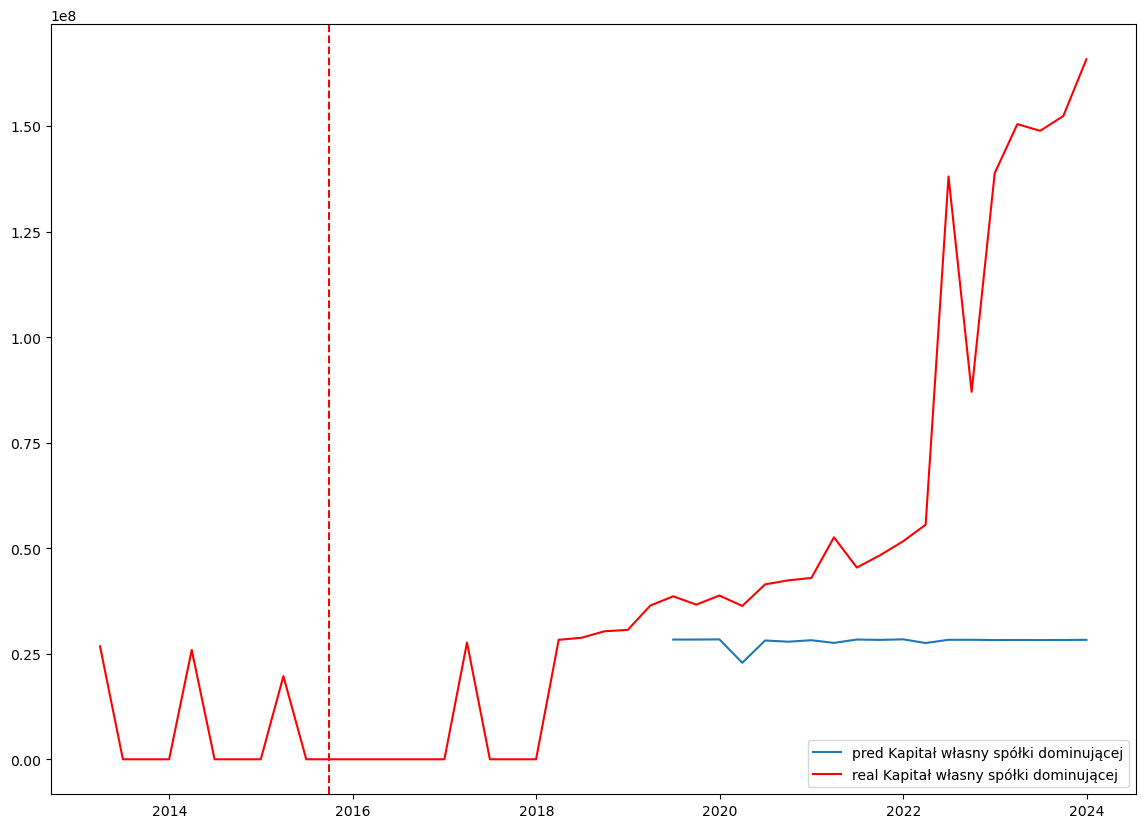

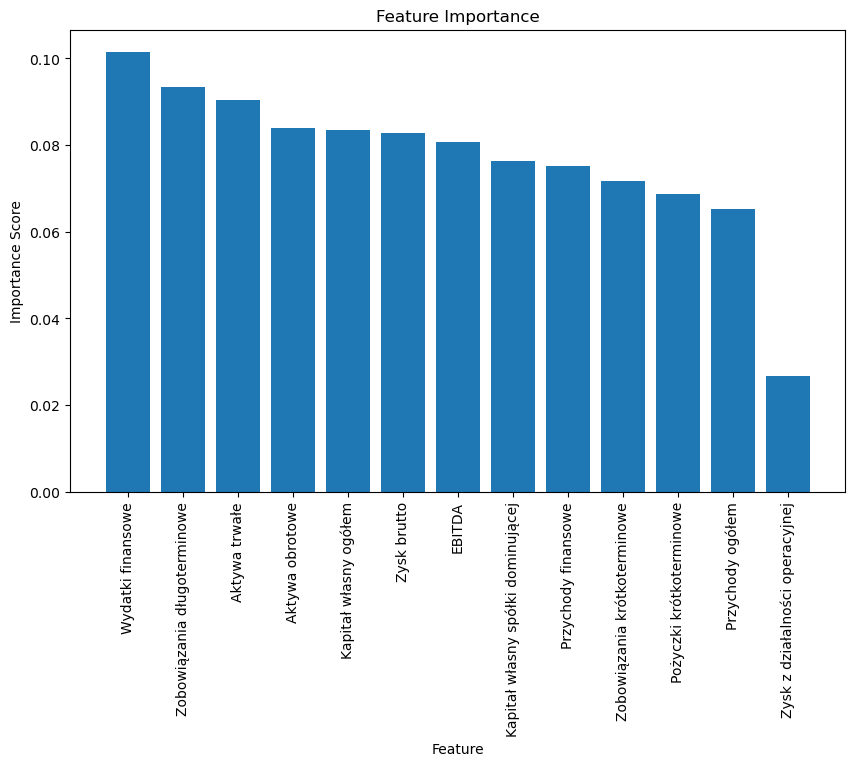

MAPE Zobowiązania długoterminowe:  55.78 %


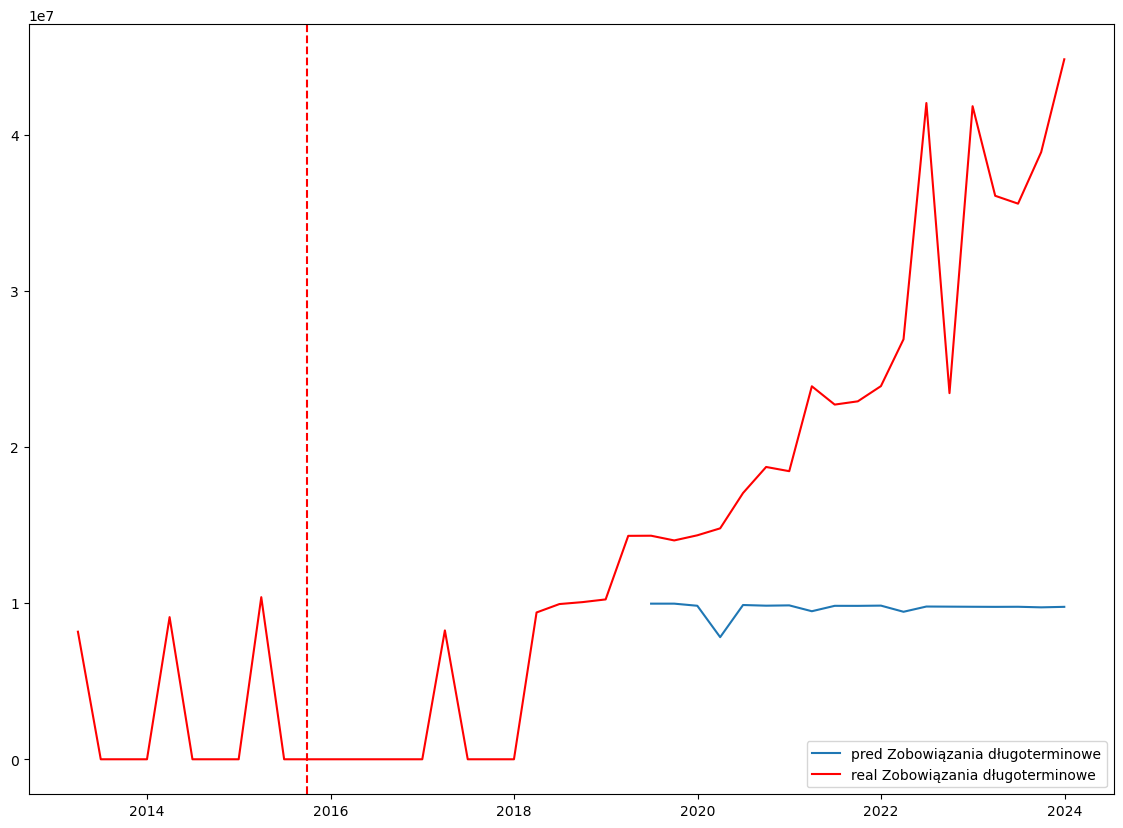

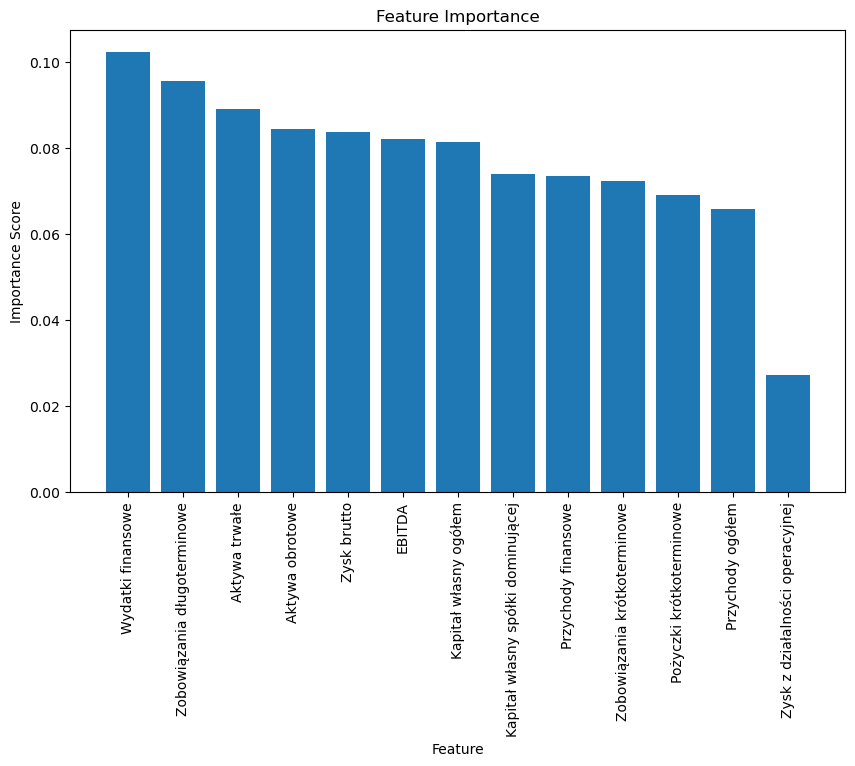

MAPE Zobowiązania krótkoterminowe:  49.16 %


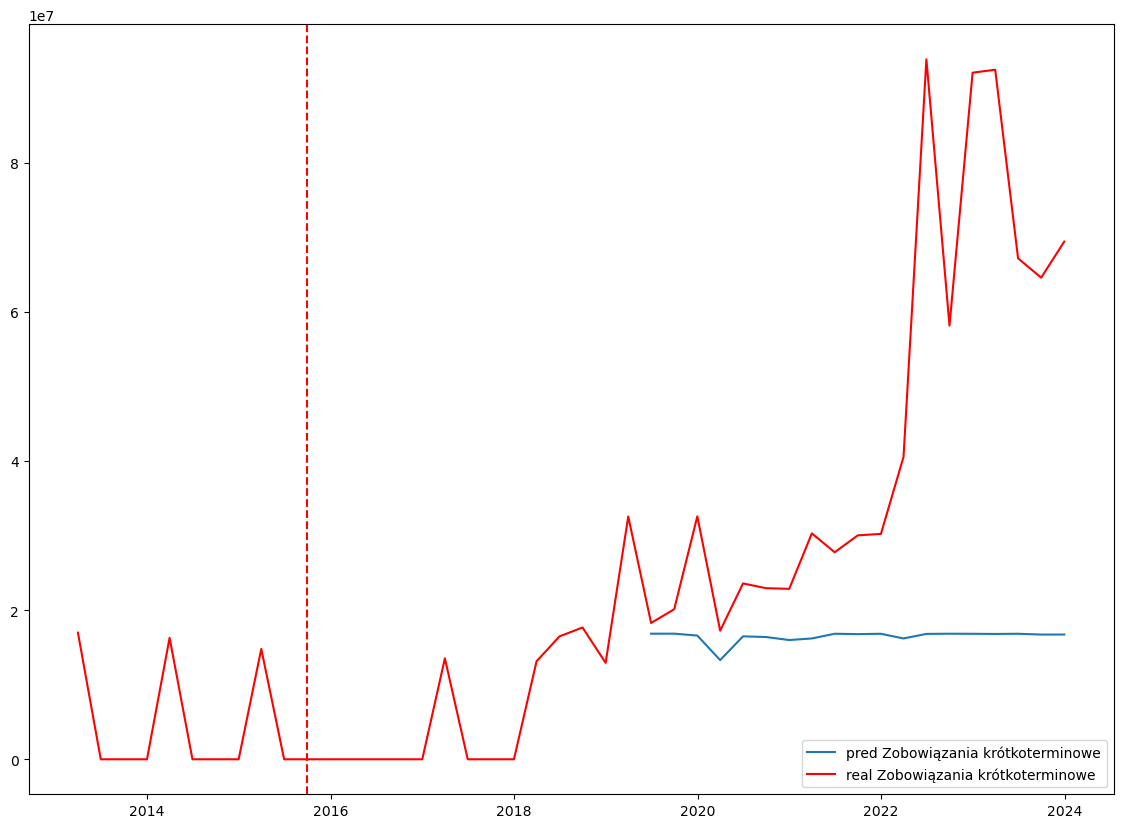

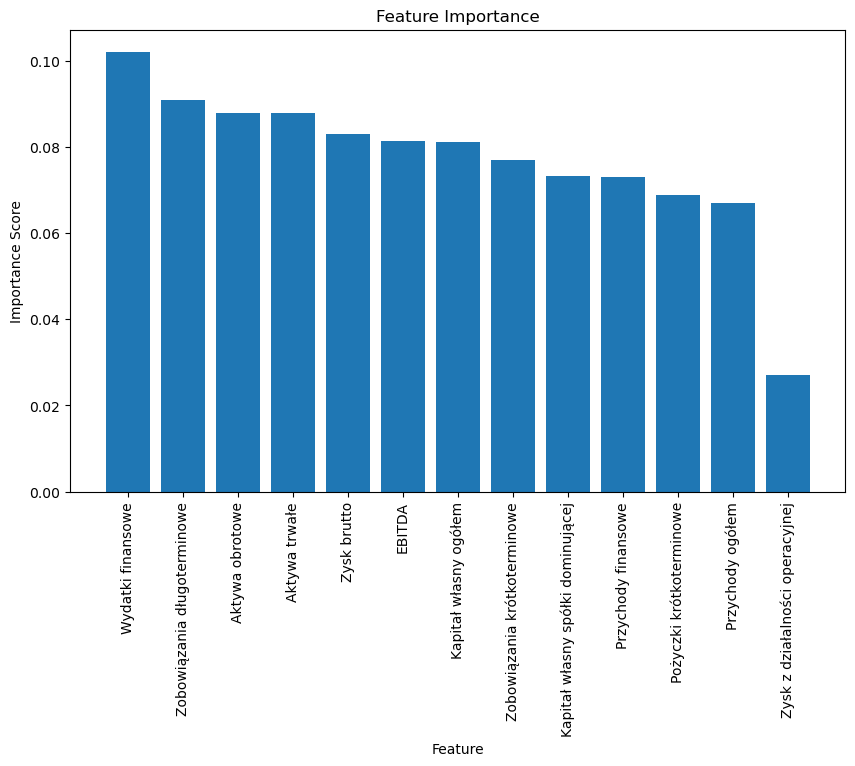

MAPE Pożyczki krótkoterminowe:  49.75 %


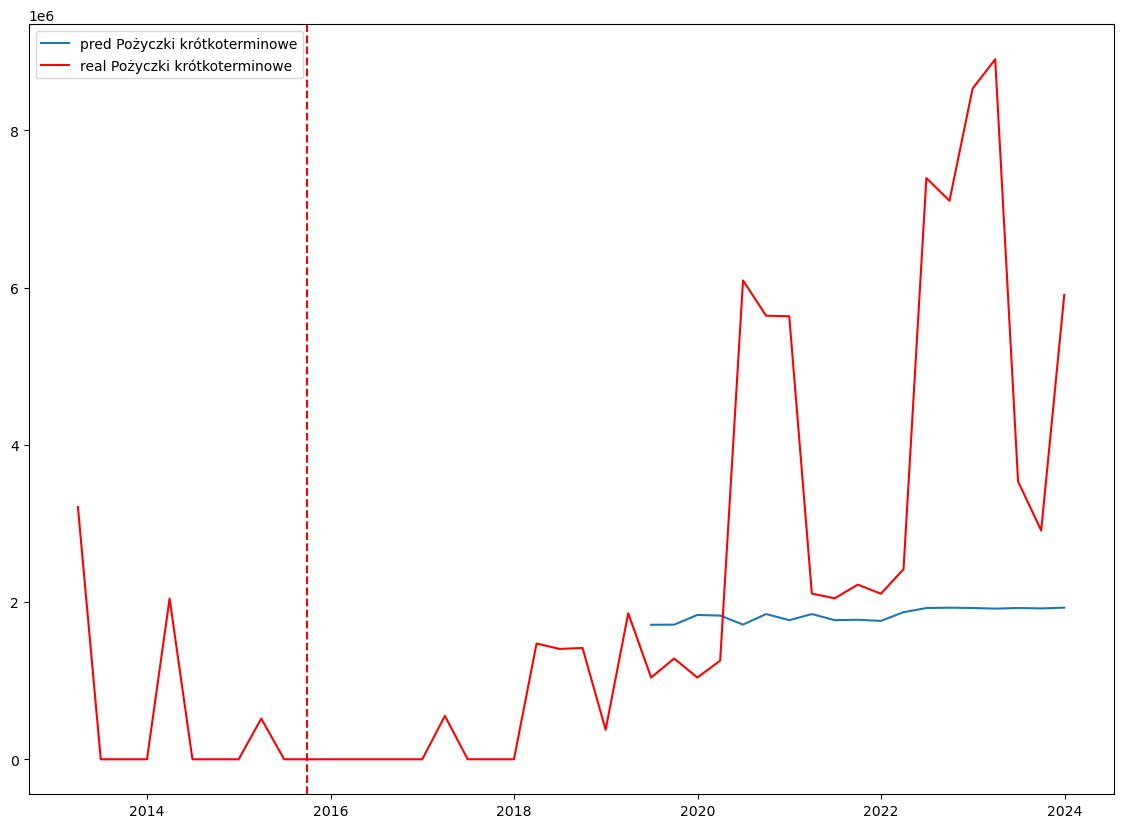

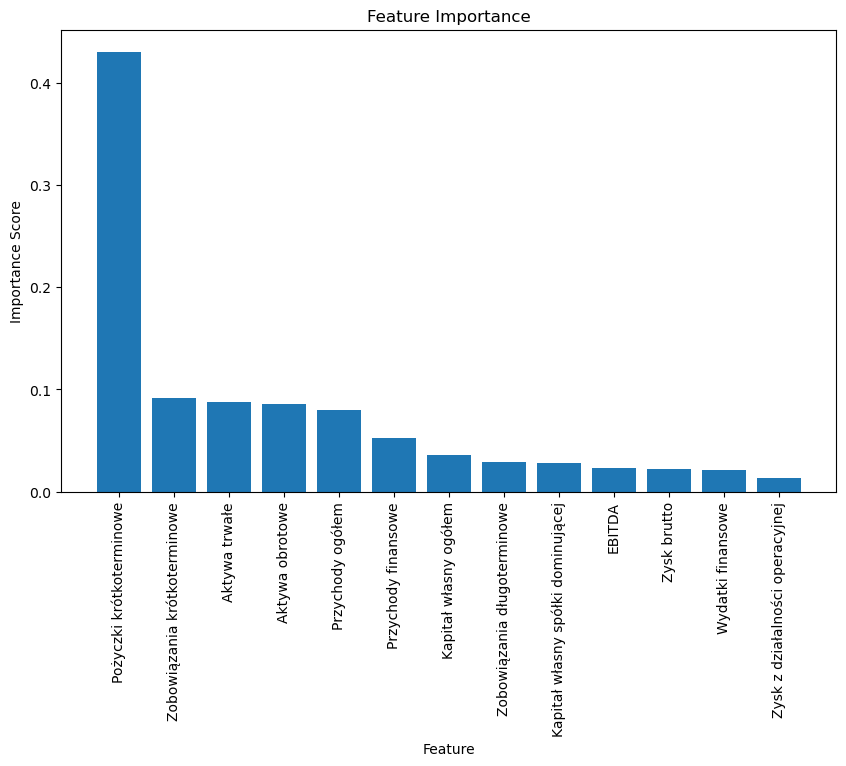

In [24]:
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime

def mean_absolute_percentage_error(y_true, y_pred):
    """
    Oblicza średnią bezwzględną błędu procentowego (MAPE).

    Parametry:
    y_true : array-like
        Rzeczywiste wartości.
    y_pred : array-like
        Prognozowane wartości.

    Zwraca:
    mape : float
        Wartość MAPE.
    """

    df = pd.DataFrame(data={"y_true":y_true[0],"y_pred":y_pred[0]}, index=y_true.index)
    df_filtered = df[df['y_true'] != 0]
    y_true, y_pred = np.array(df_filtered['y_true']), np.array(df_filtered['y_pred'])
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

rf = RandomForestRegressor(n_estimators=1000, random_state=42)
best = list(random_forest_mol.columns)

for i in best:
    labels = np.array(random_forest_mol[f"{i}"])
        
    # Extracting features
    features = random_forest_mol
    features_np = np.array(features)
    
    
                                
    train_l = labels[:24]
    test_l = labels[25:]
        
    train_f = features_np[:24]
    test_f = features_np[25:]
    
    rf.fit(train_f, train_l)
    predictions = rf.predict(test_f)
    predictions = pd.DataFrame(predictions, index=features[25:].index)
    test_l = pd.DataFrame(test_l, random_forest_mol[f"{i}"][25:].index)
    f_list = list(features.columns)
    fig = plt.figure(figsize=(14,10))
    plt.plot(predictions, label=f"pred {i}")
    plt.plot(random_forest_mol[f"{i}"], c='r', label=f"real {i}")

    target_date = '2015-09-30'
    target_x = datetime.strptime(target_date, '%Y-%m-%d')


    plt.axvline(x=target_x, color='r', linestyle='--')
    plt.legend()
    
    mape = mean_absolute_percentage_error(test_l[:-1], predictions[:-1])
    #print("test_l:", test_l[0])
    #print("predictions:", predictions[0])
    print(f"MAPE {i}: ", round(mape,2),"%")

    feature_importances = rf.feature_importances_

    import matplotlib.pyplot as plt
    
    # Sort feature importances in descending order
    sorted_indices = np.argsort(feature_importances)[::-1]
    sorted_feature_importances = feature_importances[sorted_indices]
    
    # Get the names of the features in the original order
    sorted_feature_names = np.array(f_list)[sorted_indices]
    
    # Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
    plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Importance Score')
    plt.title('Feature Importance')
    plt.show()

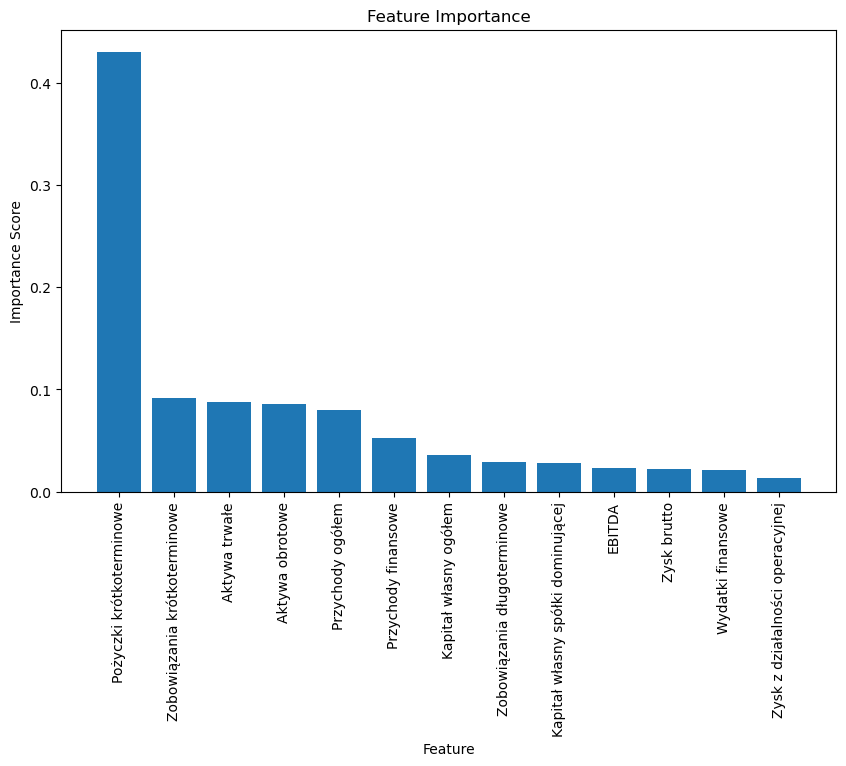

In [54]:
feature_importances = rf.feature_importances_

import matplotlib.pyplot as plt

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]

# Get the names of the features in the original order
sorted_feature_names = np.array(f_list)[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.show()

In [35]:
columns_to_drop = list(random_forest_mol.columns)
for i in columns_to_drop:
    if i.endswith("_"):
        random_forest_mol = random_forest_mol.drop(columns=i)

random_forest_mol = random_forest_mol.drop(columns=["Rok", "Q"])

KeyError: "['Rok', 'Q'] not found in axis"

In [36]:
random_forest_mol

Przychody ogółem  Zysk z działalności operacyjnej        EBITDA  \
Date                                                                          
2013-03-31        27543389.0                     3.408810e+05  8.787550e+05   
2013-06-30               0.0                     0.000000e+00  0.000000e+00   
2013-09-30               0.0                     0.000000e+00  0.000000e+00   
2013-12-31               0.0                     0.000000e+00  0.000000e+00   
2014-03-31        24135000.0                    -4.700000e+04  4.750000e+05   
2014-06-30               0.0                     0.000000e+00  0.000000e+00   
2014-09-30               0.0                     0.000000e+00  0.000000e+00   
2014-12-31               0.0                     0.000000e+00  0.000000e+00   
2015-03-31        20112000.0                     1.210000e+06  1.664000e+06   
2015-06-30               0.0                     0.000000e+00  0.000000e+00   
2015-09-30               0.0                     0.000000e+00  0.000000e+00   
2015-12-31               0.0                     0.000000e+00  0.000000e+00   
2016-03-31               0.0                     0.000000e+00  0.000000e+00   
2016-06-30               0.0                     0.000000e+00  0.000000e+00   
2016-09-30               0.0                     0.000000e+00  0.000000e+00   
2016-12-31               0.0                     0.000000e+00  0.000000e+00   
2017-03-31        17102000.0                     1.285000e+06  1.582000e+06   
2017-06-30               0.0                     0.000000e+00  0.000000e+00   
2017-09-30               0.0                     0.000000e+00  0.000000e+00   
2017-12-31               0.0                     0.000000e+00  0.000000e+00   
2018-03-31        18510000.0                     1.078000e+06  1.395000e+06   
2018-06-30        21081000.0                     1.628000e+06  1.974000e+06   
2018-09-30        24568000.0                     1.541000e+06  1.885000e+06   
2018-12-31        23459000.0                     5.600000e+05  9.180000e+05   
2019-03-31        25431000.0                     9.960000e+05  9.960000e+05   
2019-06-30        29490000.0                     2.086000e+06  2.932000e+06   
2019-09-30        29490000.0                     2.086000e+06  2.086000e+06   
2019-12-31        27979000.0                     6.730000e+05  6.730000e+05   
2020-03-31        25260000.0                    -1.904000e+06 -9.690000e+05   
2020-06-30        21112000.0                     3.963000e+06  5.081000e+06   
2020-09-30        24621000.0                     1.057000e+06  2.245000e+06   
2020-12-31        24603000.0                     1.074000e+06  2.347000e+06   
2021-03-31        26558000.0                     0.000000e+00  1.292000e+06   
2021-06-30        30610000.0                     2.771000e+06  4.084000e+06   
2021-09-30        37705000.0                     3.825000e+06  5.153000e+06   
2021-12-31        43966000.0                     3.973000e+06  5.470000e+06   
2022-03-31        46292000.0                     0.000000e+00  1.400000e+06   
2022-06-30        58343000.0                     5.218000e+06  6.665000e+06   
2022-09-30        80320000.0                     2.288452e+06  1.699600e+07   
2022-12-31       113091000.0                     2.288452e+06  3.038472e+06   
2023-03-31       112291000.0                     1.257500e+07  1.545300e+07   
2023-06-30        76183000.0                     5.370000e+06  8.242000e+06   
2023-09-30        78417000.0                     5.583000e+06  8.417000e+06   
2023-12-31       101192000.0                     8.841000e+06  1.239800e+07   

            Przychody finansowe  Wydatki finansowe  Zysk brutto  \
Date                                                              
2013-03-31         1.259100e+05      -3.504380e+05    116353.00   
2013-06-30         0.000000e+00       0.000000e+00         0.00   
2013-09-30         0.000000e+00       0.000000e+00         0.00   
2013-12-31         0.000000e+00       0.00

Best Parameters EBITDA: {'colsample_bytree': 0.8, 'eta': 0.2, 'lambda': 3, 'max_depth': 3, 'subsample': 0.8}
Best MSE EBITDA: 123614.65567475259


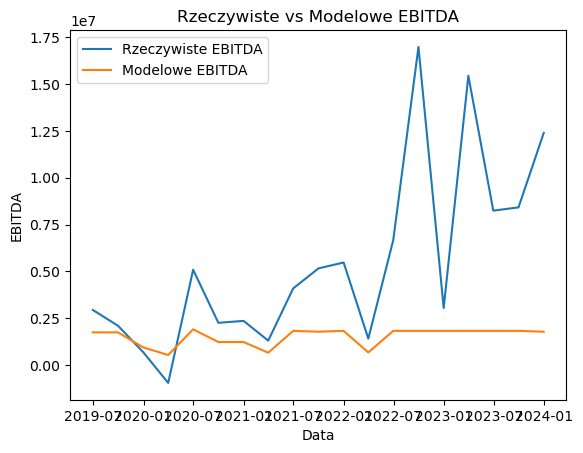

In [37]:
#eXtreme Gradient Boost

#Wydzielam dane na zbiory testowe i treningowe
#W nastepnym kroku stosuje metode krzyzowej walidacji, aby ustalić dla jakich parametrów model ma najlepsze dopasowanie
#za parametr oceny stosuje ujemny pierwiastek ze średniego błędu kwadratowego


import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

#random_forest_mol = random_forest_mol.drop(columns=["Rok", "Q"], axis=1)
for i in ["EBITDA"]: #list(random_forest_mol.columns):
    labels = random_forest_mol[f"{i}"]
        
    features = random_forest_mol
    train_l = labels[:24]
    test_l = labels[25:]
        
    train_f = features[:24]
    test_f = features[25:]
        
    
    dtrain = xgb.DMatrix(train_f, label=train_l.to_numpy().reshape(-1,1))
    dtest = xgb.DMatrix(test_f, label=test_l.to_numpy().reshape(-1,1))
    
    param_grid = {
        'max_depth': [3,4,5,6,7,8,9,10],
        'eta': [0.01, 0.2],
        'subsample': [0.5,0.6,0.7,0.8,],
        'colsample_bytree': [0.8, 1.0],
        'lambda' : [0, 1, 3, 5]
    }
    
    xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror')
    
    grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5)
    grid_search.fit(train_f, train_l)
    
    best_params = grid_search.best_params_
    
    print(f"Best Parameters {i}:", grid_search.best_params_)
    print(f"Best MSE {i}:", -grid_search.best_score_)

    num_rounds = 100
    model = xgb.train(best_params, dtrain, num_rounds)


    predictions_train = model.predict(dtrain)
    forecast_train = pd.DataFrame(predictions_train, columns=[f"{i}"])
    forecast_train.index = features[:24].index
    
    predictions_test = model.predict(dtest)
    forecast_test = pd.DataFrame(predictions_test, columns=[f"{i}"])
    forecast_test.index = features[25:].index

    actual_values = labels[25:]

    plt.plot(actual_values, label=f'Rzeczywiste {i}')
    plt.plot(forecast_test, label=f'Modelowe {i}')
        
    plt.xlabel('Data')
    plt.ylabel(f'{i}')
    plt.title(f'Rzeczywiste vs Modelowe {i}')
    plt.legend()
        
    plt.show()


#Zgodnie z metodą wychodzi, że powinnienem ustawić model na anstępujące parametry:
#- colsample_bytree: 1
#- eta: 0.2
#- lambda: 0.1
#- max_depth: 4
#- subsample: 0.6
#Dla podanych parametrów dopasowany model osiąga średni błąd kwadratowy 437309727.4168719


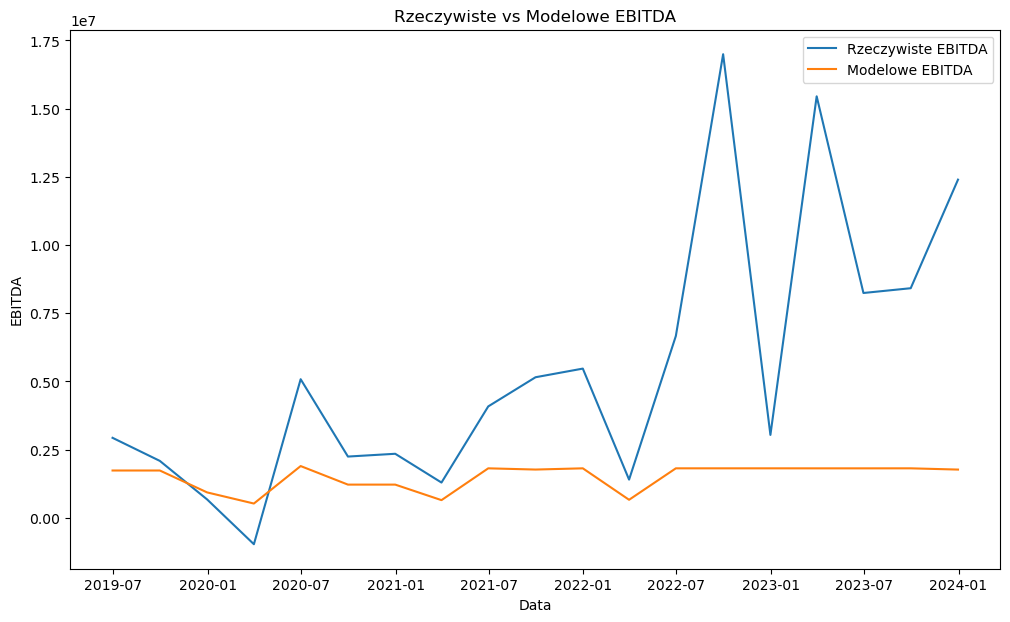

In [41]:
fig = plt.figure(figsize=(12,7))
plt.plot(actual_values, label=f'Rzeczywiste {i}')
plt.plot(forecast_test, label=f'Modelowe {i}')
        
plt.xlabel('Data')
plt.ylabel('EBITDA')
plt.title(f'Rzeczywiste vs Modelowe {i}')
plt.legend()
        
plt.show()

Przychody ogółem
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 119096767152128.0000 - mae: 6172120.5000 - val_loss: 2089532593799168.0000 - val_mae: 38434996.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 98629025005568.0000 - mae: 5594193.5000 - val_loss: 1637240862146560.0000 - val_mae: 33697908.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 80205880229888.0000 - mae: 5017343.0000 - val_loss: 1247228706422784.0000 - val_mae: 28991252.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 63820978454528.0000 - mae: 4440878.0000 - val_loss: 918336686784512.0000 - val_mae: 24318400.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 49533371285504.0000 - mae: 3867259.7500 - val_loss: 649028815552512.0000 - val_mae: 19690122.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 37355817795584.0000 - mae: 3299802.0000 - val_loss: 439048871084032.0000 - val_mae: 15688662.0000
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - 

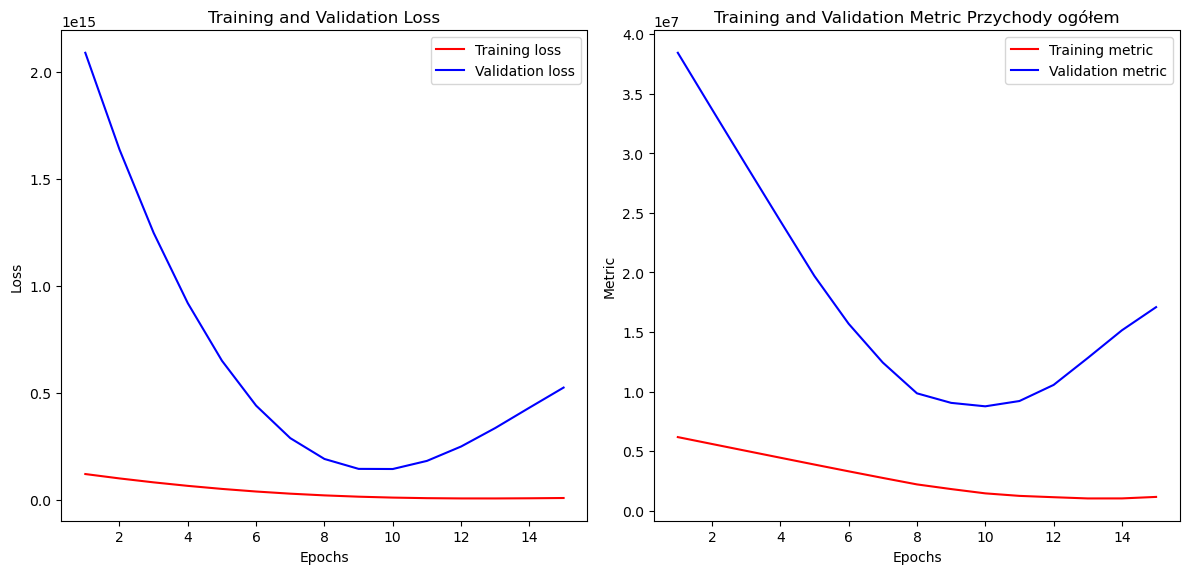

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 6288046030848.0000 - mae: 1237518.1250
Test accuracy: 1237518.125
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


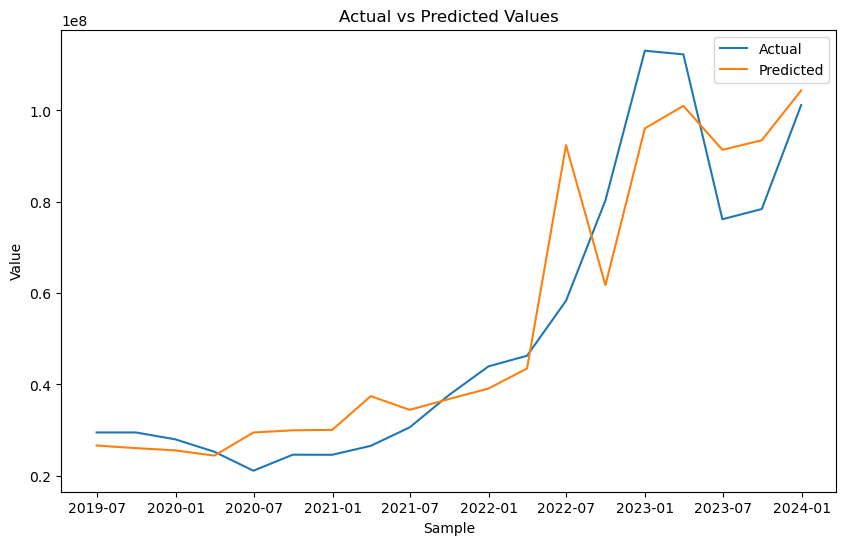

MAPE Przychody ogółem:  74.0 %
Zysk z działalności operacyjnej
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 111650701312.0000 - mae: 133854.4844 - val_loss: 33316484939776.0000 - val_mae: 4574598.5000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 514405924864.0000 - mae: 387825.5000 - val_loss: 14024828780544.0000 - val_mae: 2836105.7500
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 112883834880.0000 - mae: 182987.5781 - val_loss: 6388636975104.0000 - val_mae: 2036177.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 129368891392.0000 - mae: 153566.3750 - val_loss: 7709911416832.0000 - val_mae: 2246389.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 284633169920.0000 - mae: 274039.7500 - val_loss: 6707733331968.0000 - val_mae: 2144500.7500
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 197610356736.0000 - mae: 216627.7500 - val_loss: 6822421331968.0000 - val_mae: 2031695.6250
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72m

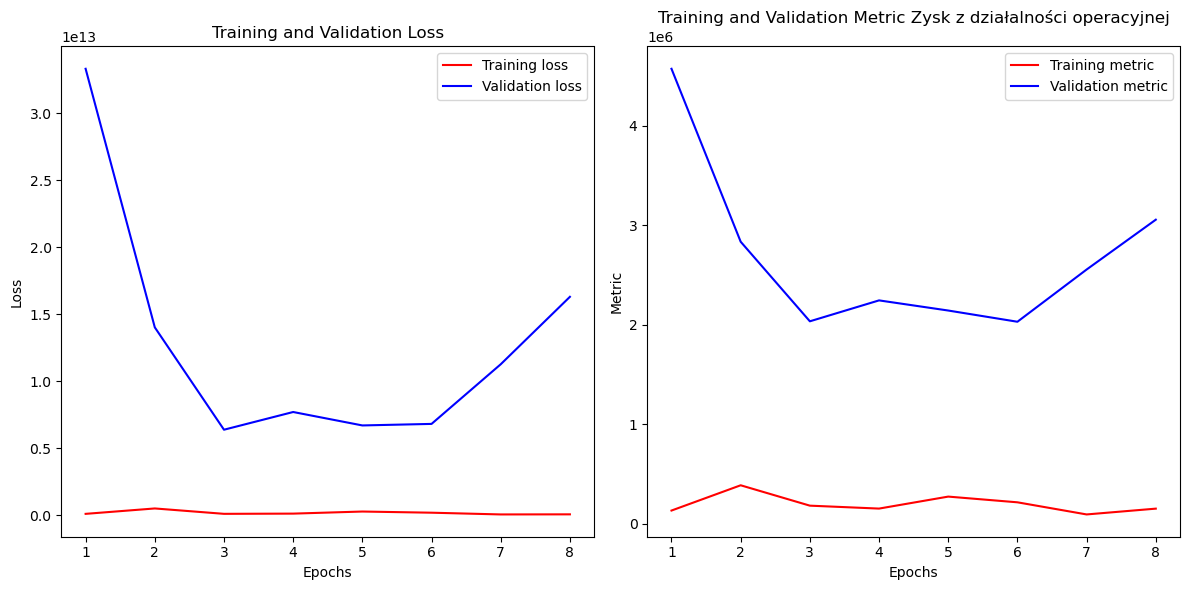

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 129368891392.0000 - mae: 153566.3750
Test accuracy: 153566.375
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


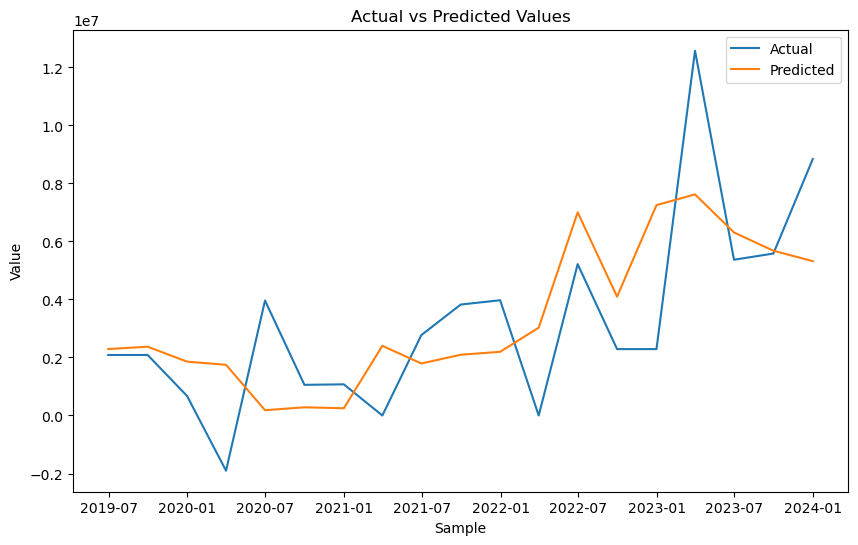

MAPE Zysk z działalności operacyjnej:  inf %
EBITDA
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 3121563566080.0000 - mae: 975298.0000 - val_loss: 54867452231680.0000 - val_mae: 6178468.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 1267453657088.0000 - mae: 639860.0625 - val_loss: 16235208114176.0000 - val_mae: 2934006.2500
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 602578026496.0000 - mae: 323535.9062 - val_loss: 9028336877568.0000 - val_mae: 2119244.5000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 788908998656.0000 - mae: 277859.7500 - val_loss: 14425178243072.0000 - val_mae: 2765918.7500
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 1124799479808.0000 - mae: 456039.0000 - val_loss: 16960426344448.0000 - val_mae: 3004525.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 1154369585152.0000 - mae: 490881.0000 - val_loss: 14260132380672.0000 - val_mae: 2761690.0000
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/st

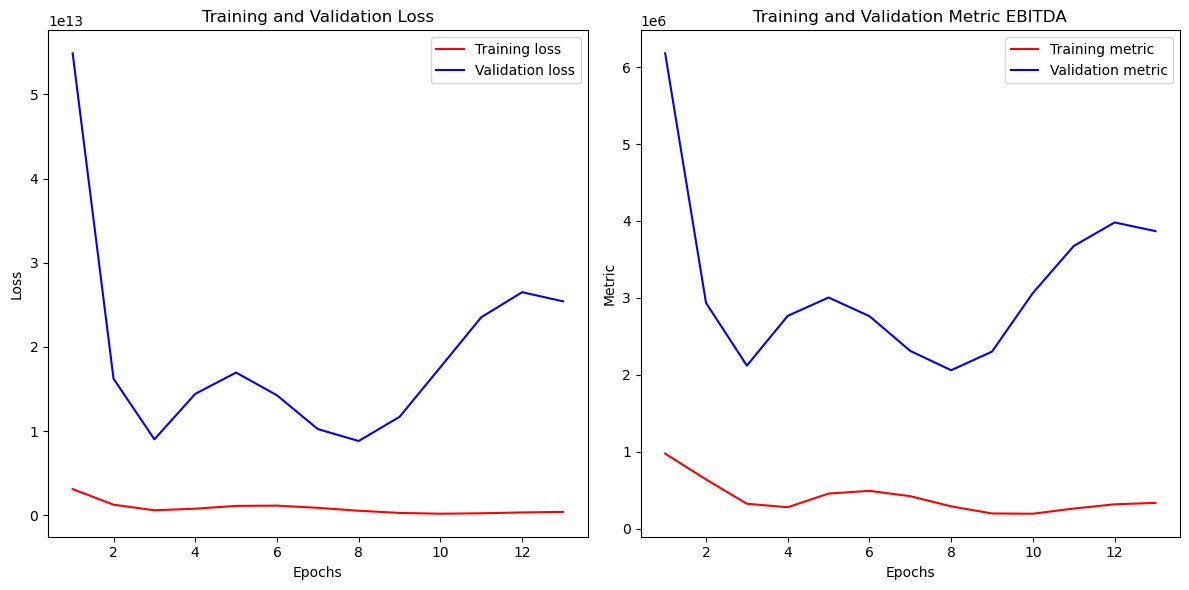

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 289474412544.0000 - mae: 196941.8906
Test accuracy: 196941.890625
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


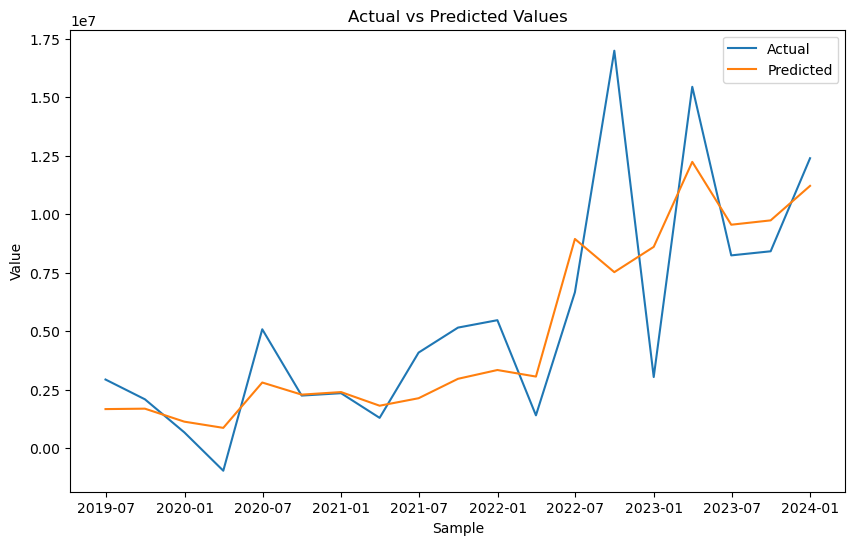

MAPE EBITDA:  155.66 %
Przychody finansowe
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 14939255209984.0000 - mae: 2068476.0000 - val_loss: 112521004449792.0000 - val_mae: 8590408.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 9313430011904.0000 - mae: 1581610.0000 - val_loss: 39781442519040.0000 - val_mae: 4696310.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 5211068825600.0000 - mae: 1105176.0000 - val_loss: 7905486045184.0000 - val_mae: 1876021.8750
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 2569572974592.0000 - mae: 648176.3125 - val_loss: 11776309592064.0000 - val_mae: 2864425.5000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 1247220072448.0000 - mae: 329918.3438 - val_loss: 41998148960256.0000 - val_mae: 5603866.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 990796120064.0000 - mae: 475697.5000 - val_loss: 85756655697920.0000 - val_mae: 8141714.5000
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step -

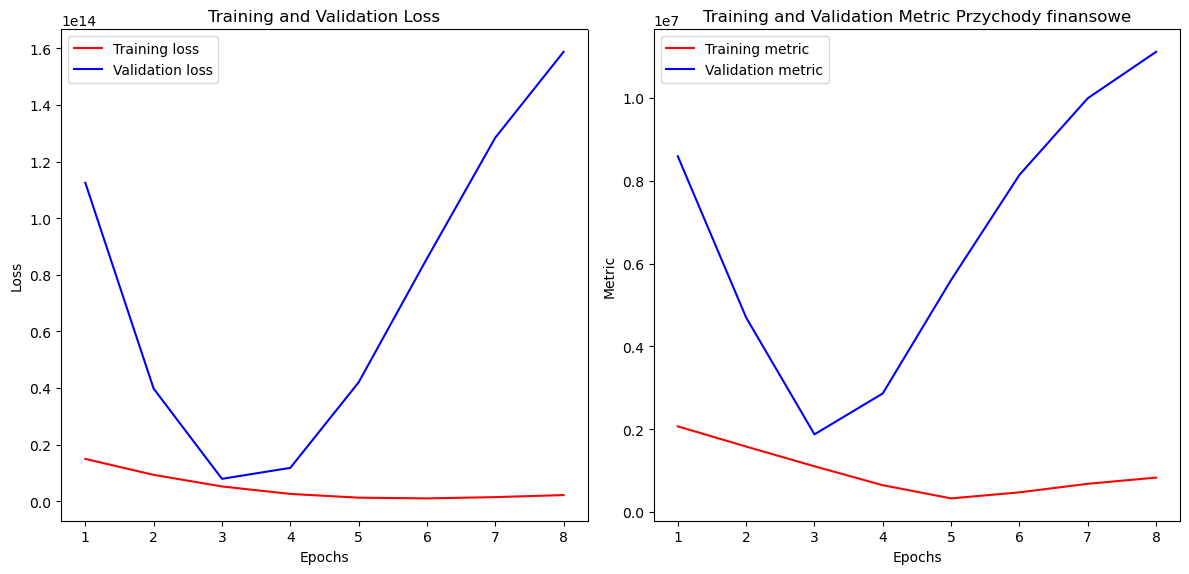

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2569572974592.0000 - mae: 648176.3125
Test accuracy: 648176.3125
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


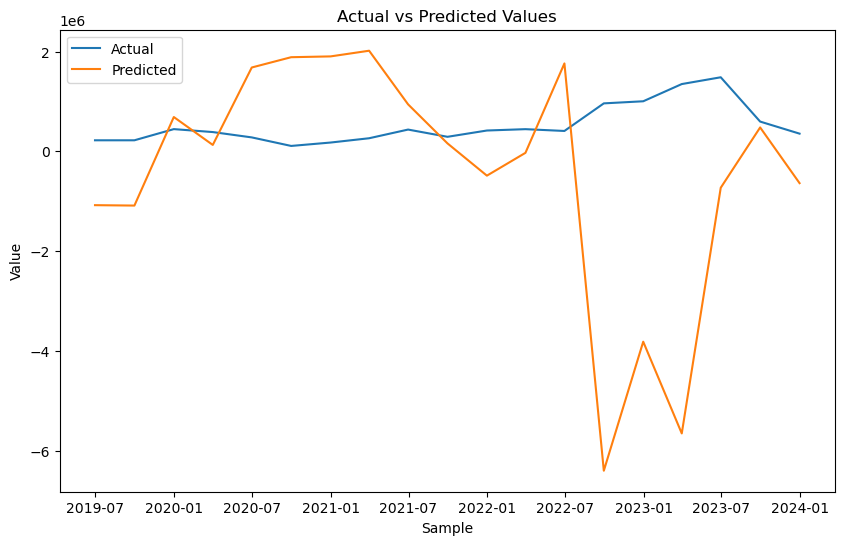

MAPE Przychody finansowe:  519.96 %
Wydatki finansowe
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 8932778049536.0000 - mae: 1712847.6250 - val_loss: 198729076310016.0000 - val_mae: 12509387.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 4642810888192.0000 - mae: 1227223.3750 - val_loss: 93530856882176.0000 - val_mae: 8585299.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 1831442972672.0000 - mae: 752864.0000 - val_loss: 31574638723072.0000 - val_mae: 4892593.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 428275924992.0000 - mae: 315711.0312 - val_loss: 6515399852032.0000 - val_mae: 2021842.7500
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 203807719424.0000 - mae: 225866.7969 - val_loss: 7417871990784.0000 - val_mae: 2011624.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 733861445632.0000 - mae: 431275.3438 - val_loss: 19116547112960.0000 - val_mae: 3011068.2500
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93m

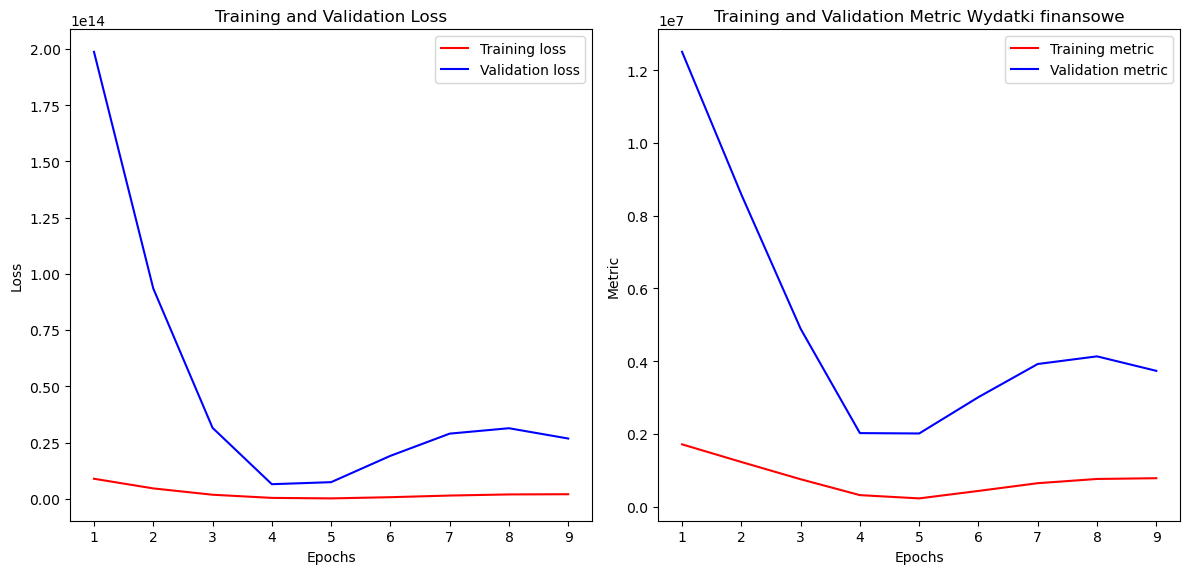

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 203807703040.0000 - mae: 225866.7969
Test accuracy: 225866.796875
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


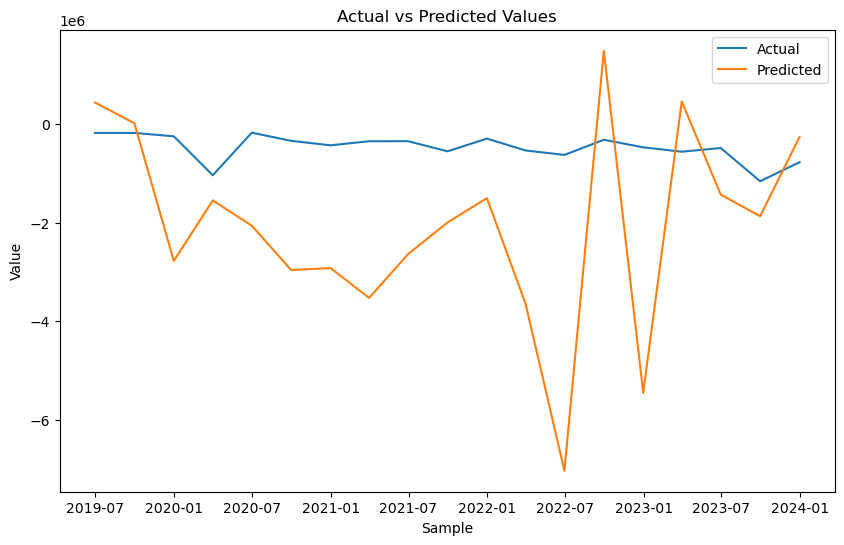

MAPE Wydatki finansowe:  628.98 %
Zysk brutto
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 35066042384384.0000 - mae: 3403559.2500 - val_loss: 807600954277888.0000 - val_mae: 24148738.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 24553365438464.0000 - mae: 2847371.0000 - val_loss: 544430624866304.0000 - val_mae: 19665890.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 15987081478144.0000 - mae: 2296038.2500 - val_loss: 336368853057536.0000 - val_mae: 15243500.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 9388639125504.0000 - mae: 1756188.6250 - val_loss: 184053709930496.0000 - val_mae: 10956588.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 4686168457216.0000 - mae: 1233479.6250 - val_loss: 83564284608512.0000 - val_mae: 6948276.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 1730424078336.0000 - mae: 732968.0625 - val_loss: 29438202871808.0000 - val_mae: 3701976.7500
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━

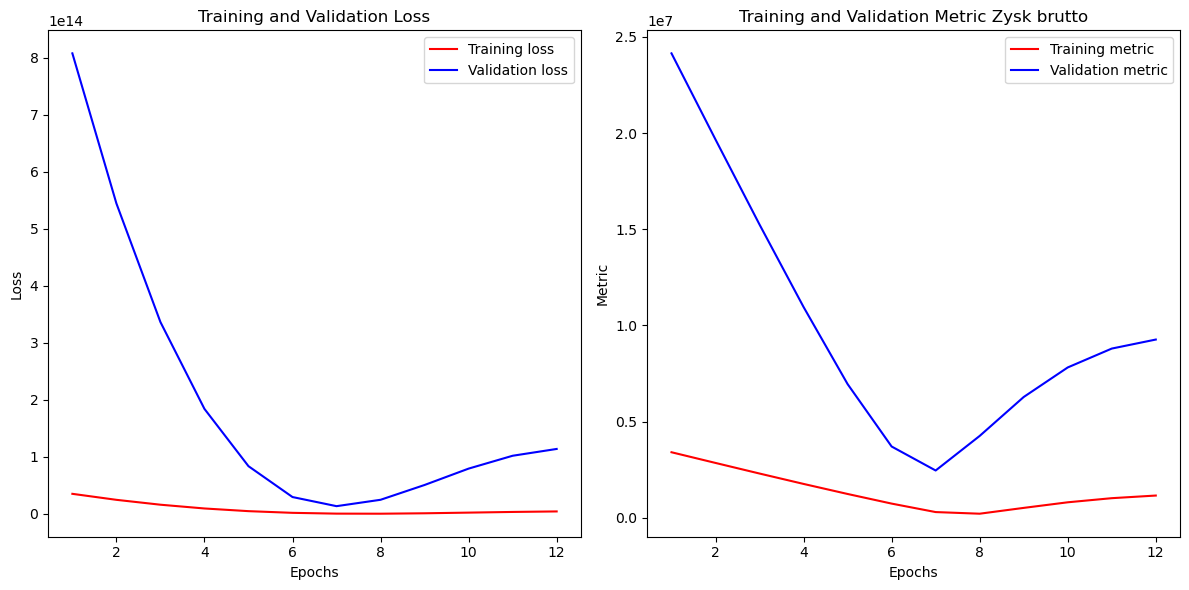

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 212643151872.0000 - mae: 207397.5000
Test accuracy: 207397.5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


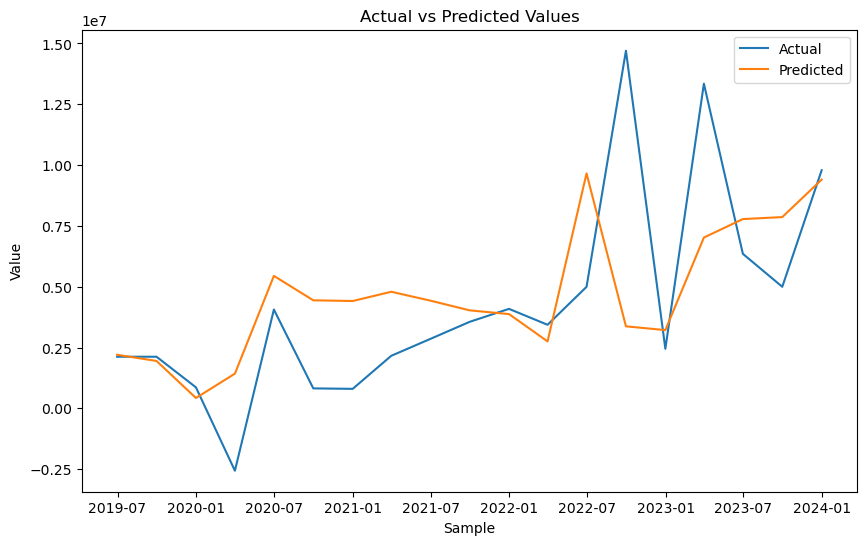

MAPE Zysk brutto:  142.6 %
Aktywa trwałe
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 40308402290688.0000 - mae: 3629225.2500 - val_loss: 1654555620147200.0000 - val_mae: 35947116.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 28951510515712.0000 - mae: 3064605.0000 - val_loss: 1255473298800640.0000 - val_mae: 31254554.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 19610455769088.0000 - mae: 2506537.7500 - val_loss: 919183936192512.0000 - val_mae: 26637456.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 12271333933056.0000 - mae: 1959625.6250 - val_loss: 645653977890816.0000 - val_mae: 22152152.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 6847694110720.0000 - mae: 1427074.6250 - val_loss: 432625445502976.0000 - val_mae: 17891506.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 3271190118400.0000 - mae: 927177.5625 - val_loss: 276967777632256.0000 - val_mae: 14368345.0000
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━

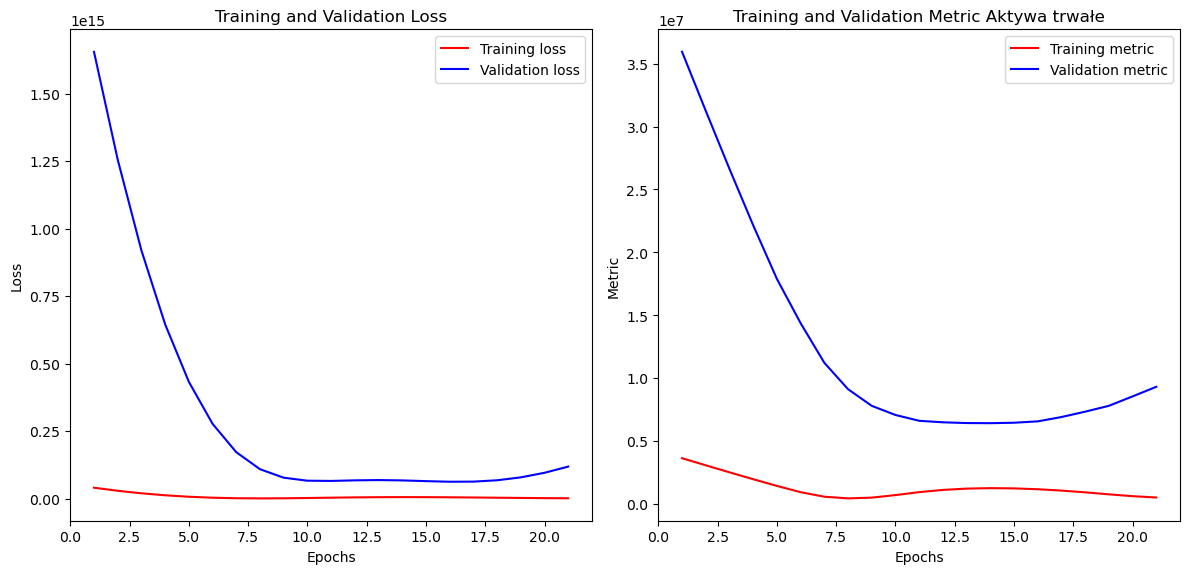

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 4097913913344.0000 - mae: 1054032.6250
Test accuracy: 1054032.625
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


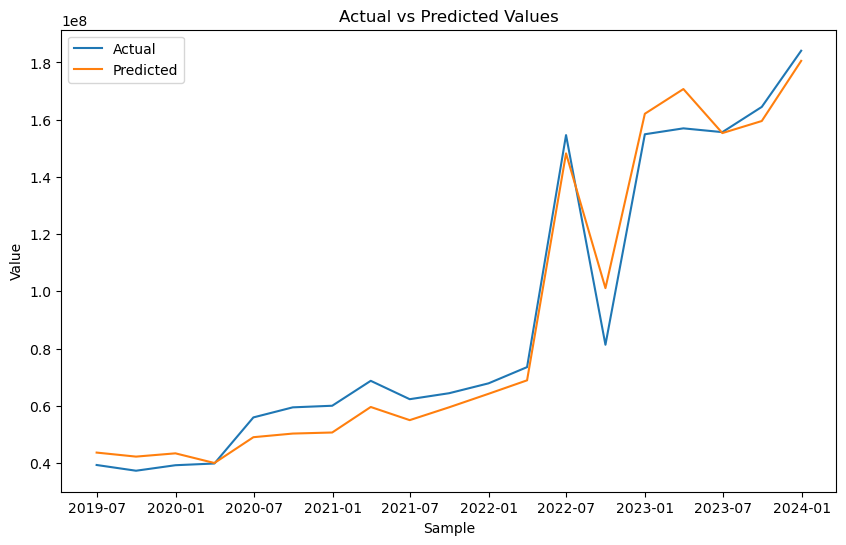

MAPE Aktywa trwałe:  68.38 %
Aktywa obrotowe
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 474093220528128.0000 - mae: 11858141.0000 - val_loss: 8167600794107904.0000 - val_mae: 77188568.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 437798800719872.0000 - mae: 11355352.0000 - val_loss: 7331989673738240.0000 - val_mae: 73030088.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 403212435718144.0000 - mae: 10853603.0000 - val_loss: 6539471033991168.0000 - val_mae: 68857280.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 370337715847168.0000 - mae: 10354521.0000 - val_loss: 5793047593877504.0000 - val_mae: 64682712.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 338884026171392.0000 - mae: 9853411.0000 - val_loss: 5094538808918016.0000 - val_mae: 60525644.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 308977632018432.0000 - mae: 9353796.0000 - val_loss: 4443419350925312.0000 - val_mae: 56380280.0000
Epoch 7/50

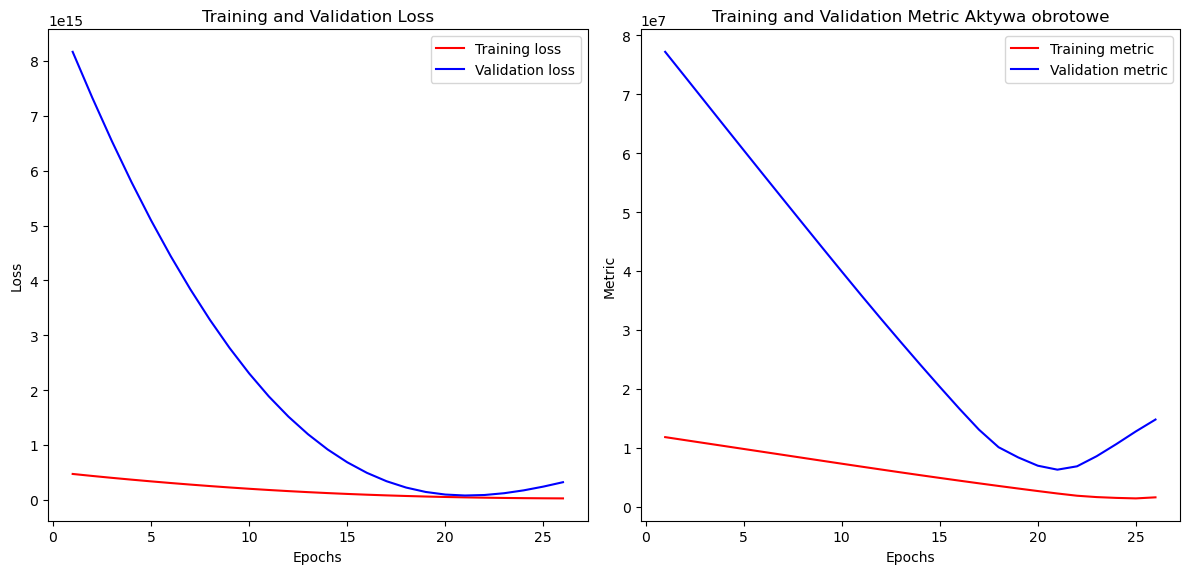

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 41511261569024.0000 - mae: 1921747.3750
Test accuracy: 1921747.375
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


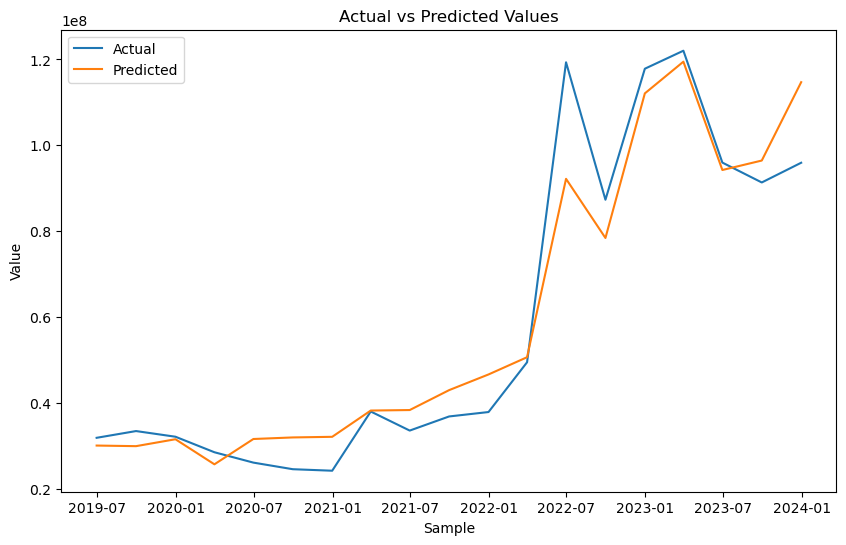

MAPE Aktywa obrotowe:  74.5 %
Kapitał własny ogółem
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 221832963686400.0000 - mae: 8561558.0000 - val_loss: 6446998240624640.0000 - val_mae: 68507080.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 199725844267008.0000 - mae: 8122263.5000 - val_loss: 5792527365963776.0000 - val_mae: 64862948.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 178777460047872.0000 - mae: 7682374.5000 - val_loss: 5178583265837056.0000 - val_mae: 61246336.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 158922698653696.0000 - mae: 7240892.0000 - val_loss: 4604255407177728.0000 - val_mae: 57670520.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 140444356837376.0000 - mae: 6804438.5000 - val_loss: 4073018686963712.0000 - val_mae: 54156636.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 123294376263680.0000 - mae: 6372121.5000 - val_loss: 3583269471780864.0000 - val_mae: 50704892.0000
Epoch 7/

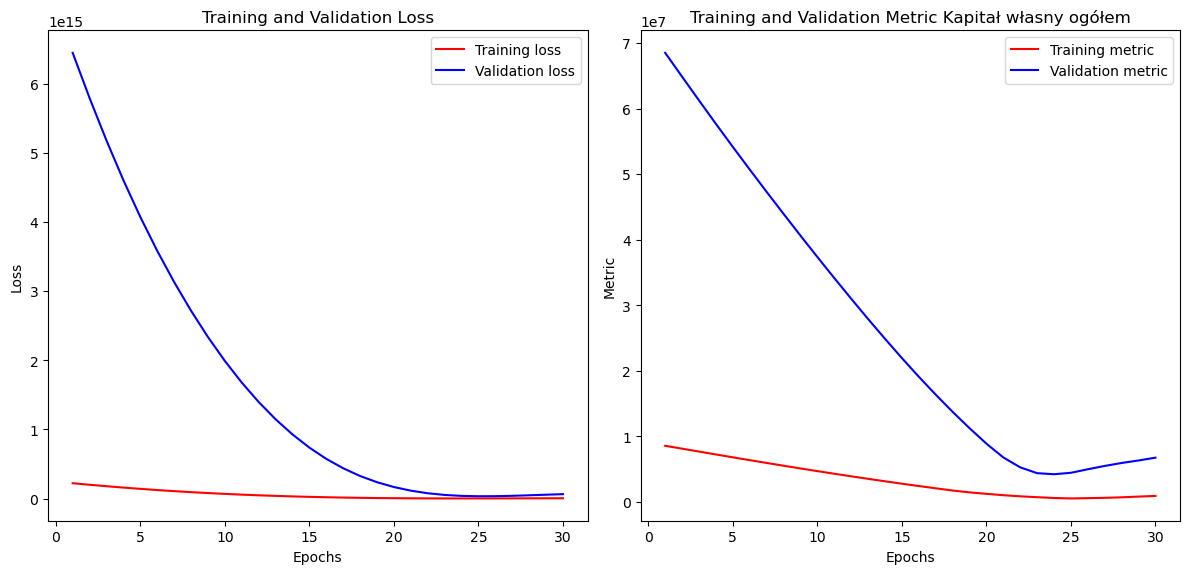

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 2241763475456.0000 - mae: 575659.8125
Test accuracy: 575659.8125
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


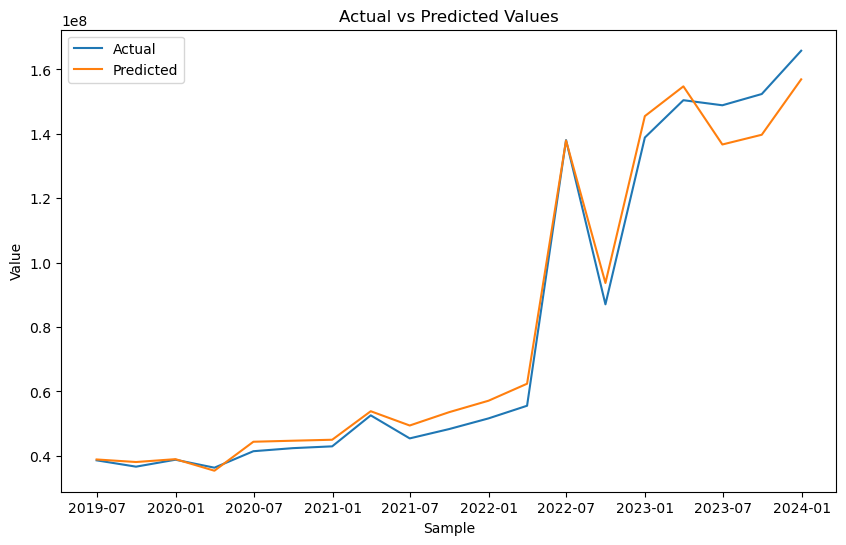

MAPE Kapitał własny ogółem:  71.8 %
Kapitał własny spółki dominującej
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 374593692893184.0000 - mae: 11107887.0000 - val_loss: 12003828001931264.0000 - val_mae: 93975224.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 341383864909824.0000 - mae: 10601593.0000 - val_loss: 11006122131456000.0000 - val_mae: 89908400.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 309867529109504.0000 - mae: 10097572.0000 - val_loss: 10055769349160960.0000 - val_mae: 85855760.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 279984086188032.0000 - mae: 9595317.0000 - val_loss: 9148996526276608.0000 - val_mae: 81810112.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 251711658655744.0000 - mae: 9094865.0000 - val_loss: 8289302987407360.0000 - val_mae: 77785688.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 225143343284224.0000 - mae: 8597815.0000 - val_loss: 7473617830936576.0000 - val_mae

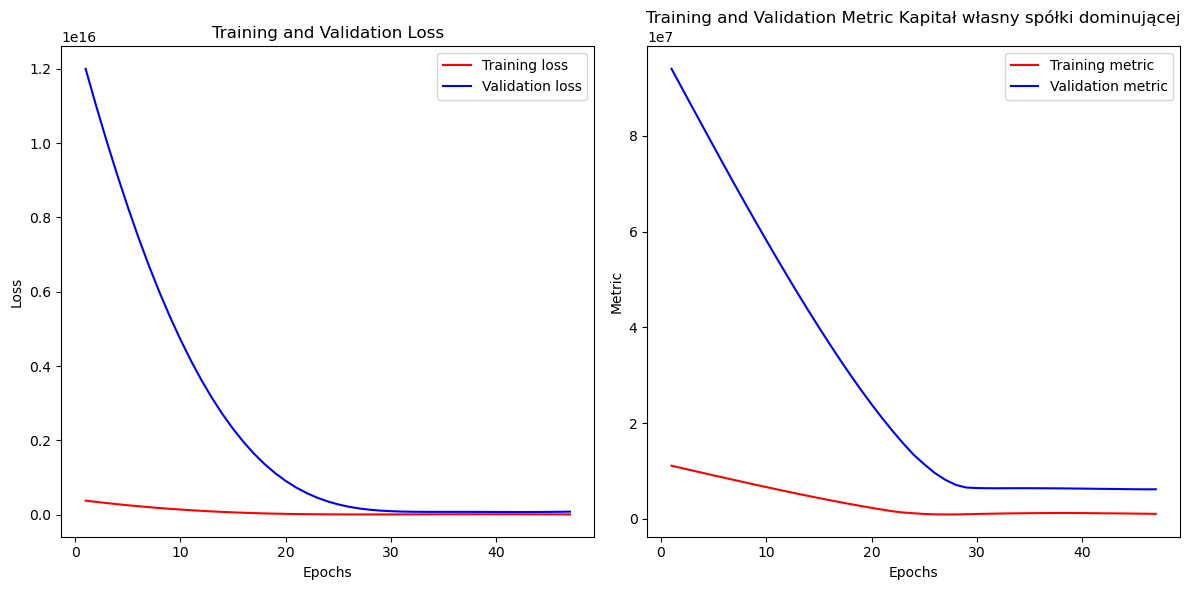

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 6930129485824.0000 - mae: 1157182.1250
Test accuracy: 1157182.125
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


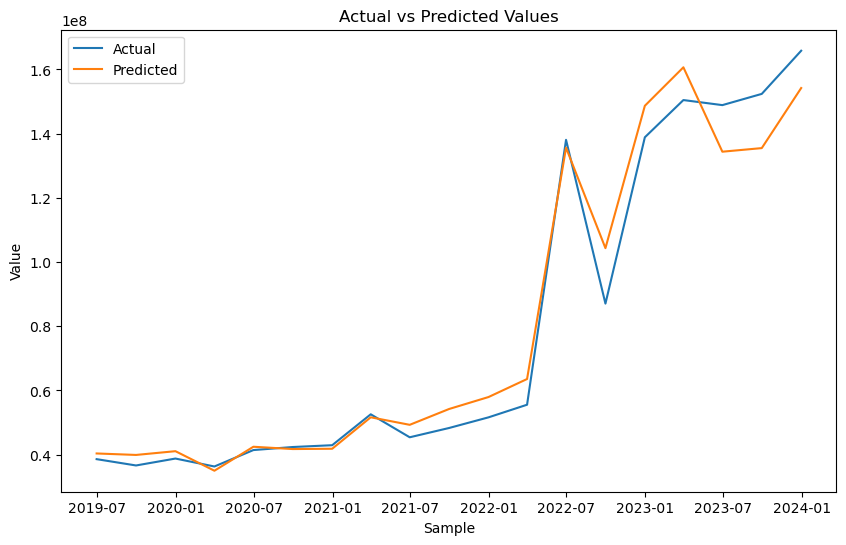

MAPE Kapitał własny spółki dominującej:  72.66 %
Zobowiązania długoterminowe
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 187665374773248.0000 - mae: 7851300.0000 - val_loss: 4263208160329728.0000 - val_mae: 58632556.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 161403763687424.0000 - mae: 7280385.5000 - val_loss: 3599844555882496.0000 - val_mae: 54016916.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 137356652838912.0000 - mae: 6715133.5000 - val_loss: 3000402681266176.0000 - val_mae: 49456864.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 115438553923584.0000 - mae: 6154420.5000 - val_loss: 2462521109774336.0000 - val_mae: 44950952.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 95627102912512.0000 - mae: 5599353.5000 - val_loss: 1984802903293952.0000 - val_mae: 40507620.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 77960283422720.0000 - mae: 5052742.5000 - val_loss: 1566495100370944.0000 - val_mae:

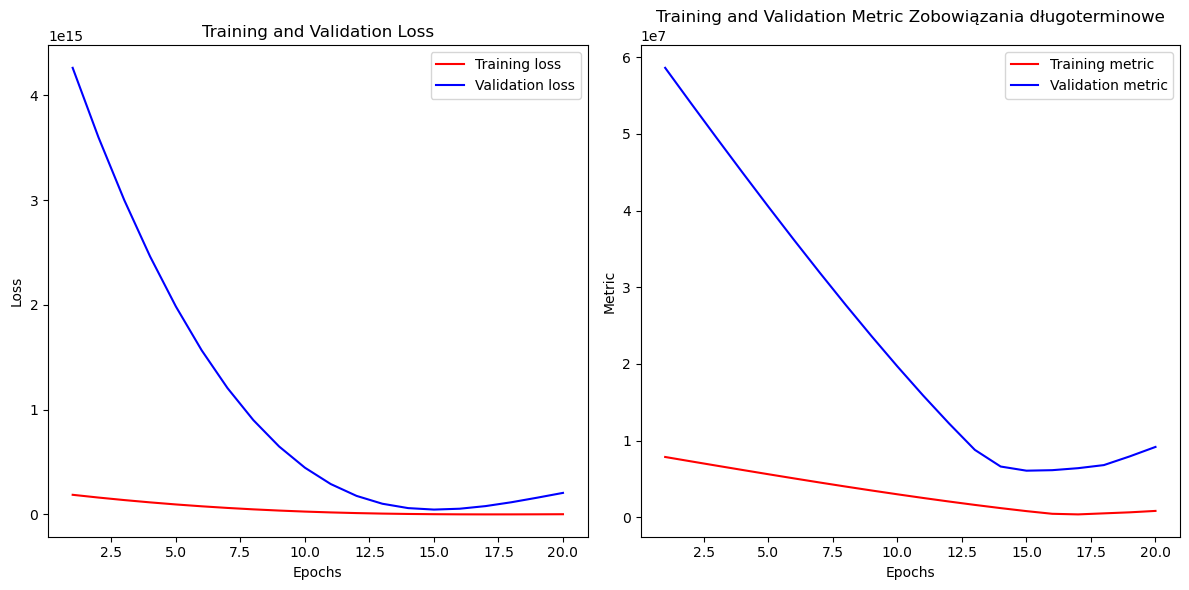

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1211300446208.0000 - mae: 437457.7812
Test accuracy: 437457.78125
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


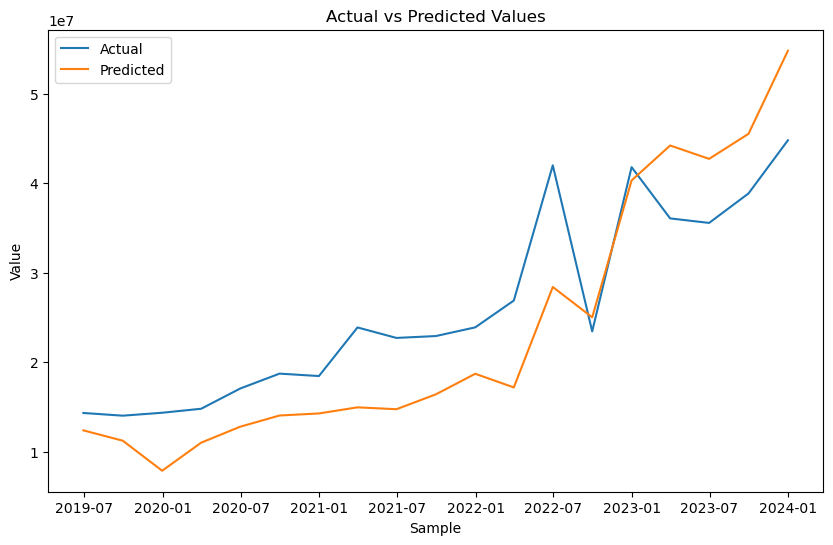

MAPE Zobowiązania długoterminowe:  52.66 %
Zobowiązania krótkoterminowe
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 8029305569280.0000 - mae: 1551626.3750 - val_loss: 297838231683072.0000 - val_mae: 13683191.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 4352797573120.0000 - mae: 1081475.7500 - val_loss: 184028862873600.0000 - val_mae: 9964533.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 2077026287616.0000 - mae: 696452.0625 - val_loss: 109975221305344.0000 - val_mae: 7421573.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 1064674983936.0000 - mae: 529863.4375 - val_loss: 71544197873664.0000 - val_mae: 6284020.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 1059429220352.0000 - mae: 508793.9062 - val_loss: 58550067920896.0000 - val_mae: 5692460.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 1601305051136.0000 - mae: 550690.9375 - val_loss: 58020738367488.0000 - val_mae: 5524798.5000
Epoch 7/50
1/1 ━━━

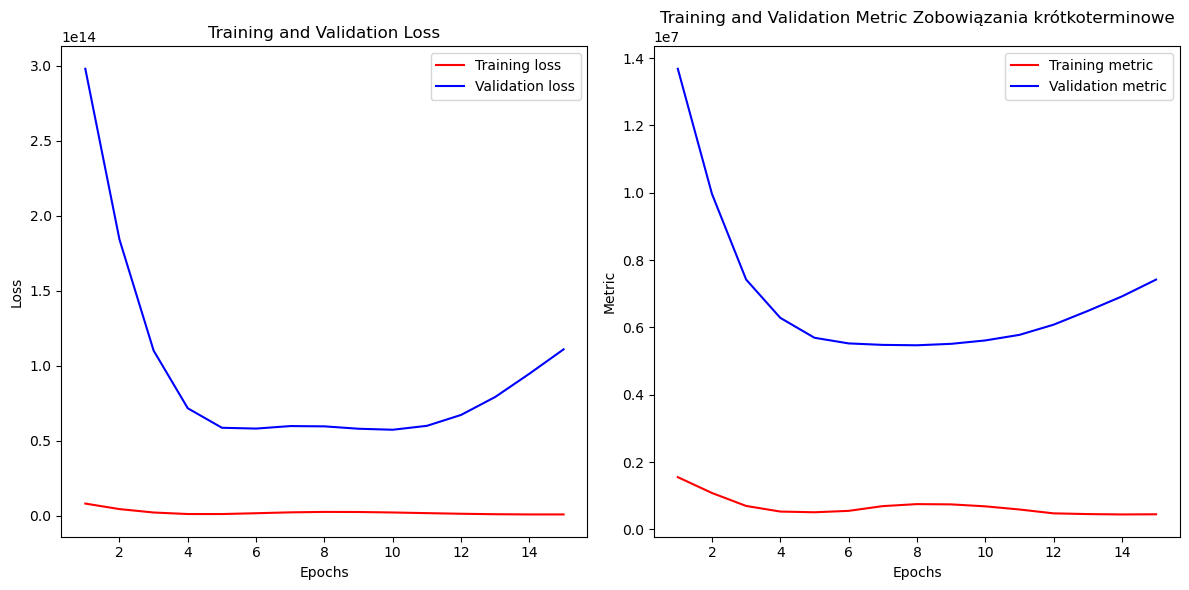

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 1661887184896.0000 - mae: 591145.5625
Test accuracy: 591145.5625
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


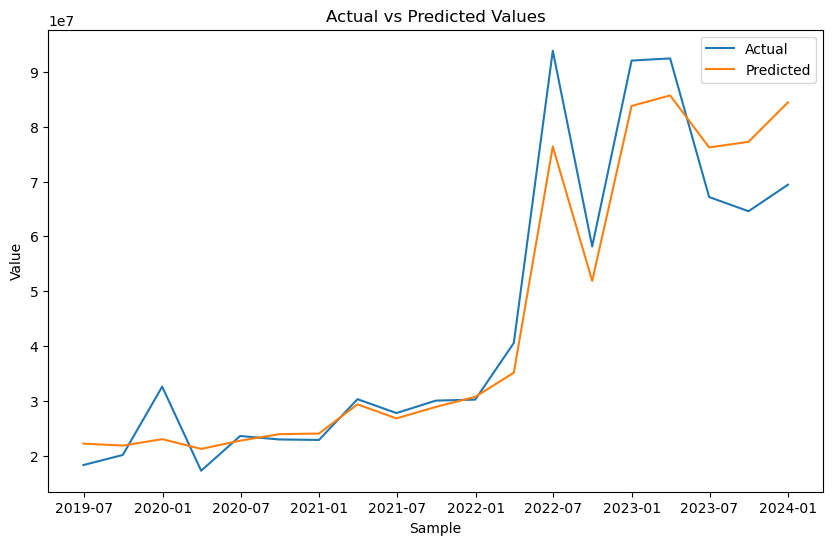

MAPE Zobowiązania krótkoterminowe:  72.82 %
Pożyczki krótkoterminowe
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 54498894544896.0000 - mae: 4222689.0000 - val_loss: 1512770025553920.0000 - val_mae: 34317860.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 42513553424384.0000 - mae: 3725309.2500 - val_loss: 1170956798132224.0000 - val_mae: 30226048.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 32112816160768.0000 - mae: 3232434.7500 - val_loss: 879501391167488.0000 - val_mae: 26214730.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 23338820829184.0000 - mae: 2748807.2500 - val_loss: 634143398428672.0000 - val_mae: 22267632.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 16087915692032.0000 - mae: 2273207.7500 - val_loss: 434285282590720.0000 - val_mae: 18414944.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 10325009104896.0000 - mae: 1809677.6250 - val_loss: 278614847258624.0000 - val_mae: 14698806.0000
E

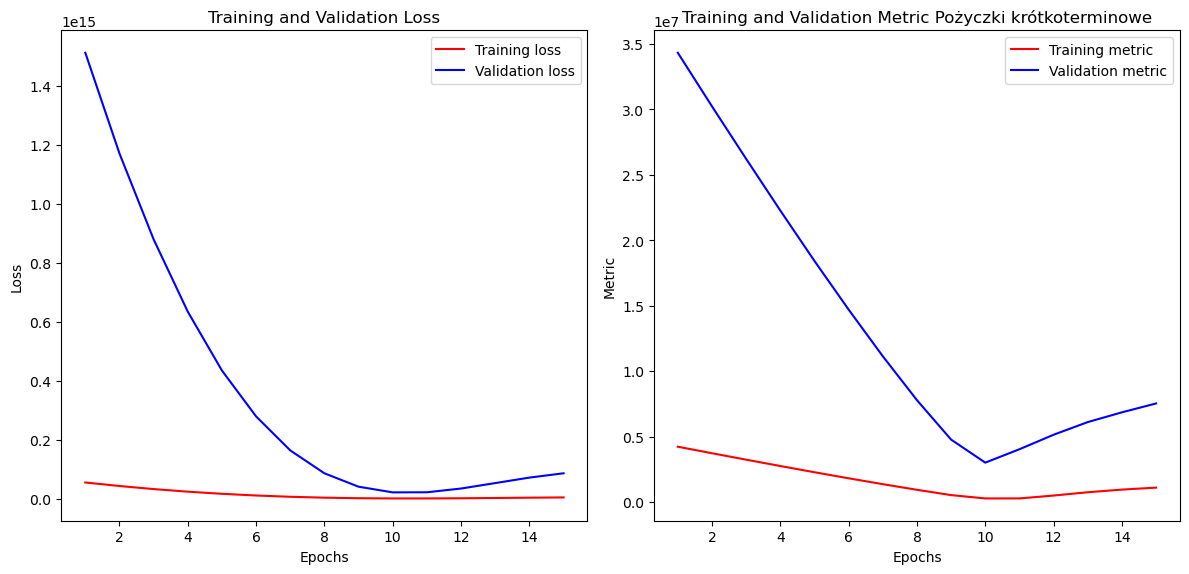

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 366994030592.0000 - mae: 272839.4062
Test accuracy: 272839.40625
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


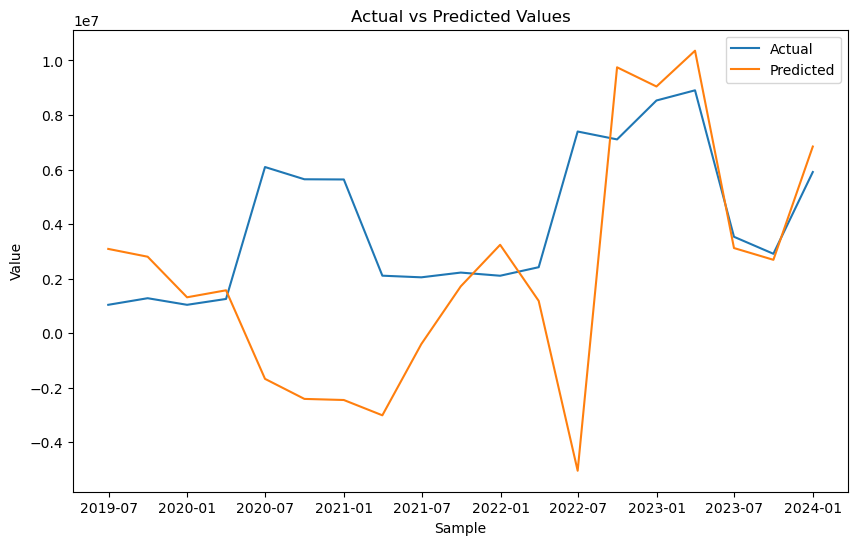

MAPE Pożyczki krótkoterminowe:  149.1 %


In [42]:
#Sieć neuronowa
#Sieć neuronowa
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping



for i in list(random_forest_mol.columns):
    print(f"{i}")
    labels = random_forest_mol[f"{i}"]
            
    features = random_forest_mol
    train_l = labels[:24]
    test_l = labels[25:]
            
    train_f = features[:24]
    test_f = features[25:]
    
    
    early_stopping = EarlyStopping(monitor='val_loss', # Metryka monitorowana (wartość funkcji straty na zbiorze walidacyjnym)
                                   patience=5, # Liczba epok bez poprawy, po których trenowanie zostanie zatrzymane
                                   verbose=1, # Poziom szczegółowości komunikatów
                                   restore_best_weights=True)
    
    model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(features.shape[1],)), # Warstwa ukryta z 128 neuronami
        keras.layers.Dense(1) ])
    
    
    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['mae'])
    
    
    
    history = model.fit(train_f, train_l, epochs=50, callbacks=[early_stopping], validation_data=(test_f, test_l))
    
    def plot_learning_curves(history):
        # Pobranie wartości funkcji straty dla zbioru treningowego i walidacyjnego
        train_loss = history.history['loss']
        val_loss = history.history['val_loss']
        
        # Pobranie wartości metryki (np. dokładności) dla zbioru treningowego i walidacyjnego (jeśli dostępne)
        if 'accuracy' in history.history:
            train_metric = history.history['accuracy']
            val_metric = history.history['val_accuracy']
        elif 'mae' in history.history:
            train_metric = history.history['mae']
            val_metric = history.history['val_mae']
        else:
            print("Nie można znaleźć metryki. Sprawdź, czy model jest skonfigurowany do monitorowania odpowiednich metryk.")
            return
        
        # Wygenerowanie krzywych uczenia się
        epochs = range(1, len(train_loss) + 1)
        plt.figure(figsize=(12, 6))
        
        # Wykres funkcji straty
        plt.subplot(1, 2, 1)
        plt.plot(epochs, train_loss, 'r-', label='Training loss')
        plt.plot(epochs, val_loss, 'b-', label='Validation loss')
        plt.title('Training and Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        
        # Wykres metryki
        plt.subplot(1, 2, 2)
        plt.plot(epochs, train_metric, 'r-', label='Training metric')
        plt.plot(epochs, val_metric, 'b-', label='Validation metric')
        plt.title(f'Training and Validation Metric {i}')
        plt.xlabel('Epochs')
        plt.ylabel('Metric')
        plt.legend()
        
        plt.tight_layout()
        plt.show()
        
    plot_learning_curves(history)
    
    
    # Ocena modelu
    test_loss, test_acc = model.evaluate(train_f, train_l)
    print('Test accuracy:', test_acc)

    # Przewidywane wartości
    predictions = model.predict(test_f[-34:])
    predictions = pd.DataFrame(predictions, index=actual_values.index)
    
    # Rzeczywiste wartości
    actual_values = test_l[:34]
    
    # Wykres prognoz vs rzeczywistość
    plt.figure(figsize=(10, 6))
    plt.plot(actual_values, label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.xlabel('Sample')
    plt.ylabel('Value')
    plt.title('Actual vs Predicted Values')
    plt.legend()
    plt.show()

    def mean_absolute_percentage_error(y_true, y_pred):
        """
        Oblicza średnią bezwzględną błędu procentowego (MAPE).
    
        Parametry:
        y_true : array-like
            Rzeczywiste wartości.
        y_pred : array-like
            Prognozowane wartości.
    
        Zwraca:
        mape : float
            Wartość MAPE.
        """
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    
    mape = mean_absolute_percentage_error(actual_values[:-1], predictions[:-1])
    print(f"MAPE {i}: ", round(mape,2),"%")





In [ ]:
import matplotlib.pyplot as plt

# Przewidywane wartości
predictions = model.predict(train_f[-34:])
predictions = pd.DataFrame(predictions, index=actual_values.index)

# Rzeczywiste wartości
actual_values = test_l[:34]

# Wykres prognoz vs rzeczywistość
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    """
    Oblicza średnią bezwzględną błędu procentowego (MAPE).

    Parametry:
    y_true : array-like
        Rzeczywiste wartości.
    y_pred : array-like
        Prognozowane wartości.

    Zwraca:
    mape : float
        Wartość MAPE.
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


mape = mean_absolute_percentage_error(actual_values[:-1], predictions[:-1])
print(f"MAPE {i}: ", round(mape,2),"%")